## Load in libraries

In [3]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 490.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 587.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 535.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score

from autogluon.tabular import TabularDataset, TabularPredictor
import warnings
warnings.filterwarnings('ignore')

## Load in data

In [2]:
training_df = pd.read_csv('loan_train.csv')

training_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  1077501.0  1296599.0     5000.0       5000.0           4975.0  36 months   
1  1077430.0  1314167.0     2500.0       2500.0           2500.0  60 months   
2  1076863.0  1277178.0    10000.0      10000.0          10000.0  36 months   
3  1069639.0  1304742.0     7000.0       7000.0           7000.0  60 months   
4  1072053.0  1288686.0     3000.0       3000.0           3000.0  36 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN           Sep-2016   
1   15.27%        59.83     C        C4  ...          NaN           Sep-2016   
2   13.49%       339.31     C        C1  ...          NaN           Apr-2016   
3   15.96%       170.08     C        C5  ...          NaN           Sep-2016   
4   18.64%       109.43     E        E1  ...          NaN           Dec-2014   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0          1.0       INDIVIDUAL            0.0   
1                        0.0          1.0       INDIVIDUAL            0.0   
2                        0.0          1.0       INDIVIDUAL            0.0   
3                        0.0          1.0       INDIVIDUAL            0.0   
4                        0.0          1.0       INDIVIDUAL            0.0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0         0.0                  0.0       0.0  
1                      0.0         0.0                  0.0       0.0  
2                      0.0         0.0                  0.0       0.0  
3                      0.0         0.0                  0.0       0.0  
4                      0.0         0.0                  0.0       0.0  

[5 rows x 52 columns]

In [3]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29777 entries, 0 to 29776
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          29774 non-null  float64
 1   member_id                   29774 non-null  float64
 2   loan_amnt                   29774 non-null  float64
 3   funded_amnt                 29774 non-null  float64
 4   funded_amnt_inv             29774 non-null  float64
 5   term                        29774 non-null  object 
 6   int_rate                    29774 non-null  object 
 7   installment                 29774 non-null  float64
 8   grade                       29774 non-null  object 
 9   sub_grade                   29774 non-null  object 
 10  emp_title                   27955 non-null  object 
 11  emp_length                  29015 non-null  object 
 12  home_ownership              29774 non-null  object 
 13  annual_inc                  297

## Clean the columns -- it's no fun dealing with messy data

In [4]:
training_df.columns = ( training_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '')
    .str.replace('$', '')
    .str.replace('""', '')
    .str.replace('!', '')
)

## DateTime Cleaning

In [5]:
training_df['issue_d'] = pd.to_datetime(training_df['issue_d']) # change issue date to a datetime
training_df['earliest_cr_line'] = pd.to_datetime(training_df['earliest_cr_line']) # change earliest credit line to a datetime
training_df['last_pymnt_d'] = pd.to_datetime(training_df['last_pymnt_d']) # change earliest last_pymnt_d to a datetime
training_df['last_credit_pull_d'] = pd.to_datetime(training_df['last_credit_pull_d']) # change last_credit_pull_d to a datetime

## Let's feature engineer some new columns into floats with out datetime objects!

In [6]:
today = pd.Timestamp.today()

In [7]:
# change earliest credit line to months since earliest credit line
training_df['months_since_earliest_cr_line'] = (12 * (today.year - training_df['earliest_cr_line'].dt.year)
 + (today.month - training_df['earliest_cr_line'].dt.month) - 1)

In [8]:
# change last_credit_pull_d to months since last_credit_pull_d
training_df['months_since_last_credit_pull_d'] = (12 * (today.year - training_df['last_credit_pull_d'].dt.year)
 + (today.month - training_df['last_credit_pull_d'].dt.month) - 1)

In [9]:
# change last_pymnt_d to months since last_pymnt_d
training_df['months_since_last_pymnt_d'] = (12 * (today.year - training_df['last_pymnt_d'].dt.year)
 + (today.month - training_df['last_pymnt_d'].dt.month) - 1)

In [10]:
# change issue_d to months since issue_d
training_df['months_since_issue_d'] = (12 * (today.year - training_df['issue_d'].dt.year)
 + (today.month - training_df['issue_d'].dt.month) - 1)

In [11]:
df = training_df

In [12]:
def df_profile(df, target):

    df = df.copy()

    numeric_features = [ c for c in df.select_dtypes(include = np.number).columns ]

    categorical_features = [ c for c in df.select_dtypes(include = "object").columns ]

    rowcnt = len(df)
    df_s1  = df.agg(['count',
                     'nunique',
                     #'mean',
                     #'min',
                     #'max'
                    ]).transpose().reset_index().rename(columns={"index":"feature_name"}).round(4)
    df_s1['count'] = df_s1['count'].astype('int64')
    df_s1['nunique'] = df_s1['nunique'].astype('int64')
    df_s1["null"] = (rowcnt - df_s1["count"]).astype('int64')
    df_s1["not_null"] = rowcnt - df_s1["null"]
    df_s1["null_pct"] = df_s1["null"] / rowcnt
    df_s1["nunique_pct"] = df_s1['nunique'] / rowcnt
    dt = pd.DataFrame(df.dtypes).reset_index().rename(columns={"index":"feature_name", 0:"dtype"})
    df_stats = pd.merge(dt, df_s1, on='feature_name', how='inner')

    df_stats = df_stats.sort_values("dtype").reset_index(drop=True)
    # -- part 2
    df_stats['feature_type'] = "UNKOWN"
    df_stats.loc[df_stats["dtype"] == object, 'feature_type'] = "CATEGORY"
    df_stats.loc[(df_stats["dtype"] == "int64") | (df_stats["dtype"] == "float64"), 'feature_type'] = "NUMERIC"
    # df_stats.loc[df_stats["dtype"] == "float64", 'feature_type'] = "NUMERIC"
    df_stats.loc[df_stats["feature_name"] == target, 'feature_type'] = "TARGET"


    # -- part 3
    df_stats['feature_warning'] = "NO WARNING"
    df_stats.loc[df_stats["nunique_pct"] > 0.7,'feature_warning' ] = "EXCLUDE, GT 70% UNIQUE"
    df_stats.loc[(df_stats["null_pct"] > 0.2) & (df_stats["null_pct"] <= 0.5), 'feature_warning' ] = "NULL WARNING, GT 20% MISSING"
    df_stats.loc[df_stats["null_pct"] > 0.5,'feature_warning' ] = "EXCLUDE, GT 50% MISSING"
    df_stats.loc[((df_stats['dtype'] == "int64" ) | (df_stats['dtype'] == "float64" ) ) & (df_stats['nunique'] < 0.2), 'feature_warning' ] = "LIKELY CATEGORICAL, NUMERIC w. LOW CARDINALITY"

    return df_stats

df_profile(df, "churn")

feature_name           dtype  count  nunique   null  \
0                                id         float64  29774    29774      3   
1                   fico_range_high         float64  29774       43      3   
2                    inq_last_6mths         float64  29754       27     23   
3            mths_since_last_delinq         float64  10870       90  18907   
4            mths_since_last_record         float64   2569      107  27208   
5                          open_acc         float64  29754       44     23   
6                           pub_rec         float64  29754        6     23   
7                         revol_bal         float64  29774    18399      3   
8                         total_acc         float64  29754       78     23   
9                         out_prncp         float64  29774      383      3   
10                    out_prncp_inv         float64  29774      384      3   
11               total_rec_late_fee         float64  29774     1604      3   
12                     last_pymnt_d  datetime64[ns]  29710      106     67   
13                  last_pymnt_amnt         float64  29774    26903      3   
14               last_credit_pull_d  datetime64[ns]  29772      109      5   
15       collections_12_mths_ex_med         float64  29673        1    104   
16                      policy_code         float64  29774        1      3   
17                   acc_now_delinq         float64  29754        2     23   
18         chargeoff_within_12_mths         float64  29673        1    104   
19                      delinq_amnt         float64  29754        3     23   
20             pub_rec_bankruptcies         float64  28811        3    966   
21                        tax_liens         float64  29698        2     79   
22    months_since_earliest_cr_line         float64  29754      516     23   
23  months_since_last_credit_pull_d         float64  29772      109      5   
24        months_since_last_pymnt_d         float64  29710      106     67   
25                 earliest_cr_line  datetime64[ns]  29754      516     23   
26                   fico_range_low         float64  29774       43      3   
27                              dti         float64  29774     2846      3   
28                        member_id         float64  29774    29774      3   
29                        loan_amnt         float64  29774      827      3   
30                      funded_amnt         float64  29774      981      3   
31                  funded_amnt_inv         float64  29774     6862      3   
32                      installment         float64  29774    13255      3   
33                      delinq_2yrs         float64  29754       11     23   
34                       annual_inc         float64  29773     4286      4   
35                          issue_d  datetime64[ns]  29774       55      3   
36             months_since_issue_d         float64  29774       55      3   
37                       revol_util          object  29710     1094     67   
38                       addr_state          object  29774       50      3   
39                         zip_code          object  29774      819      3   
40                            title          object  29763    15199     14   
41                          purpose          object  29774       14      3   
42                             term          object  29774        2      3   
43                         int_rate          object  29774      390      3   
44                             desc          object  20342    20308   9435   
45                      loan_status          object  29777        2      0   
46                 application_type          object  29774        1      3   
47                        sub_grade          object  29774       35      3   
48                        emp_title          object  27955    22141   1822   
49                     next_pymnt_d          object   2352       96  27425   
50                              url          

## Change emp_length and term to integers

In [13]:
training_df["emp_length"].value_counts() # change employment length from an object to numerical

emp_length
10+ years    6577
< 1 year     3491
2 years      3313
3 years      3008
4 years      2563
1 year       2537
5 years      2441
6 years      1681
7 years      1305
8 years      1126
9 years       973
Name: count, dtype: int64

In [14]:
numeric_mapping_emp_length = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
}


training_df['emp_length'] = training_df['emp_length'].map(numeric_mapping_emp_length)

In [ ]:
training_df["term"].value_counts() # change employment length from an object to numerical

In [16]:
numeric_mapping_term_length = {
    '26 months': 36,
    '60 months': 60
}


training_df["term"] = training_df["term"].map(numeric_mapping_term_length)

## Change interest rate to float

In [17]:
training_df['int_rate'] = training_df['int_rate'].str.replace('%', '')
training_df['int_rate'] = training_df['int_rate'].astype(float)
training_df['int_rate'] = training_df['int_rate'] / 100
training_df.head(n=3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501.0  1296599.0     5000.0       5000.0           4975.0   NaN   
1  1077430.0  1314167.0     2500.0       2500.0           2500.0  60.0   
2  1076863.0  1277178.0    10000.0      10000.0          10000.0   NaN   

   int_rate  installment grade sub_grade  ... application_type  \
0    0.1065       162.87     B        B2  ...       INDIVIDUAL   
1    0.1527        59.83     C        C4  ...       INDIVIDUAL   
2    0.1349       339.31     C        C1  ...       INDIVIDUAL   

   acc_now_delinq chargeoff_within_12_mths  delinq_amnt pub_rec_bankruptcies  \
0             0.0                      0.0          0.0                  0.0   
1             0.0                      0.0          0.0                  0.0   
2             0.0                      0.0          0.0                  0.0   

  tax_liens months_since_earliest_cr_line months_since_last_credit_pull_d  \
0       0.0                         469.0                            89.0   
1       0.0                         298.0                            89.0   
2       0.0                         336.0                            94.0   

  months_since_last_pymnt_d months_since_issue_d  
0                     109.0                146.0  
1                     130.0                146.0  
2                     109.0                146.0  

[3 rows x 56 columns]

In [18]:
training_df['revol_util'] = training_df['revol_util'].str.replace('%', '')
training_df['revol_util'] = training_df['revol_util'].astype(float)
training_df['revol_util'] = training_df['revol_util'] / 100
training_df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0      1077501.0  1296599.0     5000.0       5000.0           4975.0   NaN   
1      1077430.0  1314167.0     2500.0       2500.0           2500.0  60.0   
2      1076863.0  1277178.0    10000.0      10000.0          10000.0   NaN   
3      1069639.0  1304742.0     7000.0       7000.0           7000.0  60.0   
4      1072053.0  1288686.0     3000.0       3000.0           3000.0   NaN   
...          ...        ...        ...          ...              ...   ...   
29772    72998.0    72992.0     1000.0       1000.0              0.0   NaN   
29773    72176.0    70868.0     2525.0       2525.0            225.0   NaN   
29774    71623.0    70735.0     6500.0       6500.0              0.0   NaN   
29775        NaN        NaN        NaN          NaN              NaN   NaN   
29776        NaN        NaN        NaN          NaN              NaN   NaN   

       int_rate  installment grade sub_grade  ... application_type  \
0        0.1065       162.87     B        B2  ...       INDIVIDUAL   
1        0.1527        59.83     C        C4  ...       INDIVIDUAL   
2        0.1349       339.31     C        C1  ...       INDIVIDUAL   
3        0.1596       170.08     C        C5  ...       INDIVIDUAL   
4        0.1864       109.43     E        E1  ...       INDIVIDUAL   
...         ...          ...   ...       ...  ...              ...   
29772    0.0964        32.11     B        B4  ...       INDIVIDUAL   
29773    0.0933        80.69     B        B3  ...       INDIVIDUAL   
29774    0.0838       204.84     A        A5  ...       INDIVIDUAL   
29775       NaN          NaN   NaN       NaN  ...              NaN   
29776       NaN          NaN   NaN       NaN  ...              NaN   

       acc_now_delinq chargeoff_within_12_mths  delinq_amnt  \
0                 0.0                      0.0          0.0   
1                 0.0                      0.0          0.0   
2                 0.0                      0.0          0.0   
3                 0.0                      0.0          0.0   
4                 0.0                      0.0          0.0   
...               ...                      ...          ...   
29772             NaN                      NaN          NaN   
29773             NaN                      NaN          NaN   
29774             NaN                      NaN          NaN   
29775             NaN                      NaN          NaN   
29776             NaN                      NaN          NaN   

      pub_rec_bankruptcies tax_liens months_since_earliest_cr_line  \
0                      0.0       0.0                         469.0   
1                      0.0       0.0                         298.0   
2                      0.0       0.0                         336.0   
3                      0.0       0.0                         223.0   
4                      0.0       0.0                         205.0   
...                    ...       ...                           ...   
29772                  NaN       NaN                           NaN   
29773                  NaN       NaN                           NaN   
29774                  NaN       NaN                           NaN   
29775                  NaN       NaN                           NaN   
29776                  NaN       NaN                           NaN   

      months_since_last_credit_pull_d months_since_last_pymnt_d  \
0                                89.0                     109.0   
1                                89.0                     130.0   
2                                94.0                     109.0   
3                                89.0                      93.0   
4                               110.0                     109.0   
...                               ...                       ...   
29772                           113.0                     164.0   
29773                           201.0                     164.0   
29774                           198

## How many loans default in the dataset?

In [19]:
training_df['loan_status'].value_counts(normalize = True)

loan_status
current    0.849649
default    0.150351
Name: proportion, dtype: float64

## Since ~15% of the dataset has defaulted loans, we do not need to perform upsampling or SMOTE

## The default accuracy is 84.96%; if we classified every transaction as legit, we would be correct 84.96% of the time. This will be our benchmark.

## Count Null values

In [20]:
training_df.isna().sum()

id                                     3
member_id                              3
loan_amnt                              3
funded_amnt                            3
funded_amnt_inv                        3
term                               22163
int_rate                               3
installment                            3
grade                                  3
sub_grade                              3
emp_title                           1822
emp_length                           762
home_ownership                         3
annual_inc                             4
verification_status                    3
issue_d                                3
loan_status                            0
pymnt_plan                             3
url                                    3
desc                                9435
purpose                                3
title                                 14
zip_code                               3
addr_state                             3
dti             

## Define numerical and categorical columns of interest

In [21]:
# Identify categorical and numerical columns
categorical_cols = ["grade", "addr_state", "home_ownership", "verification_status", "pymnt_plan", "purpose",
                    "sub_grade", "application_type"]

numerical_cols = ["fico_range_low", "fico_range_high", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "pub_rec_bankruptcies",
                  "total_acc", "out_prncp_inv", "total_rec_late_fee", "collections_12_mths_ex_med", "policy_code", "out_prncp",
                  "dti", "tax_liens", "loan_amnt", "funded_amnt", "funded_amnt_inv", "annual_inc", "installment", "emp_length", "int_rate",
                  "revol_util", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_2yrs", "last_pymnt_amnt",
                 "months_since_earliest_cr_line", "months_since_last_credit_pull_d", "months_since_last_pymnt_d", "months_since_issue_d"]

feature_names = categorical_cols + numerical_cols
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


# Define the target variable
y = training_df['loan_status'].map({'current': 0, 'default': 1})  # Convert to binary
X = training_df.drop('loan_status', axis=1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X[feature_names], y, test_size=0.3, random_state=223)

## Perform EDA

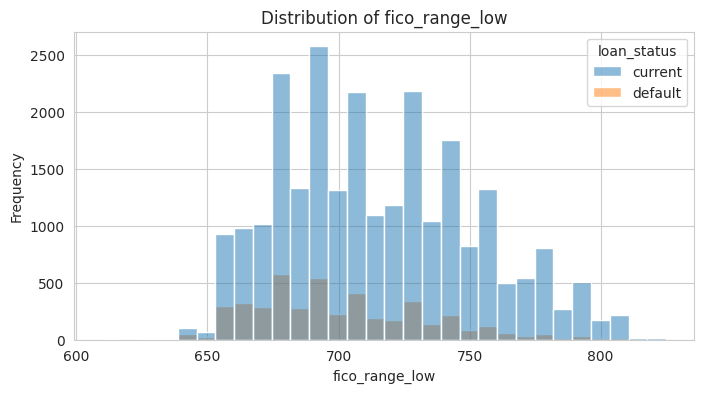

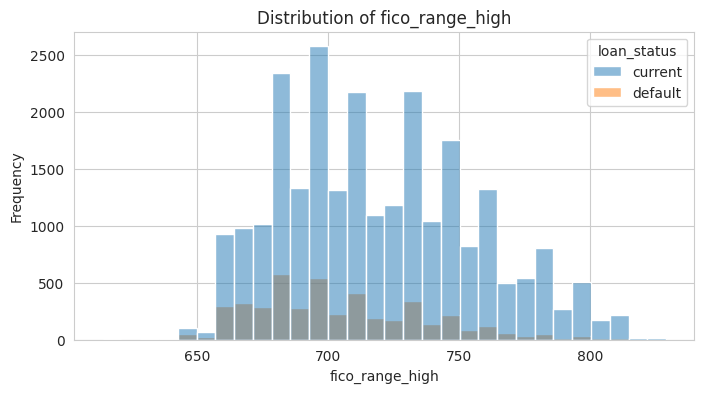

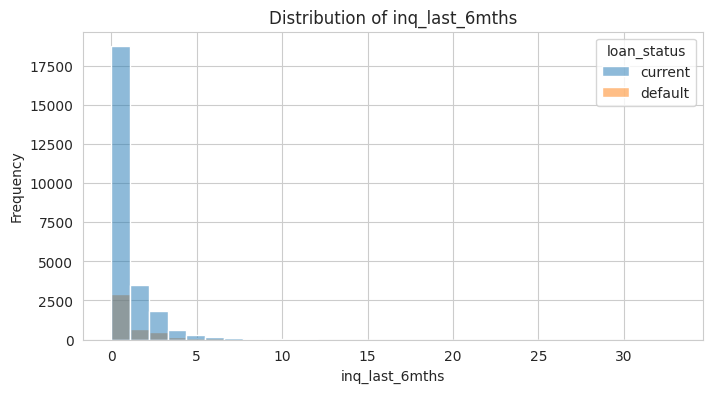

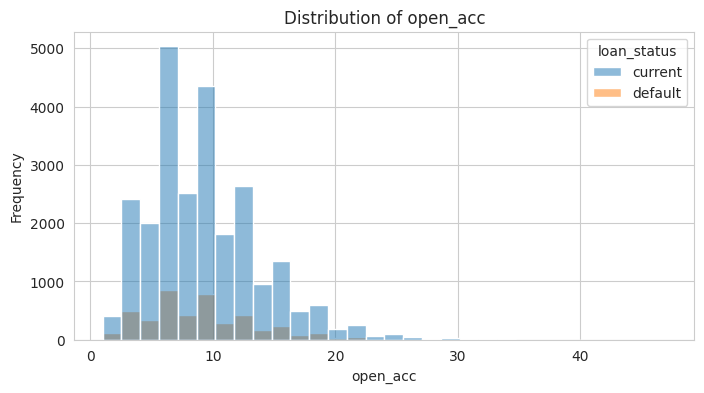

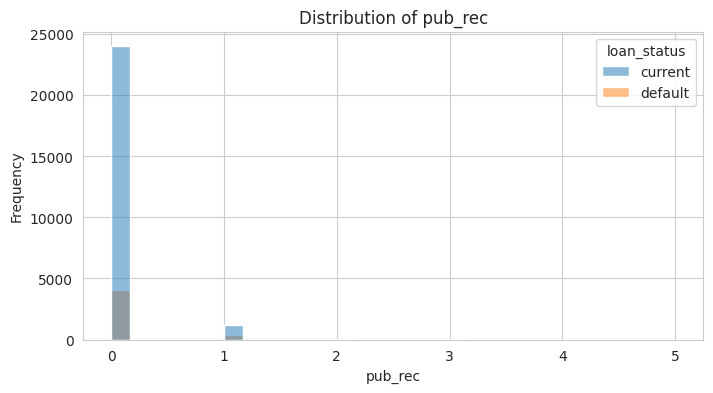

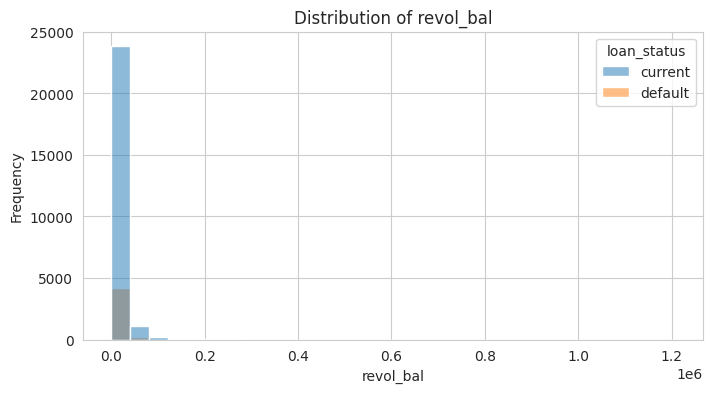

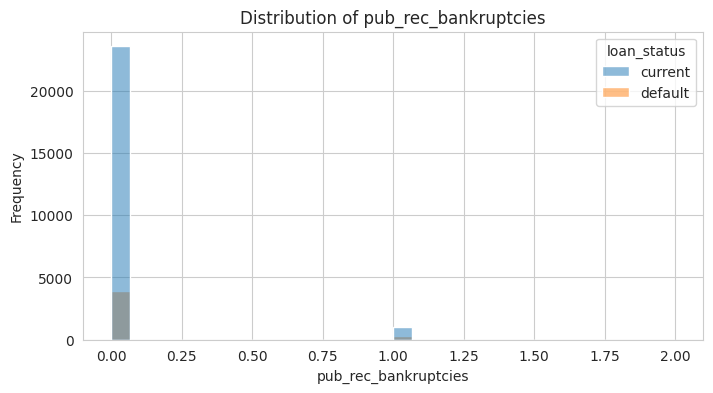

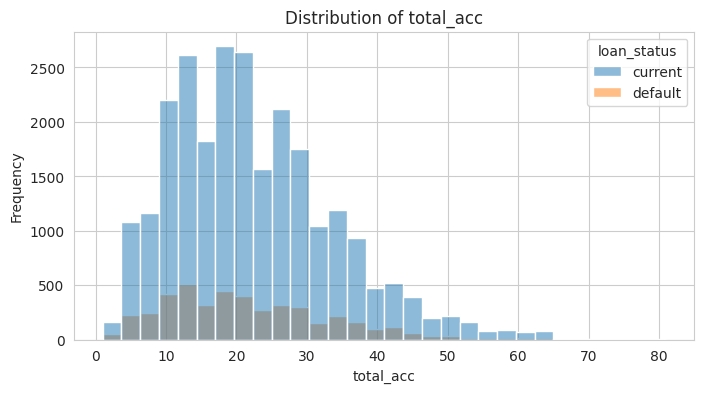

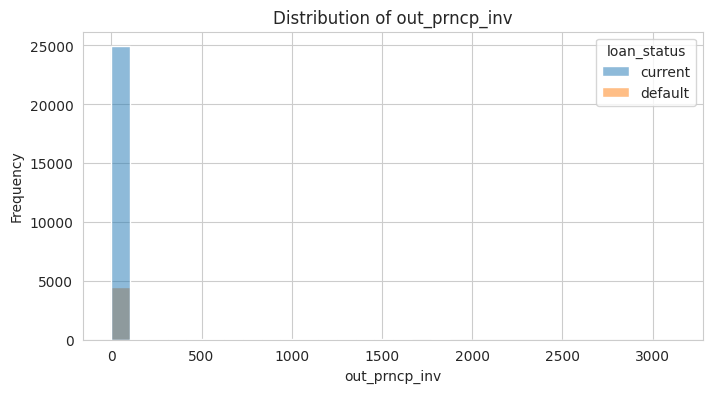

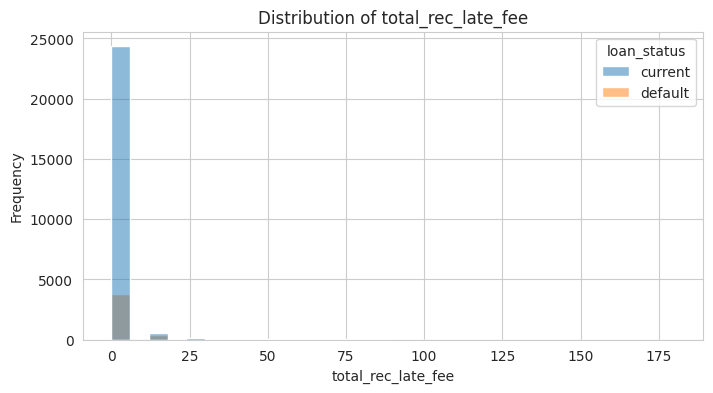

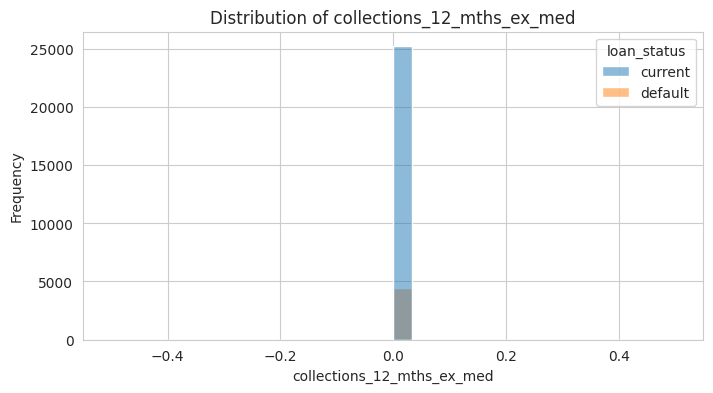

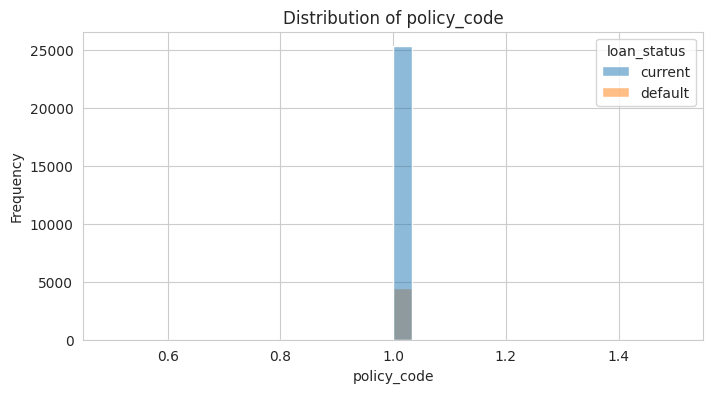

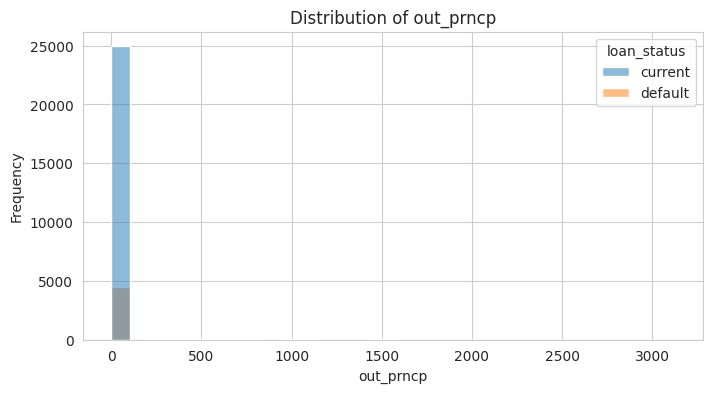

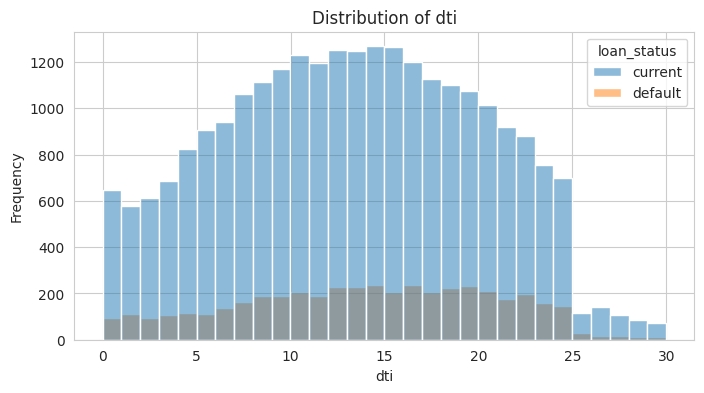

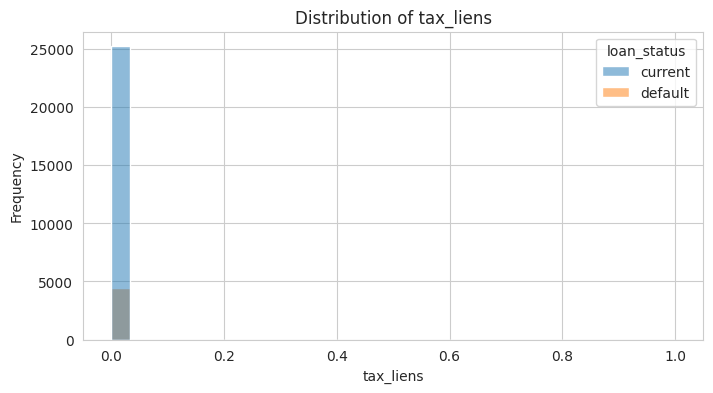

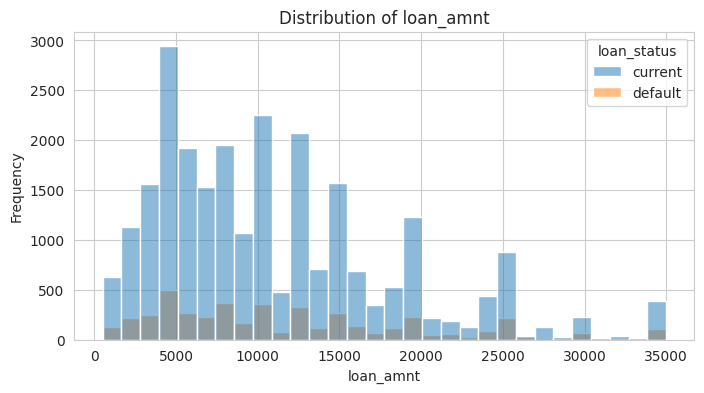

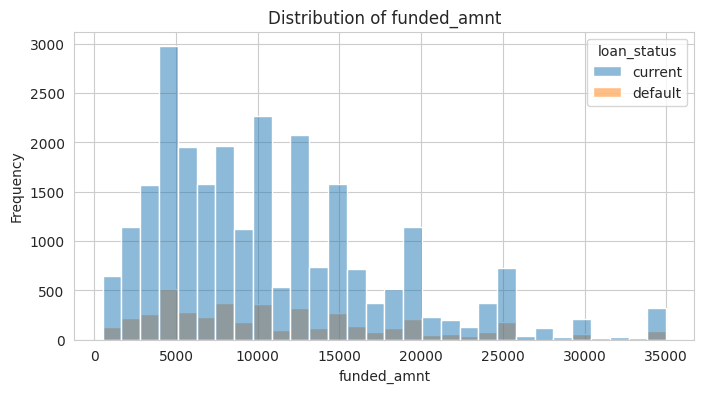

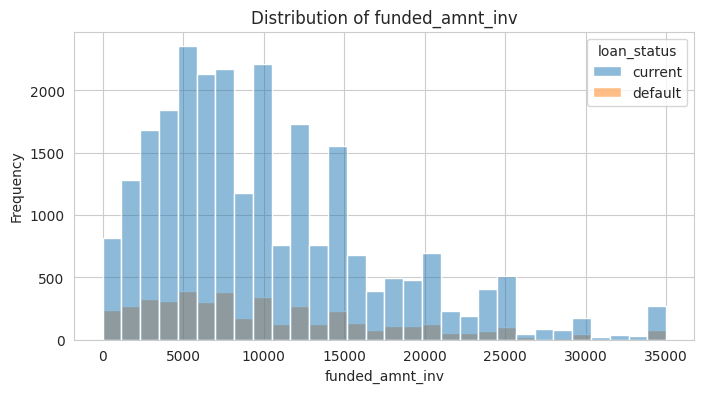

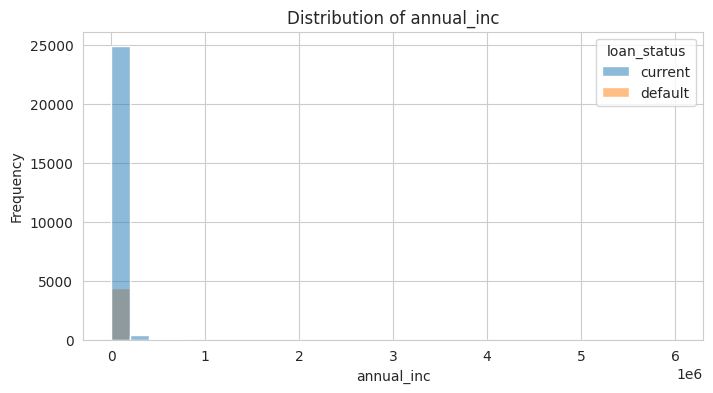

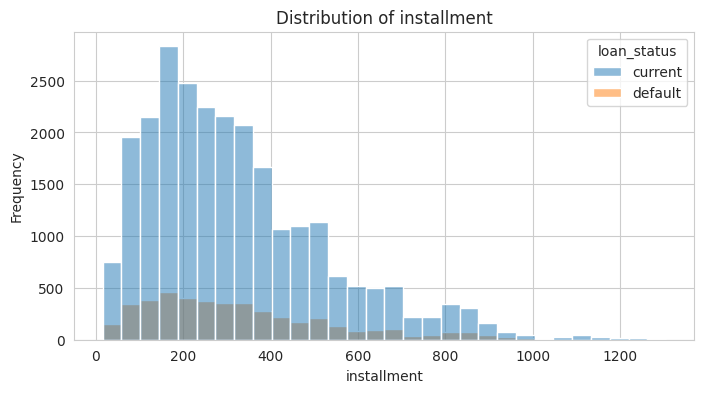

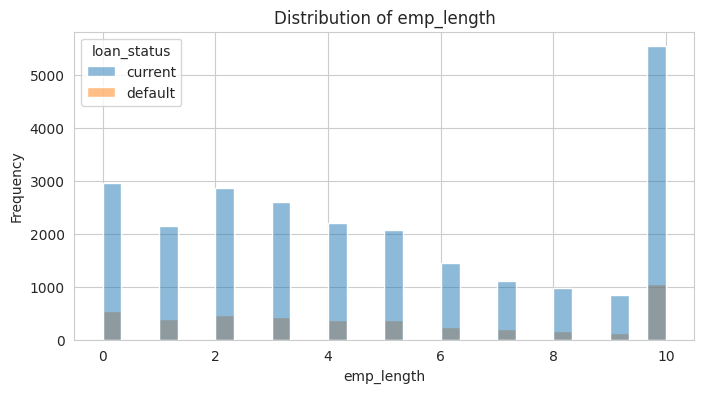

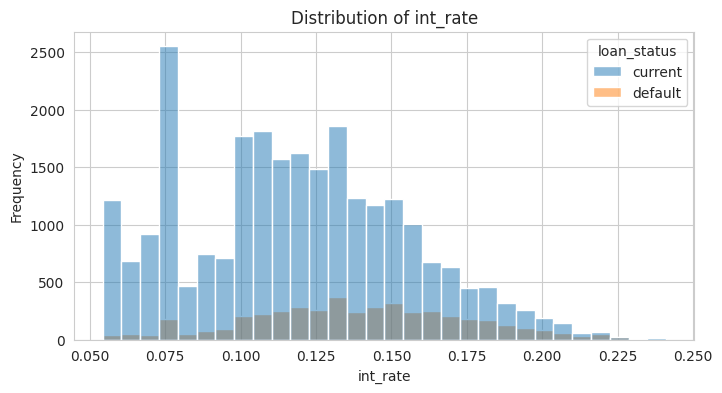

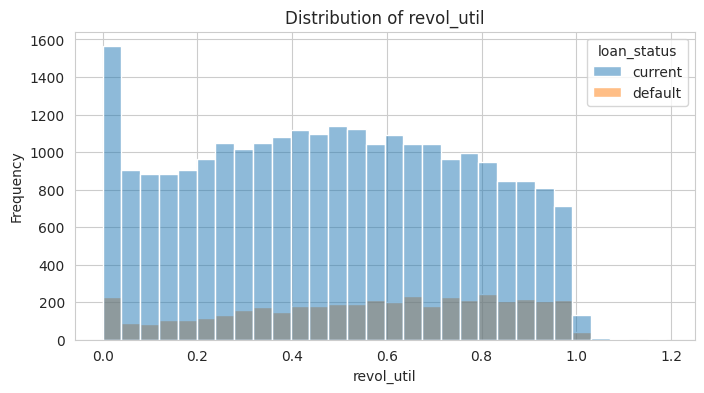

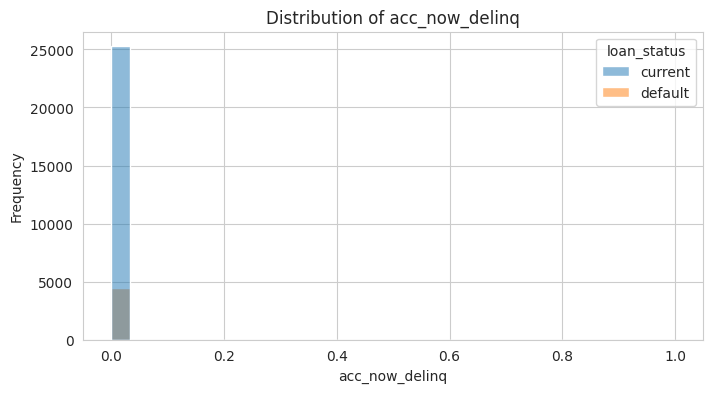

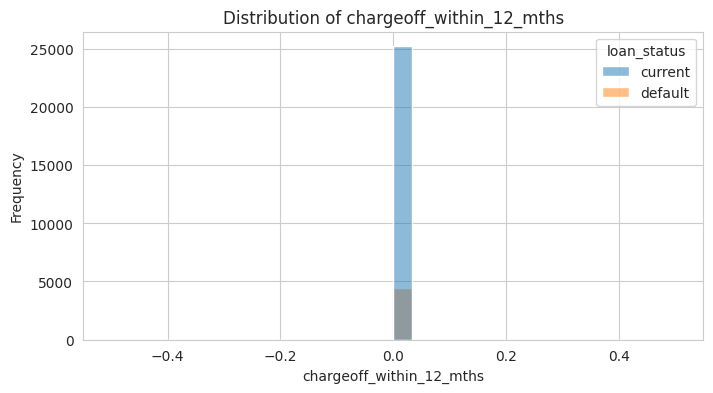

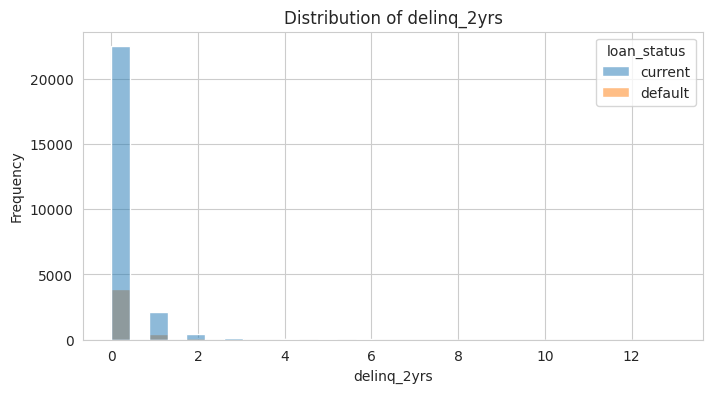

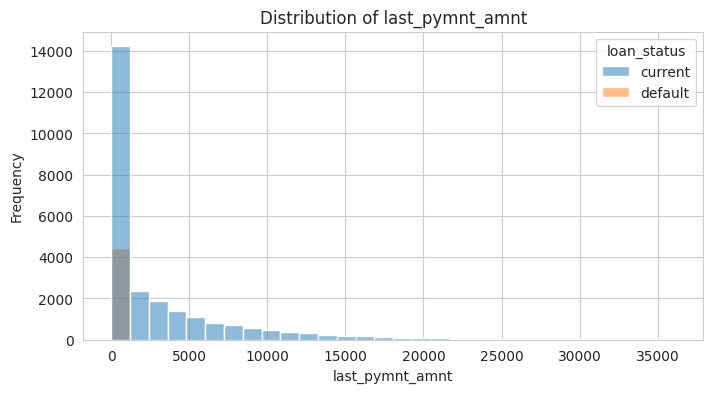

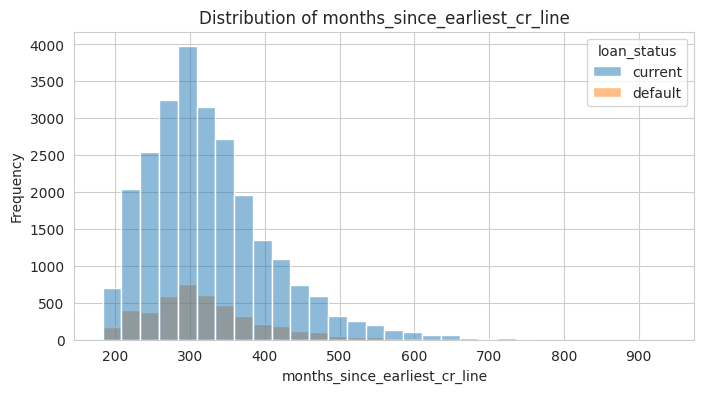

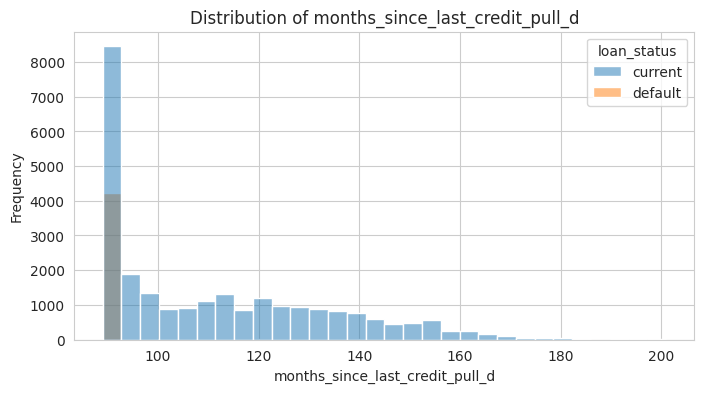

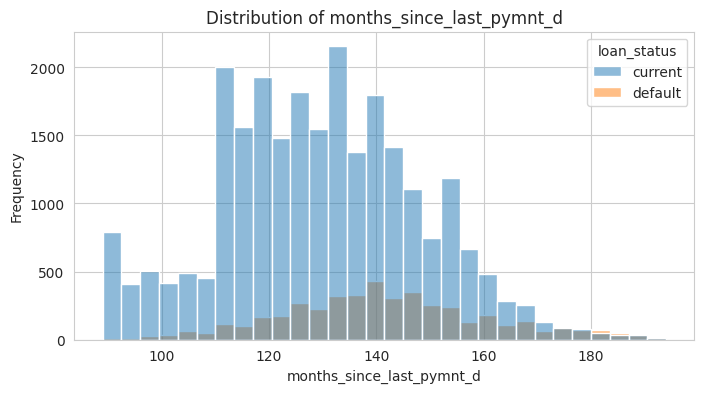

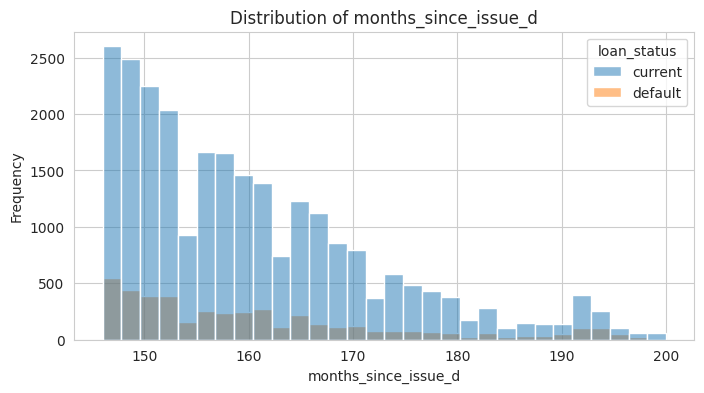

In [22]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data= training_df, x=col, hue="loan_status", bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

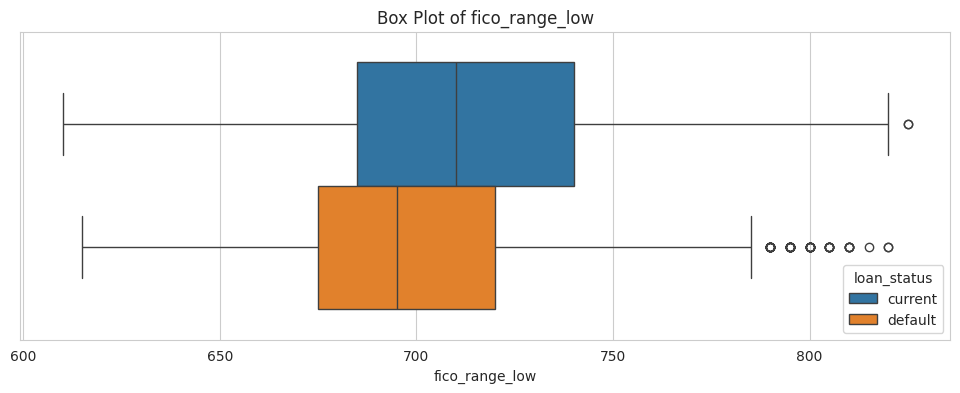

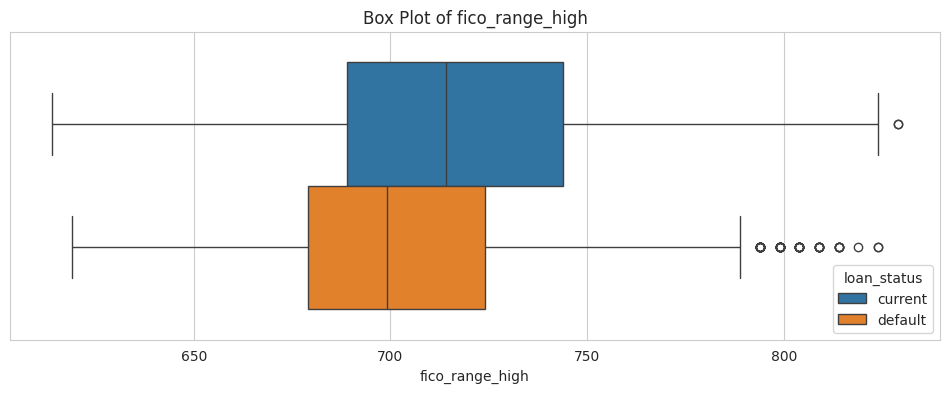

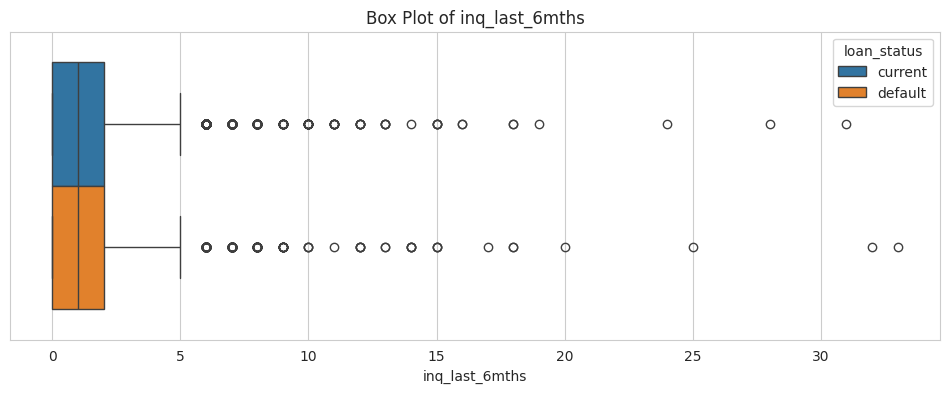

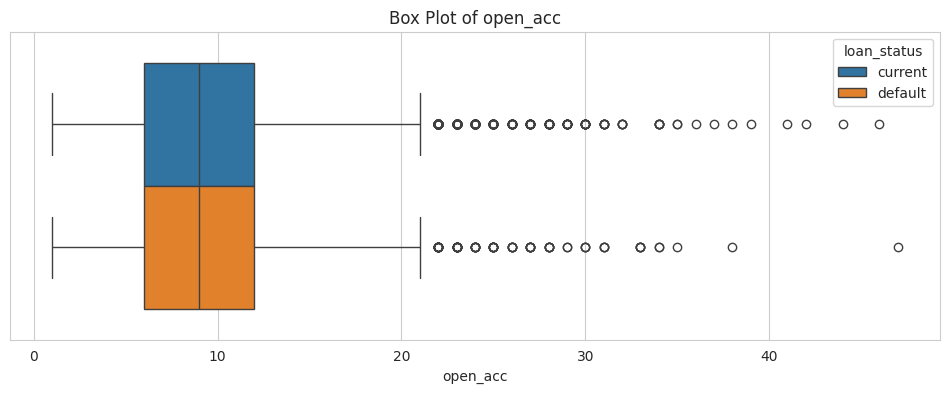

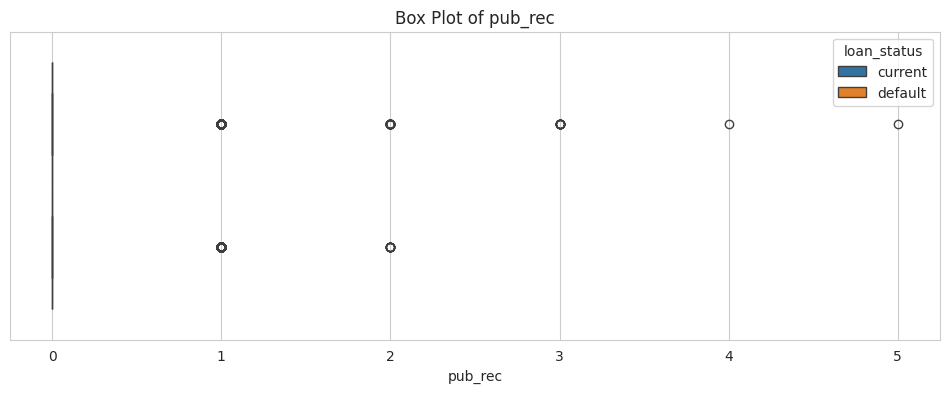

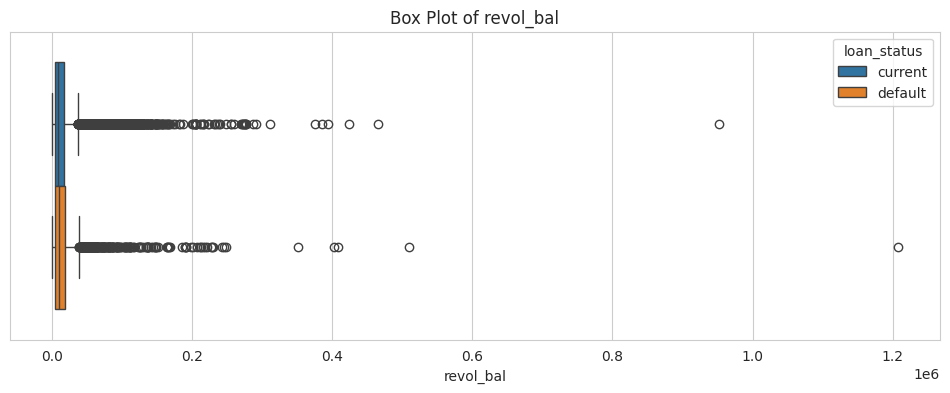

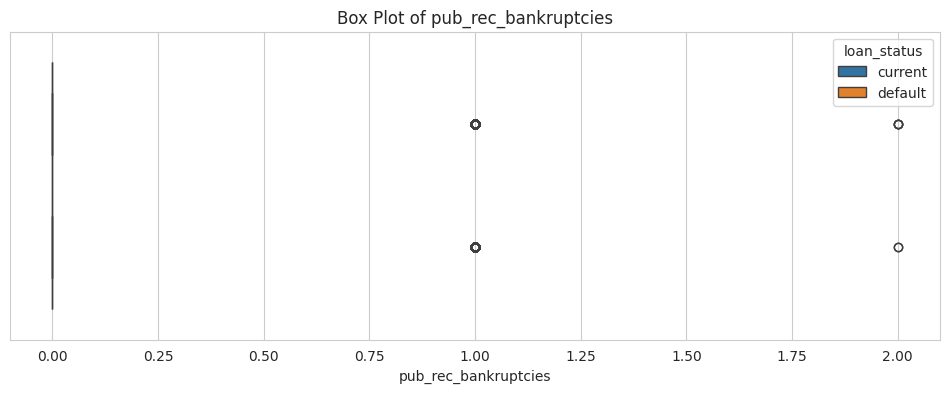

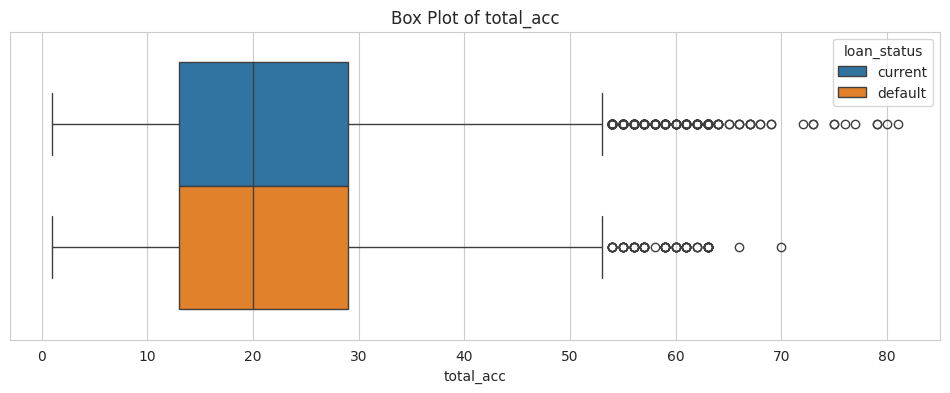

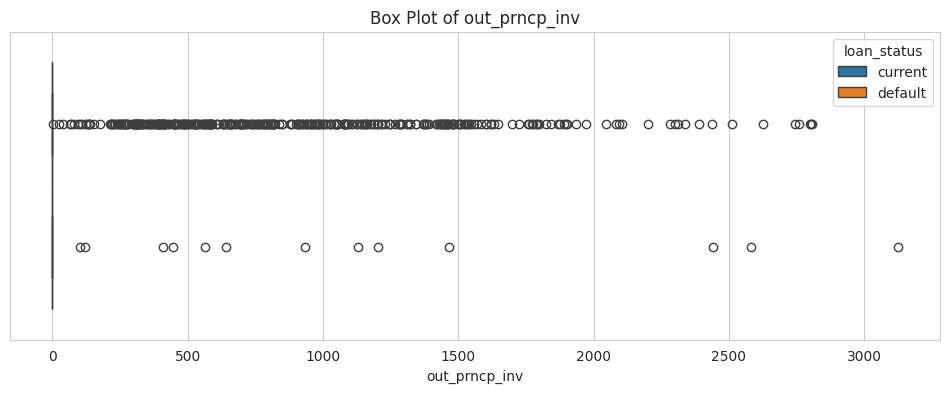

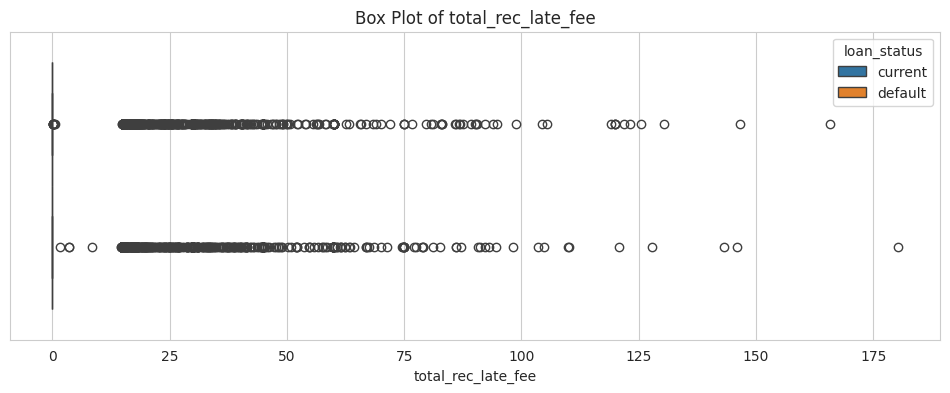

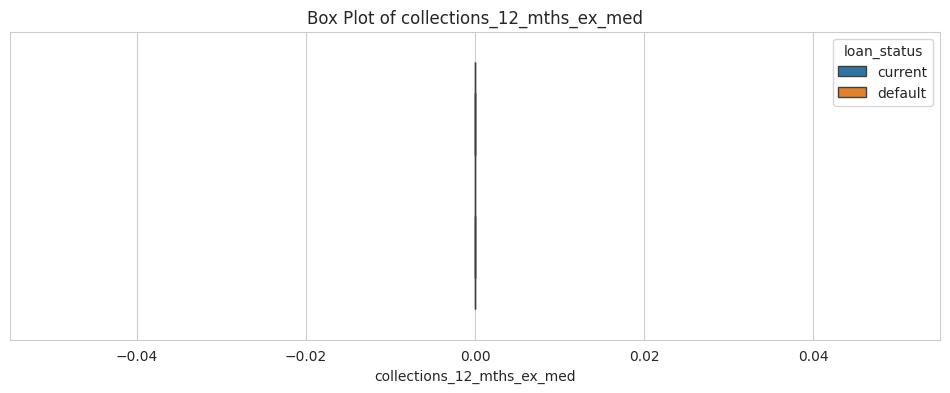

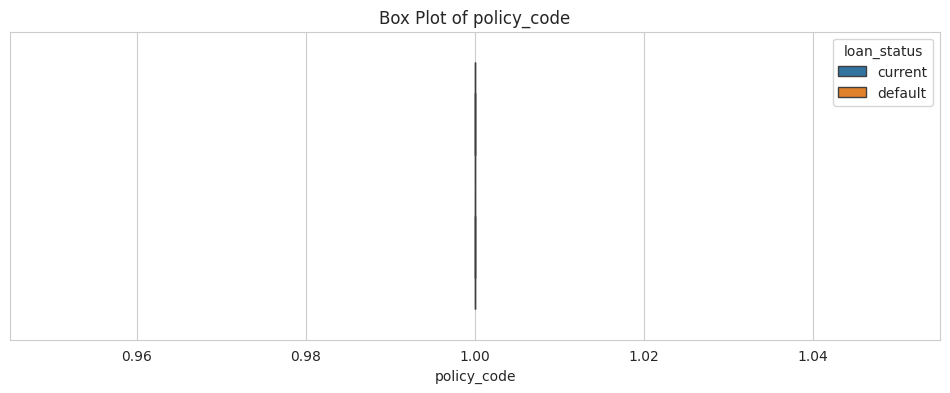

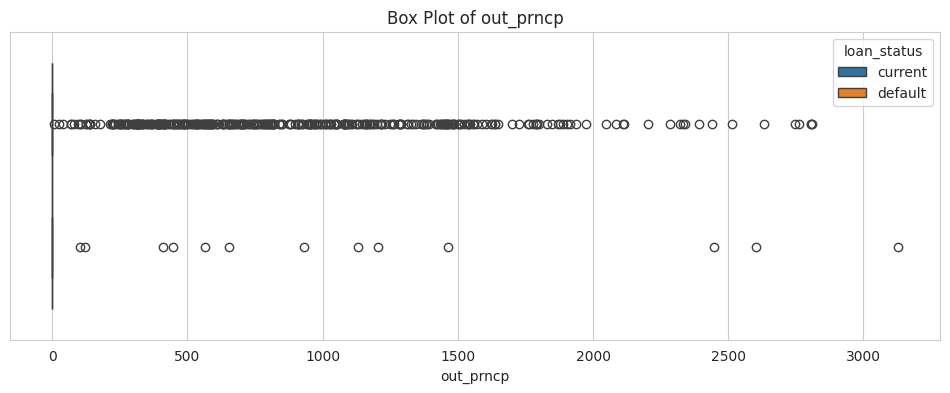

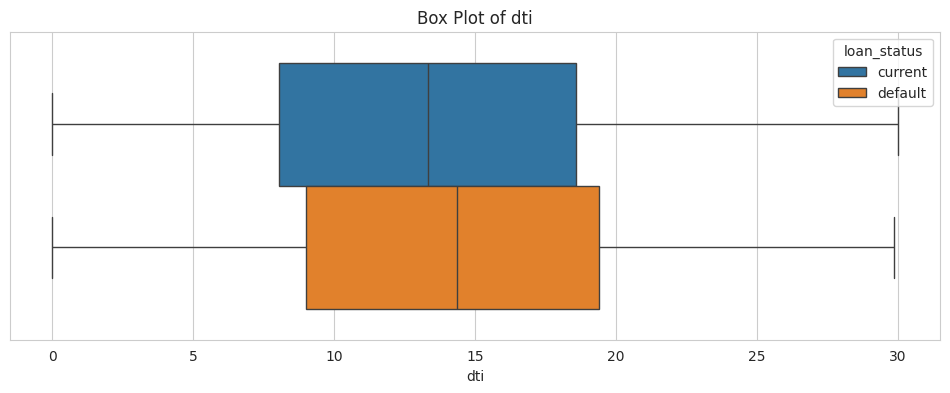

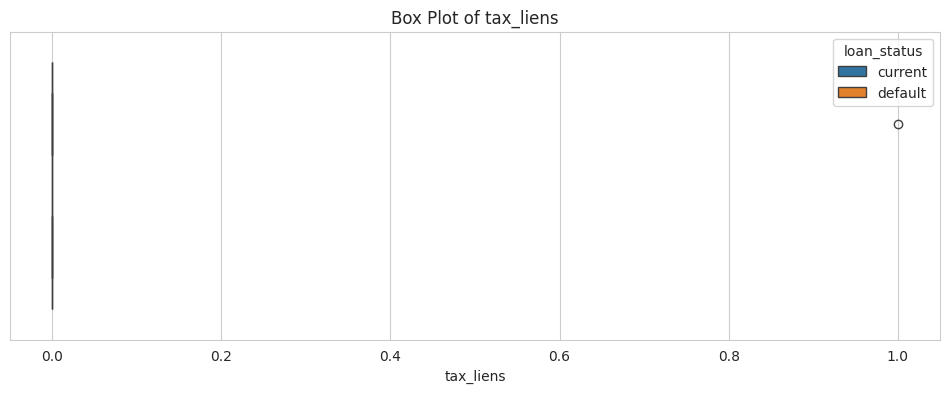

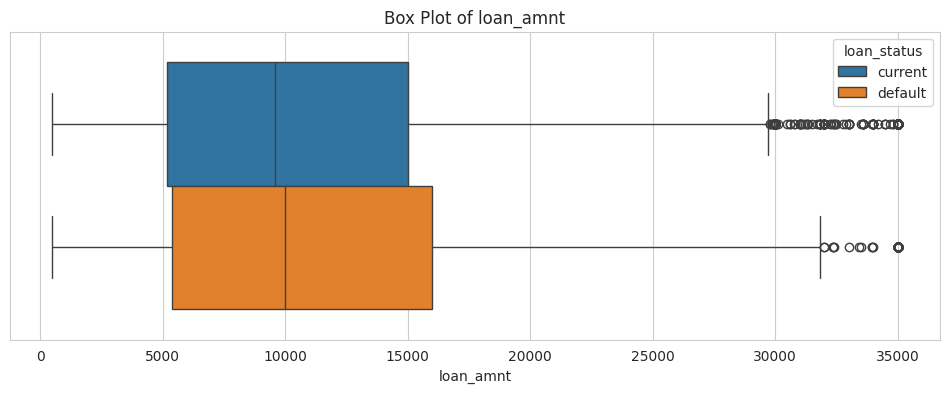

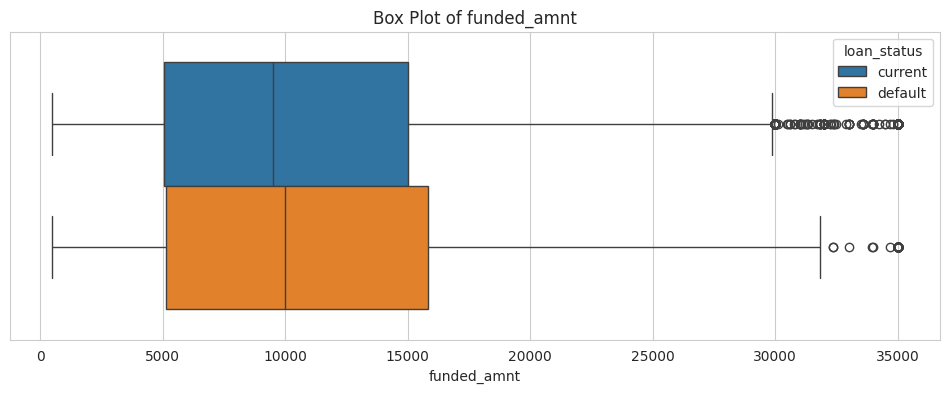

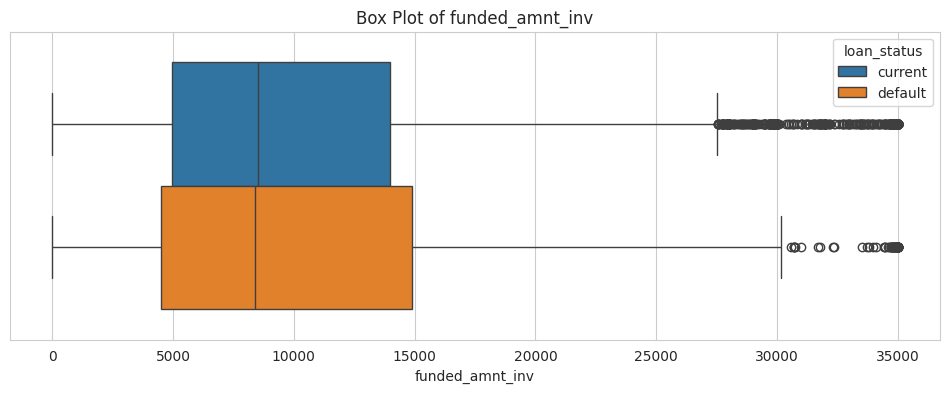

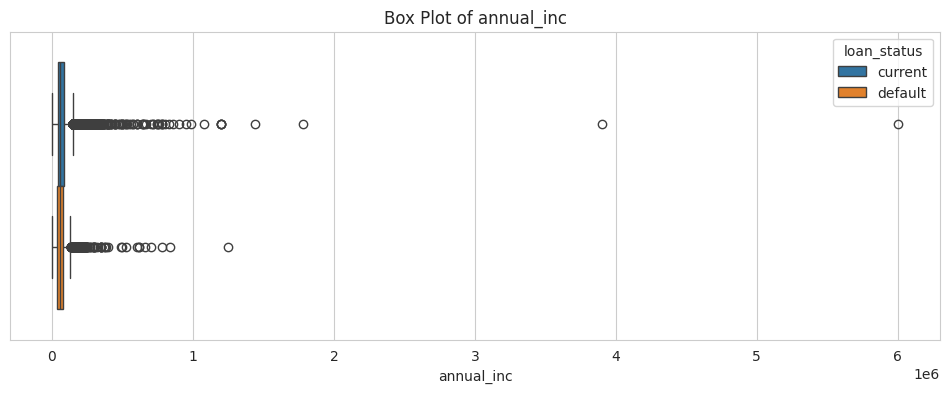

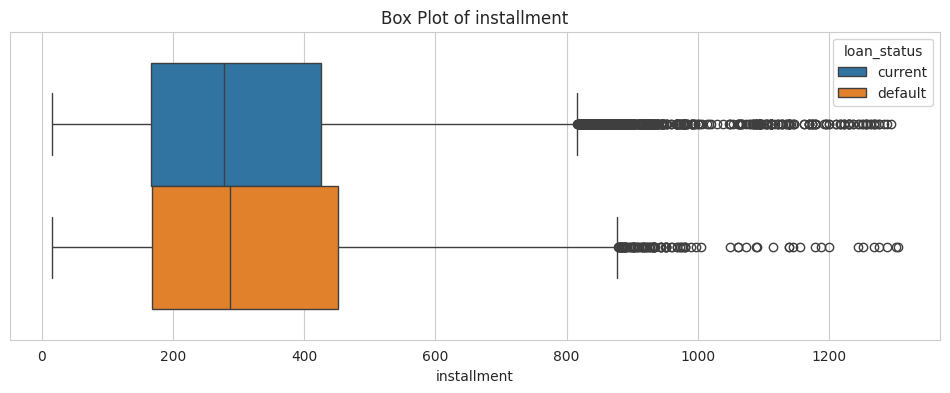

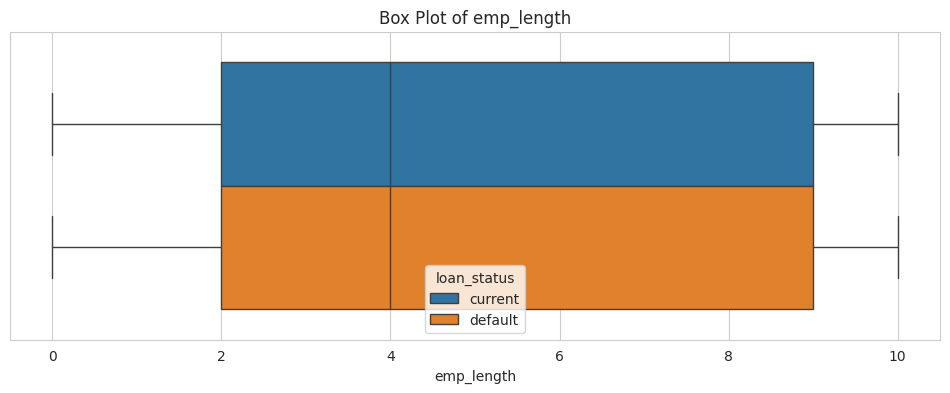

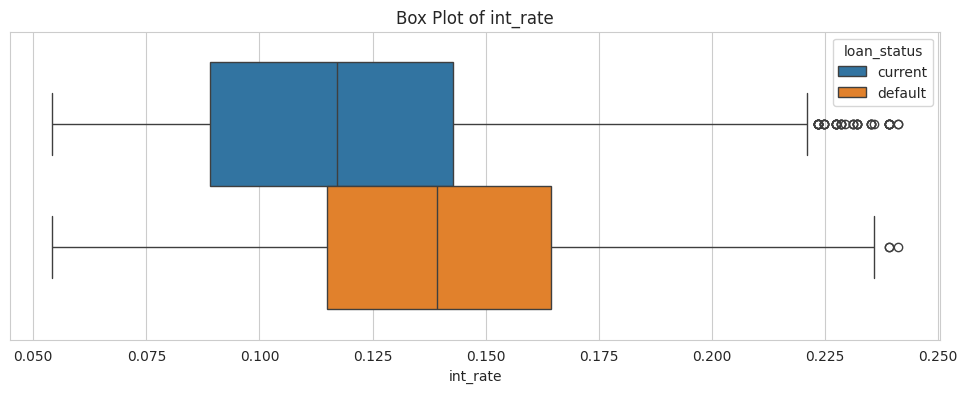

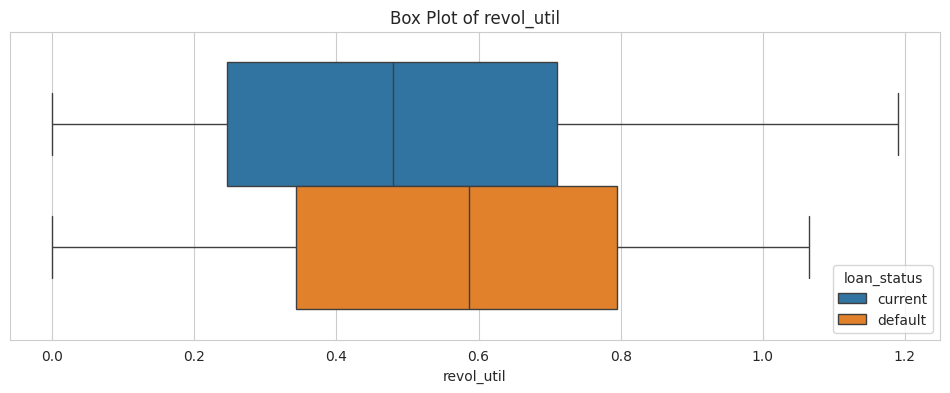

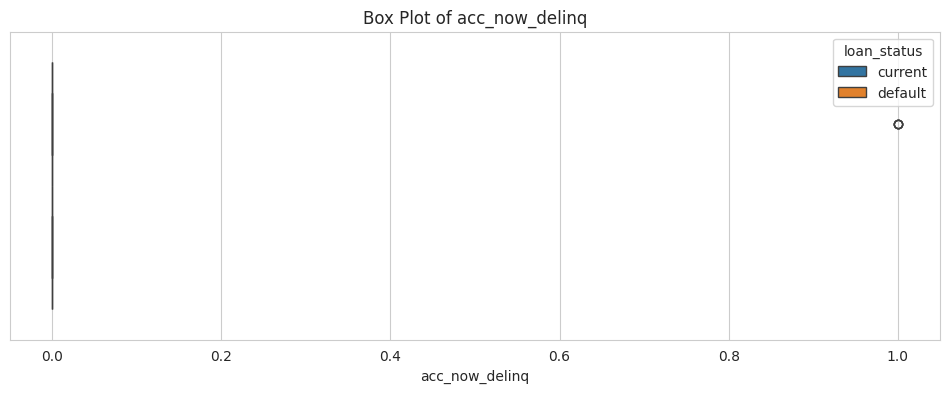

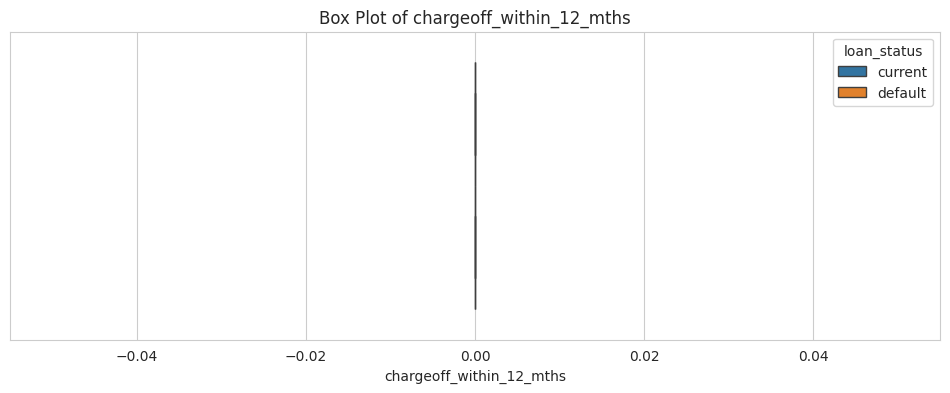

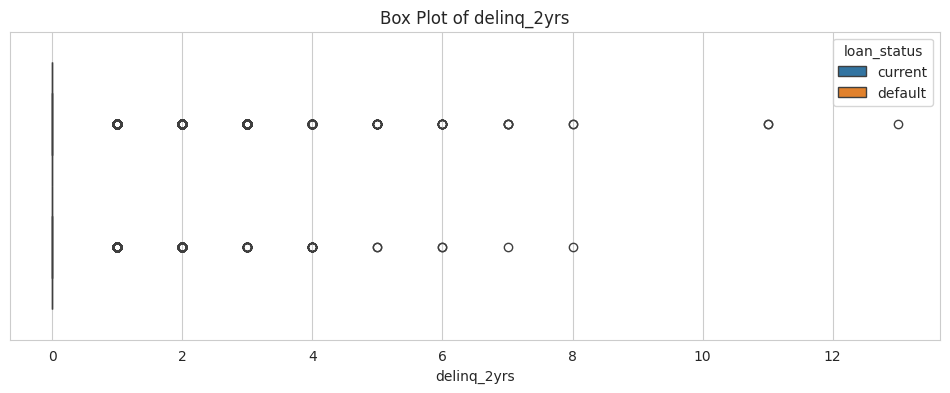

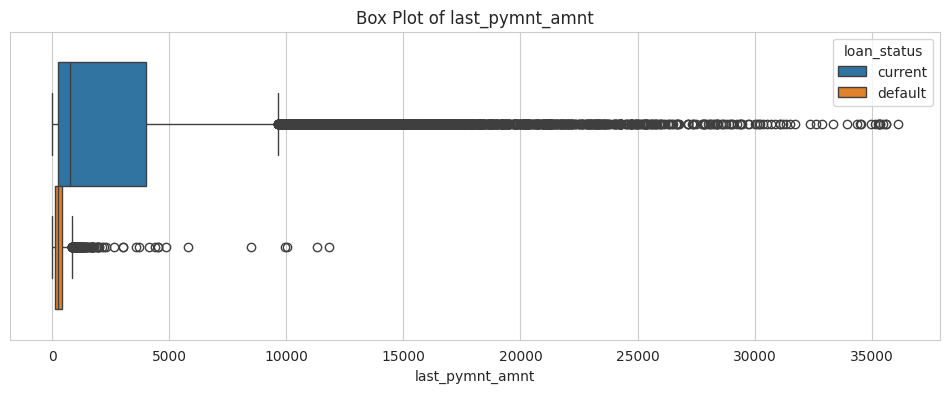

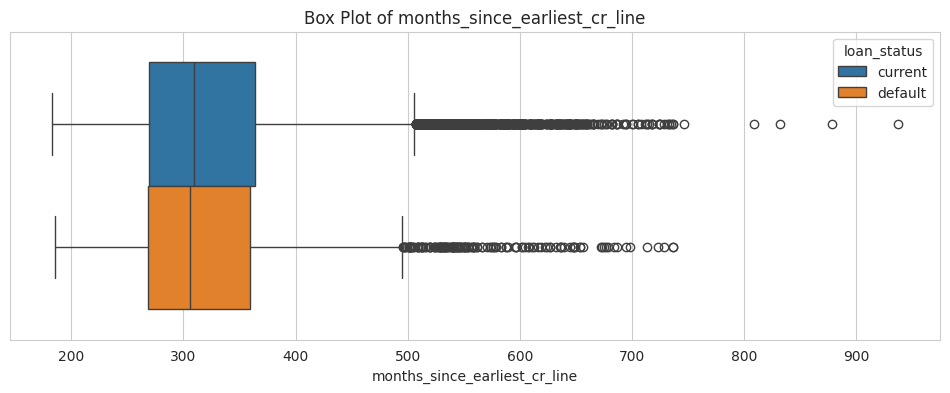

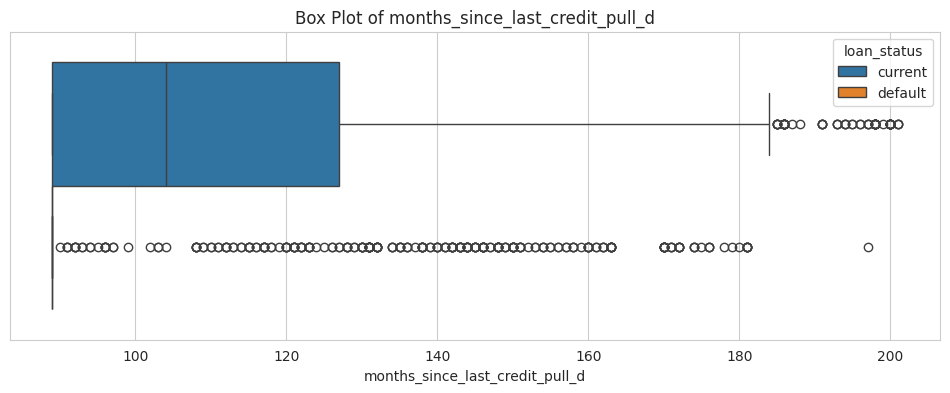

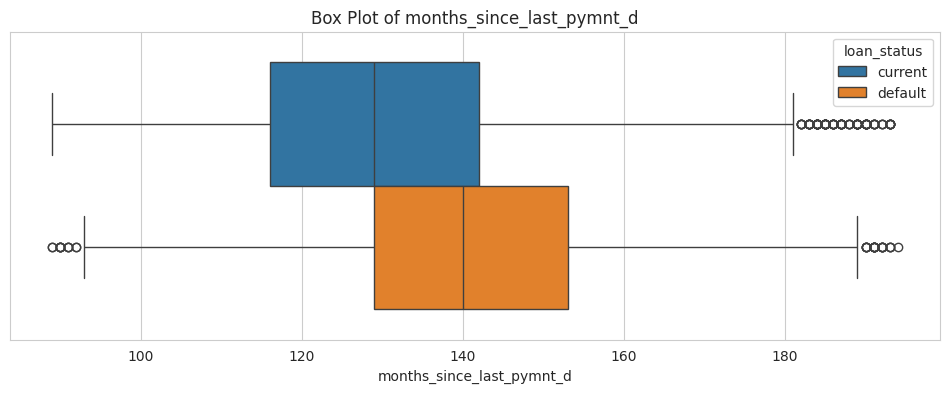

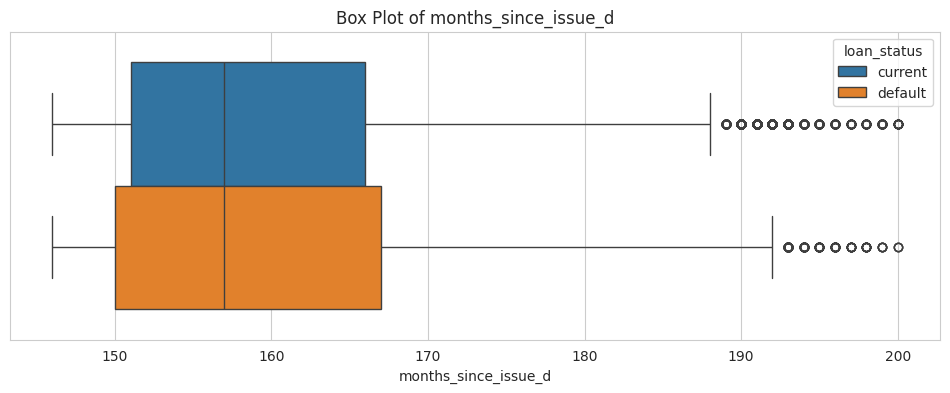

In [23]:
for col in numerical_cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(data = training_df, x=col, hue="loan_status")
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

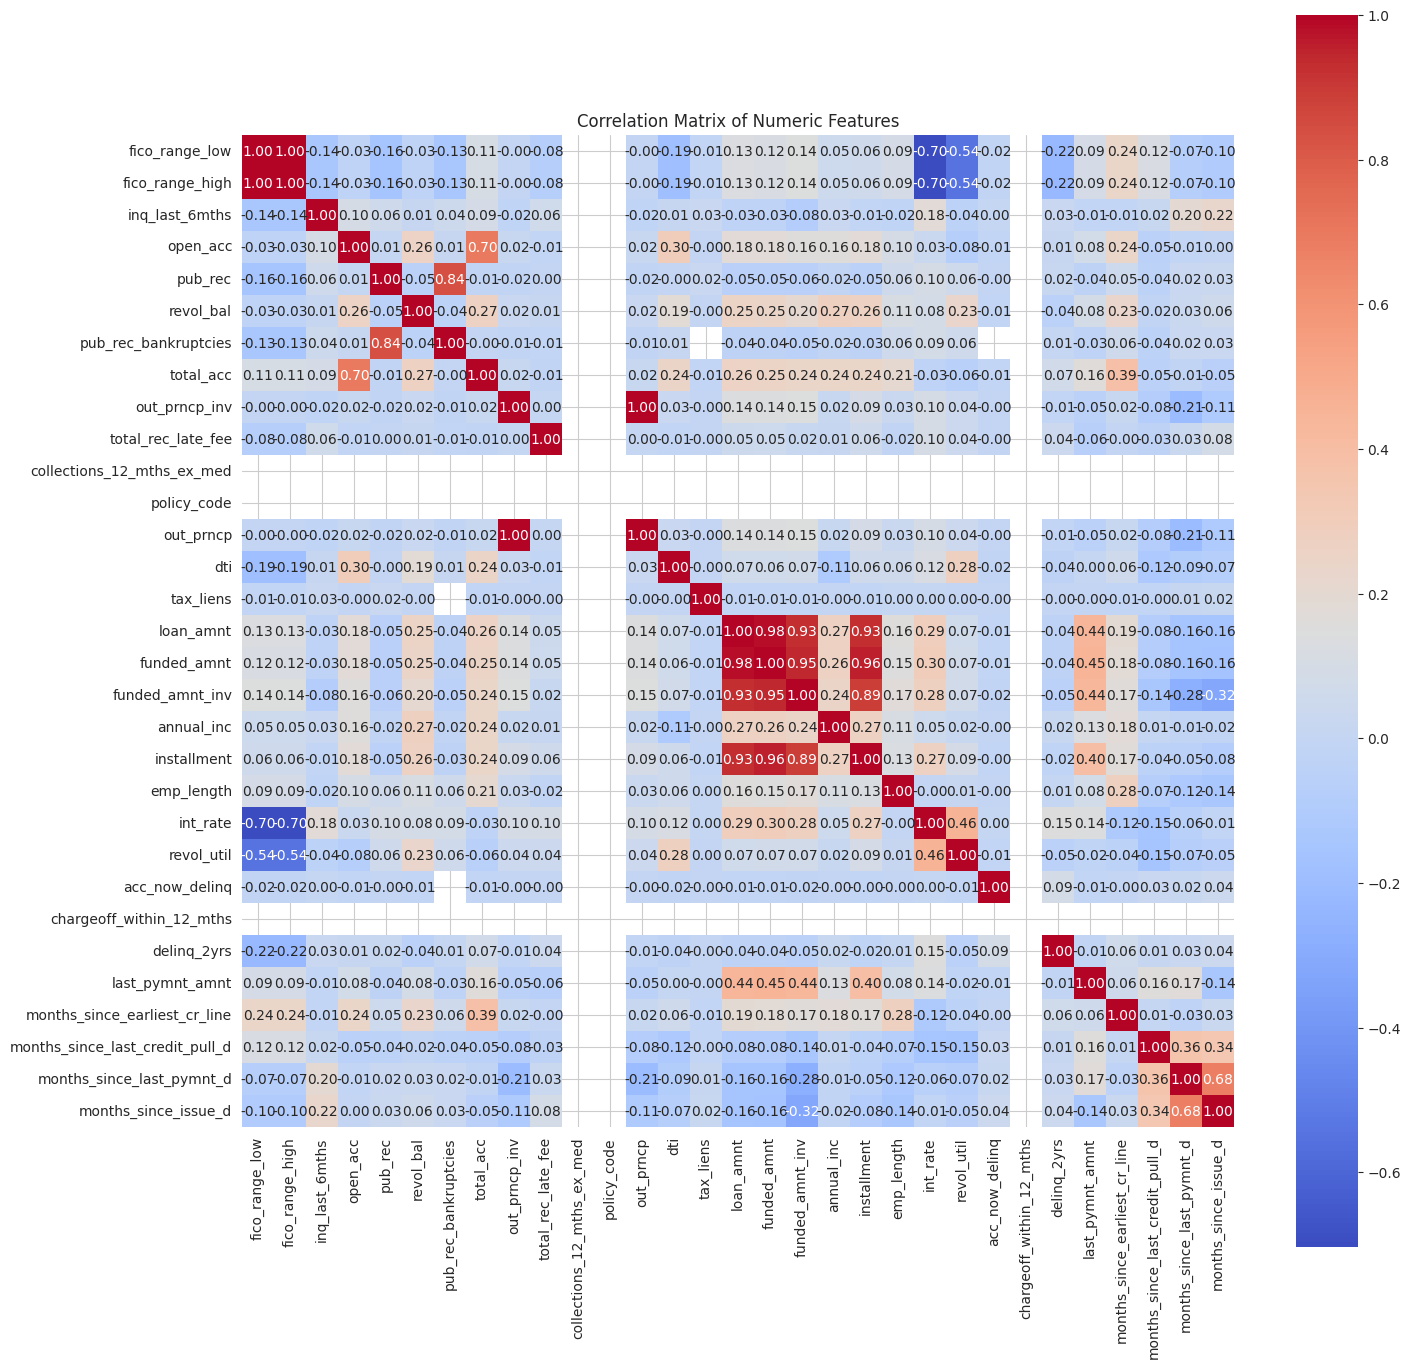

In [24]:
# Compute the correlation matrix
corr = training_df[numerical_cols].corr()

# Generate a heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

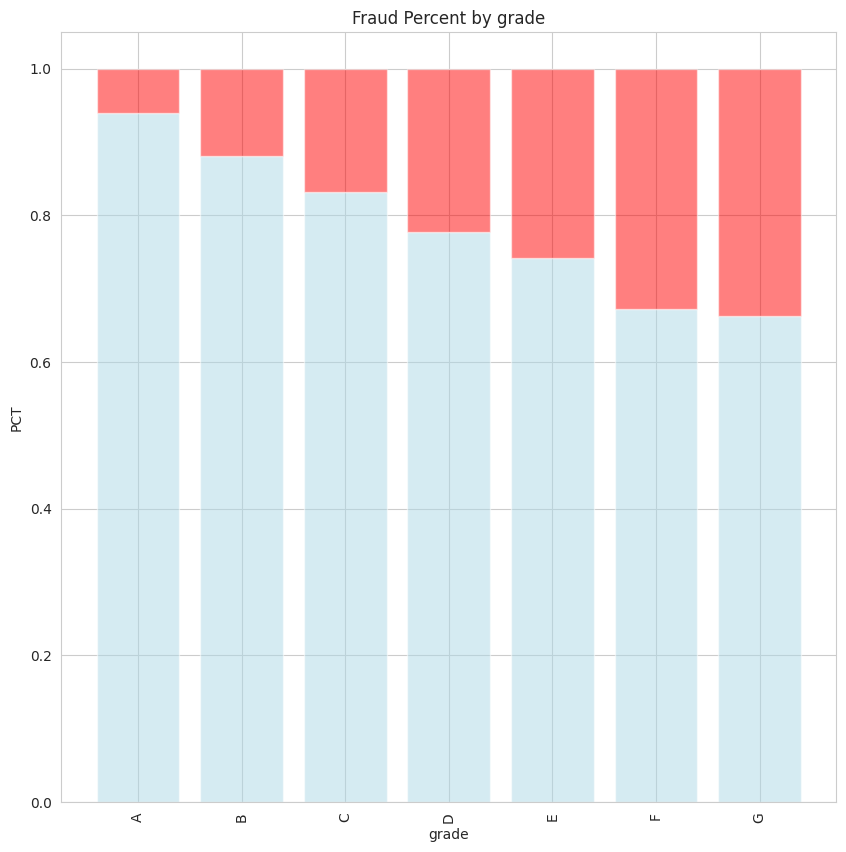

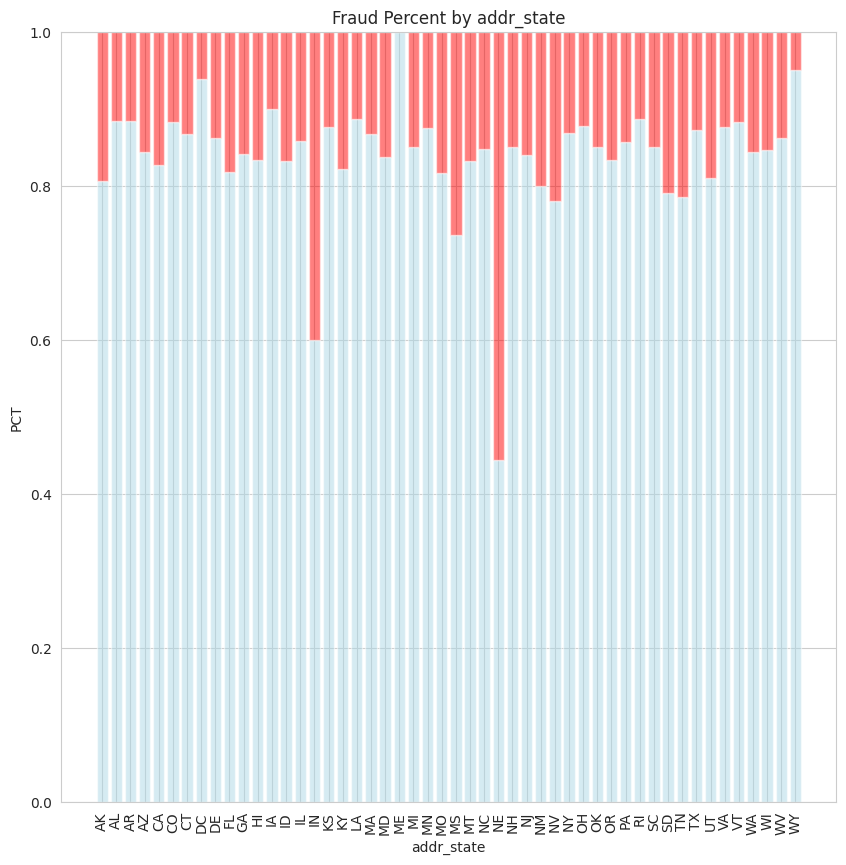

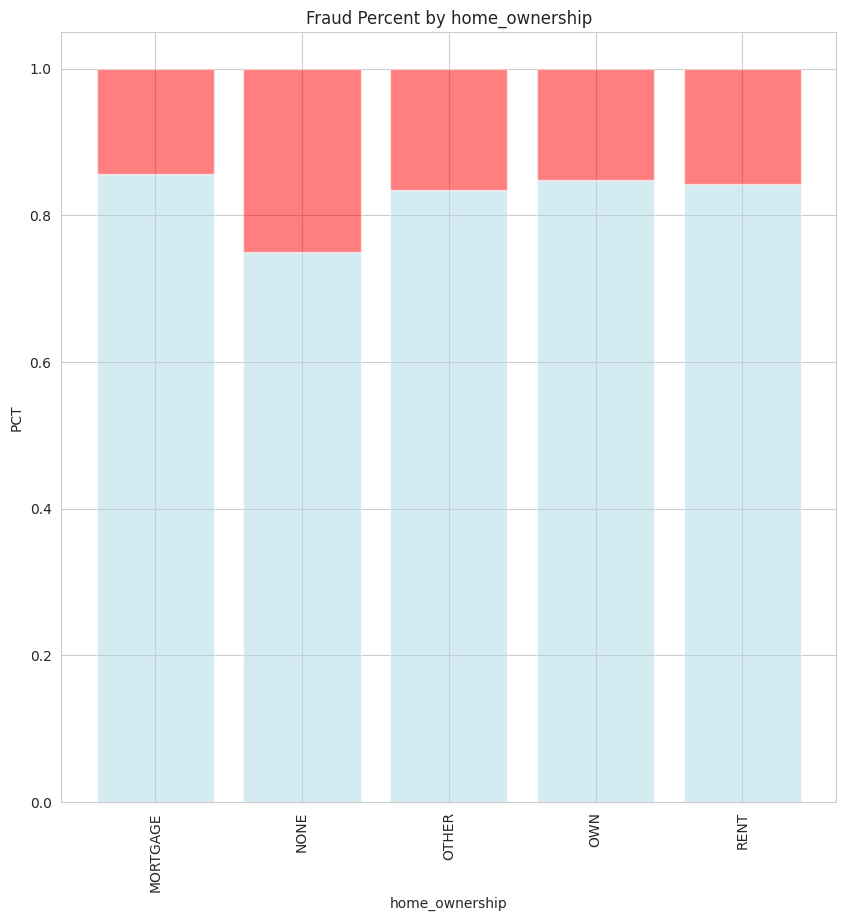

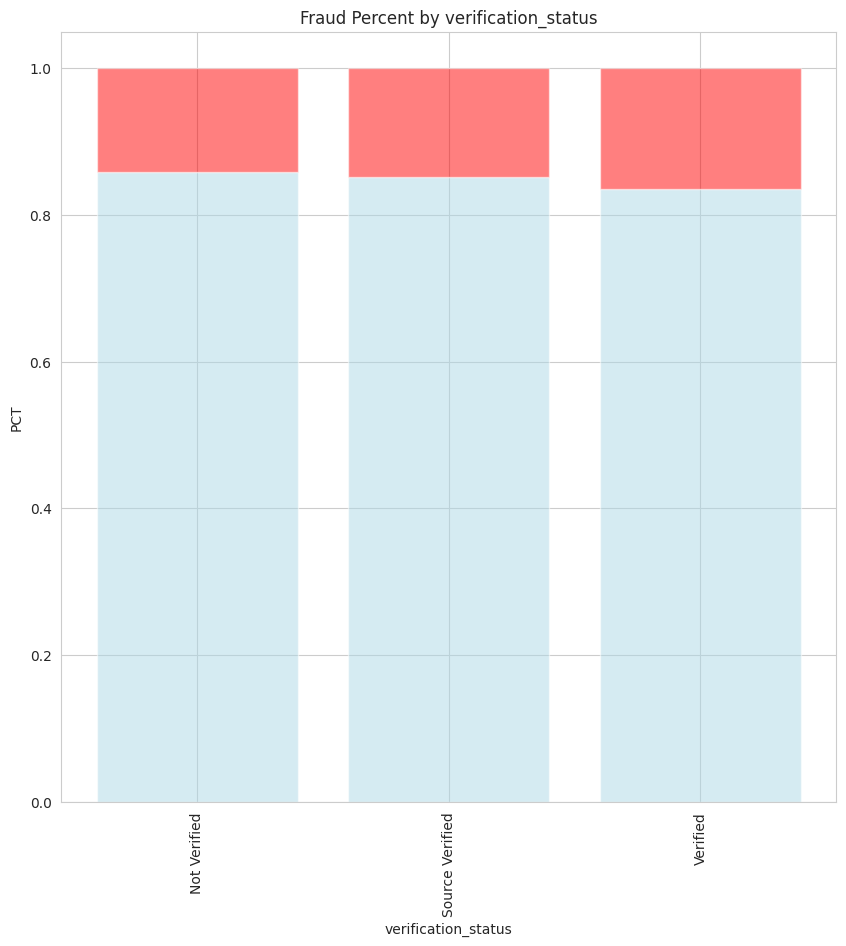

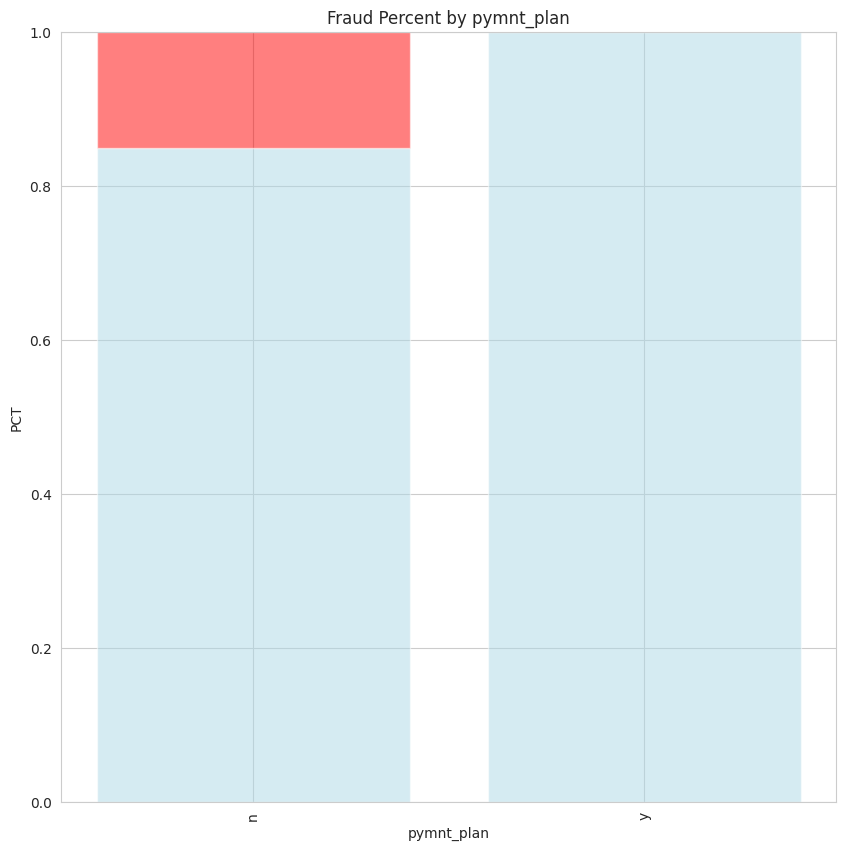

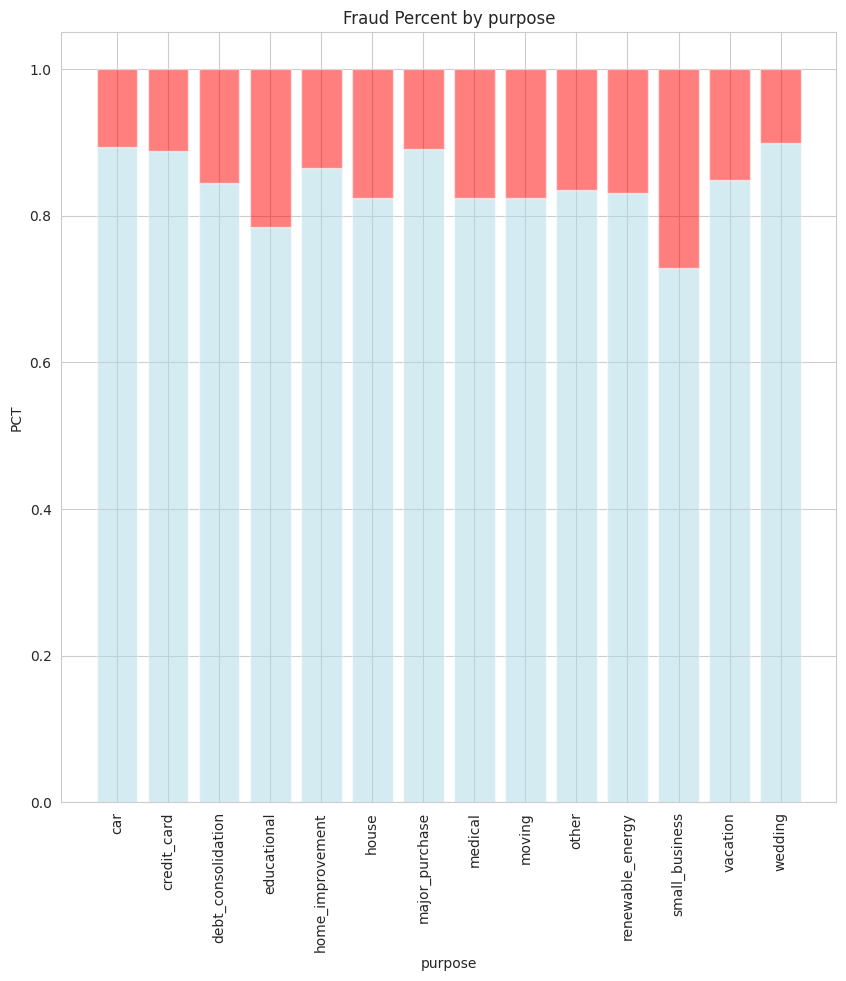

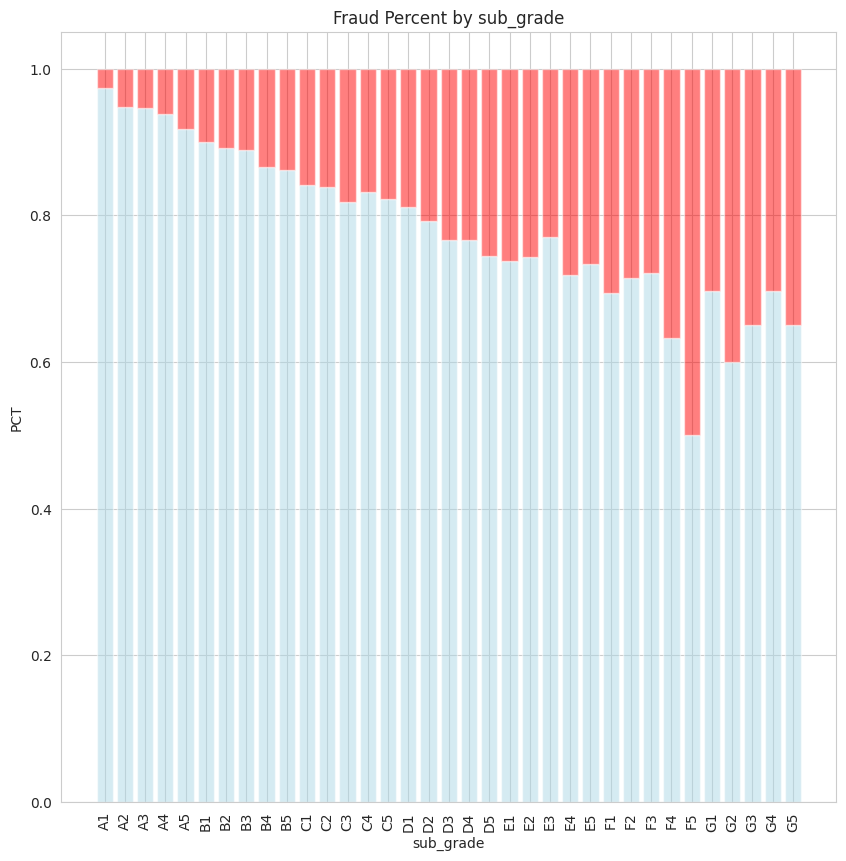

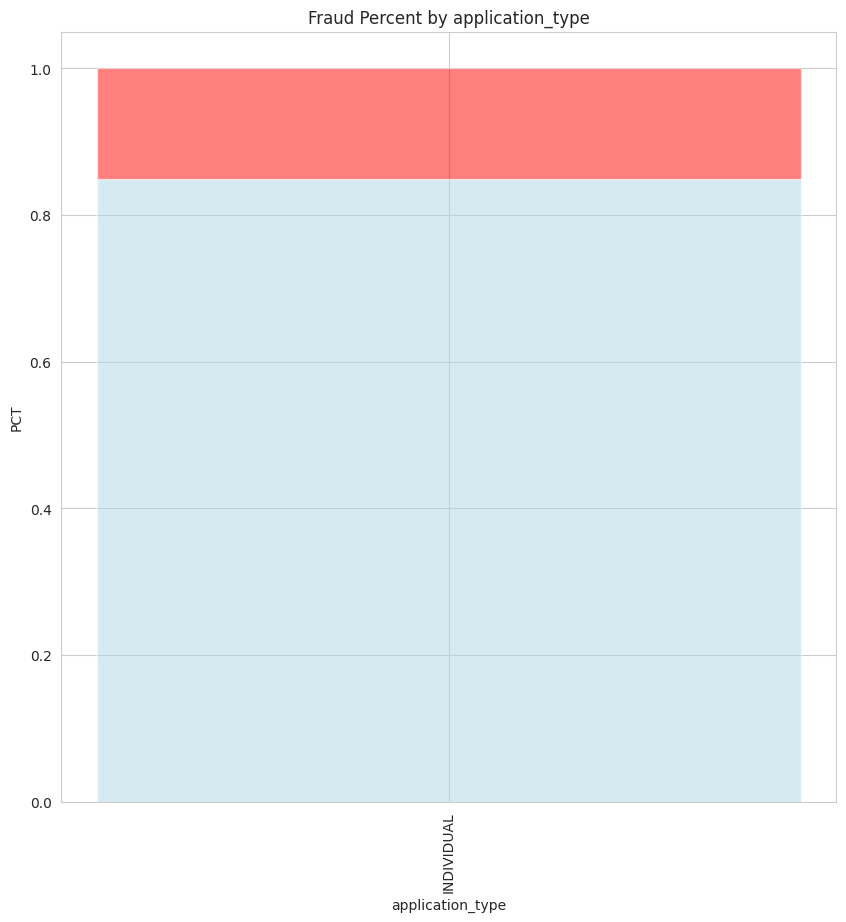

In [25]:
categorical_columns = ["grade", "addr_state", "home_ownership", "verification_status", "pymnt_plan", "purpose",
                     "sub_grade", "application_type"]

for col in categorical_columns:
    ctab = pd.crosstab(training_df[col], training_df['loan_status'], normalize="index").reset_index()
    plt.figure(figsize=(10,10))
    plt.bar(ctab[col].astype('str'), ctab['current'], facecolor='lightblue', alpha=0.5)
    plt.bar(ctab[col].astype('str'), ctab['default'], bottom=ctab['current'], facecolor='red', alpha=0.5)
    plt.title(f'Fraud Percent by {col}')
    plt.ylabel('PCT')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    plt.show()

## We can clearly see from the EDA that our numerical and categorical columns of choice appear to be significnant.

# Let's now create some partial dependence plots

# We use logistic regression as a baseline

In [26]:
# Define the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=223, max_iter=500))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
lr_predictions = lr_pipeline.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f" Precision: {precision_score(y_test, lr_predictions):.4f}")
print(f" Recall: {recall_score(y_test, lr_predictions):.4f}")
print(f" AUC: {roc_auc_score(y_test, lr_predictions):.4f}")
print(f" F1 Score: {f1_score(y_test, lr_predictions):.4f}")

Logistic Regression Accuracy: 0.9475
 Precision: 0.8692
 Recall: 0.7502
 AUC: 0.8655
 F1 Score: 0.8053


In [27]:
y_scores = lr_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Add Precision Column
precisions = []

for threshold in interp_thresholds:
  y_pred = (y_scores >= threshold).astype(int)
  precision = precision_score(y_test, y_pred)
  precisions.append(precision)

target_fpr_df['Precision'] = precisions

target_fpr_df

# Display the DataFrame
target_fpr_df

Target FPR (%)  Expected TPR  Threshold  Precision
0             1.0      0.595514   0.754458   0.910165
1             2.0      0.753287   0.489527   0.867320
2             3.0      0.828306   0.352286   0.823846
3             4.0      0.864656   0.269618   0.785112
4             5.0      0.891725   0.214152   0.750163
5             6.0      0.911060   0.179073   0.720049
6             7.0      0.918794   0.157944   0.689495
7             8.0      0.924981   0.141123   0.660044
8             9.0      0.929621   0.131055   0.636316
9            10.0      0.933488   0.118989   0.613313

In [28]:
feature_names = preprocessor.get_feature_names_out()
feature_importance = lr_pipeline.named_steps['classifier'].coef_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance[0]})
feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
feature_importance_df.head(n=10)

feature  importance
0        num__fico_range_low    0.079592
1       num__fico_range_high    0.079592
2        num__inq_last_6mths    0.073523
3              num__open_acc    0.023875
4               num__pub_rec    0.090353
5             num__revol_bal    0.087233
6  num__pub_rec_bankruptcies   -0.022684
7             num__total_acc   -0.153608
8         num__out_prncp_inv   -0.043439
9    num__total_rec_late_fee    0.311729

In [29]:
# Logistic Regression coefficients as feature importance
lr_coefficients = lr_pipeline.named_steps['classifier'].coef_[0]

# Aligning feature names and coefficients
lr_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_coefficients})
lr_feature_importance_df = lr_feature_importance_df.sort_values(by='Coefficient', ascending=False)
lr_feature_importance_df.head(10)

Feature  Coefficient
16                 num__funded_amnt     3.591914
29   num__months_since_last_pymnt_d     2.897857
145               cat__sub_grade_G4     0.918047
141               cat__sub_grade_F5     0.895464
78               cat__addr_state_SD     0.762294
46               cat__addr_state_DE     0.649388
21                    num__int_rate     0.629756
144               cat__sub_grade_G3     0.601727
69               cat__addr_state_NM     0.545390
108   cat__purpose_renewable_energy     0.489181

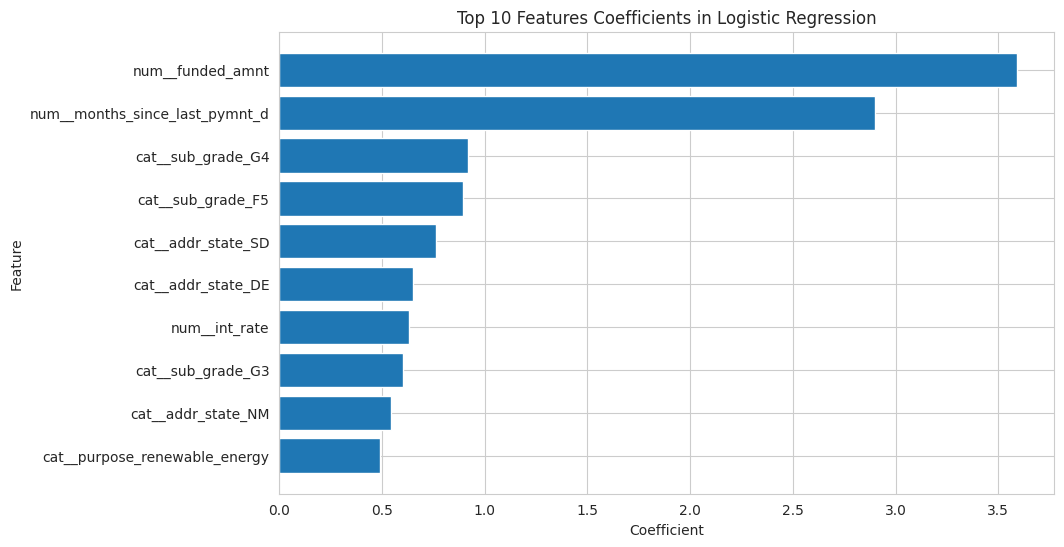

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Features Coefficients in Logistic Regression')
plt.barh(lr_feature_importance_df['Feature'][:10], lr_feature_importance_df['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

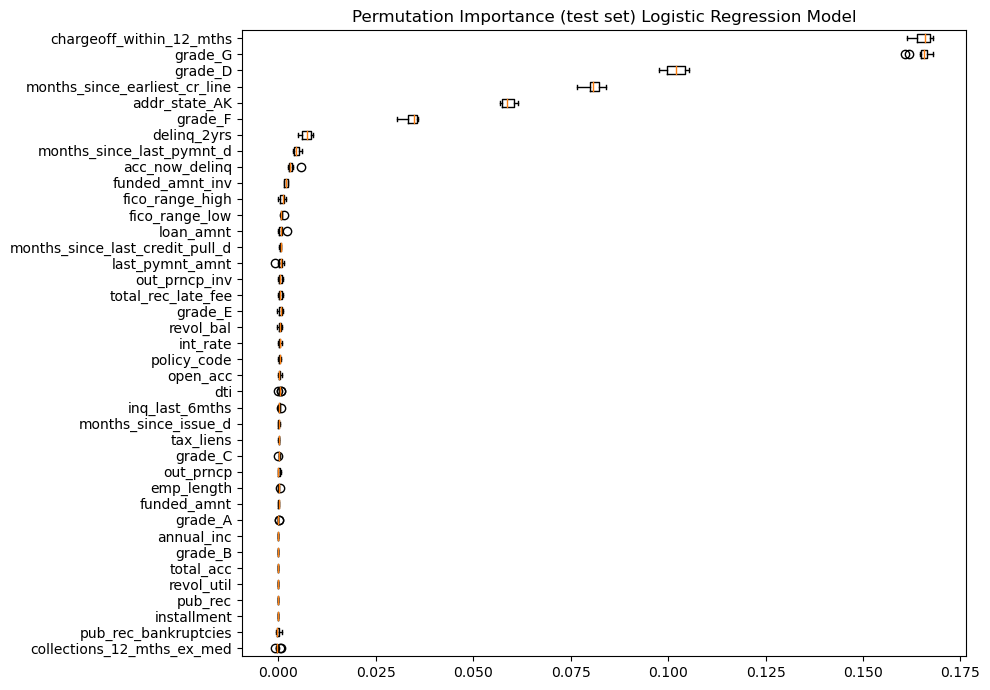

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(lr_pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

# Function to get feature names from column transformer
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []

    # Loop through each transformer in the column transformer
    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(pipe, 'get_feature_names_out'):
            # If the transformer has a get_feature_names_out method, use it
            if hasattr(pipe, 'categories_'):
                feature_names = pipe.get_feature_names_out(features)
            else:
                feature_names = pipe.get_feature_names_out()
        else:
            # Otherwise, use the provided feature names
            feature_names = features
        output_features.extend(feature_names)
    return output_features

# Extract feature names from the preprocessor
feature_names = get_feature_names(preprocessor)

# Now using feature_names with sorted_idx for labeling in the plot
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 7))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importance (test set) Logistic Regression Model")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Test Data')

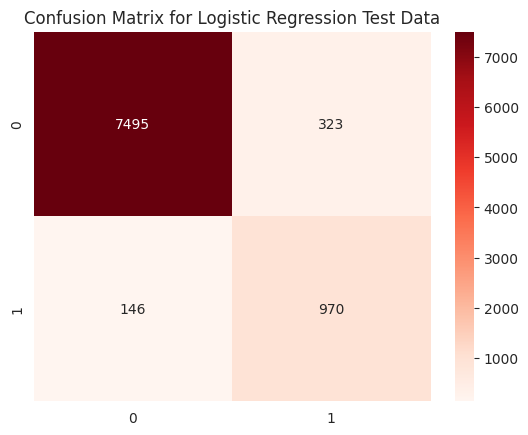

In [31]:
conf_matrix = confusion_matrix(lr_predictions, y_test)
sns.heatmap(conf_matrix, fmt='.5g', annot=True, cmap = "Reds")
plt.title("Confusion Matrix for Logistic Regression Test Data")

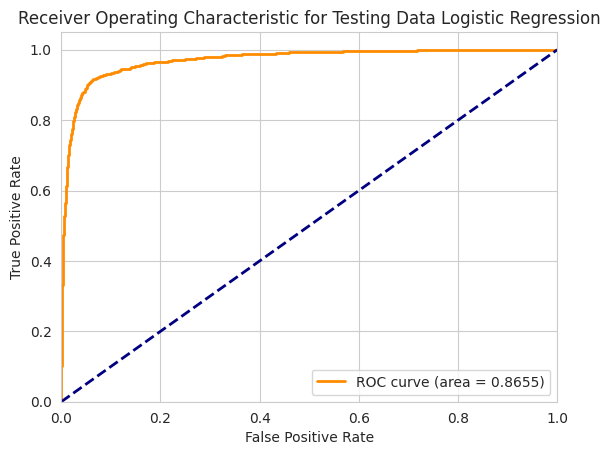

In [32]:
roc_auc = roc_auc_score(y_test, lr_predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Testing Data Logistic Regression')
plt.legend(loc='lower right')
plt.show()

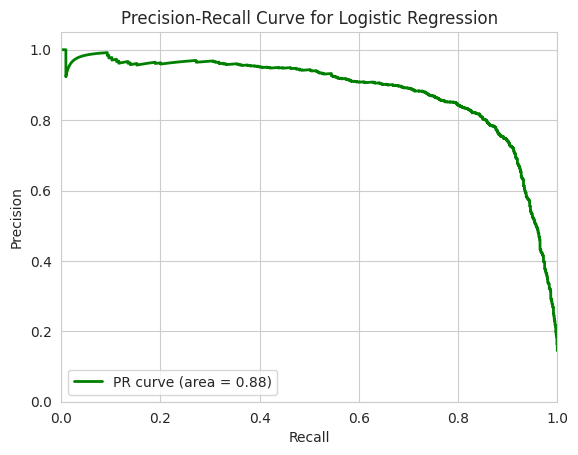

In [33]:
# Precision-Recall Curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, average_precision_score

y_score = lr_pipeline.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

plt.figure()
plt.plot(recall, precision, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc="lower left")
plt.show()

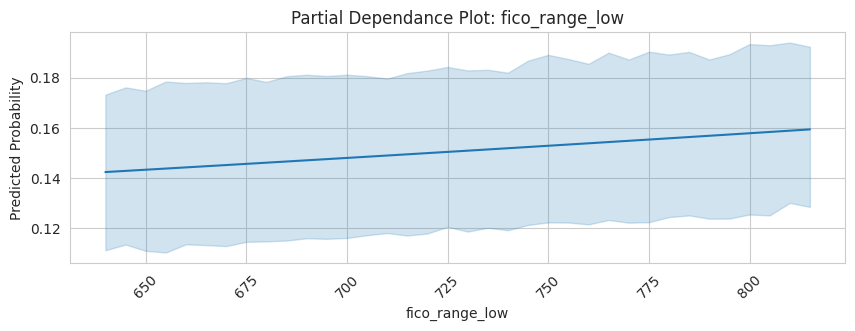

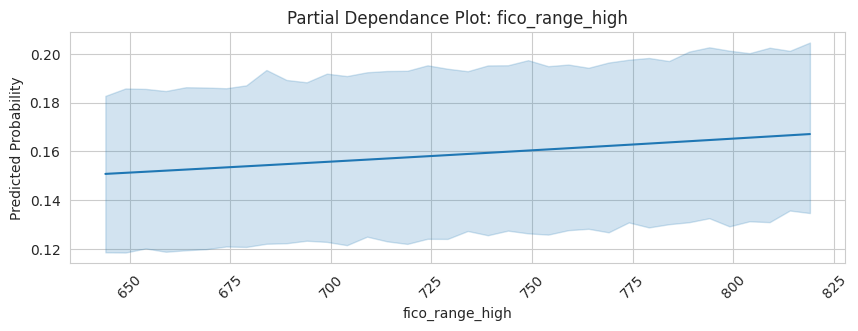

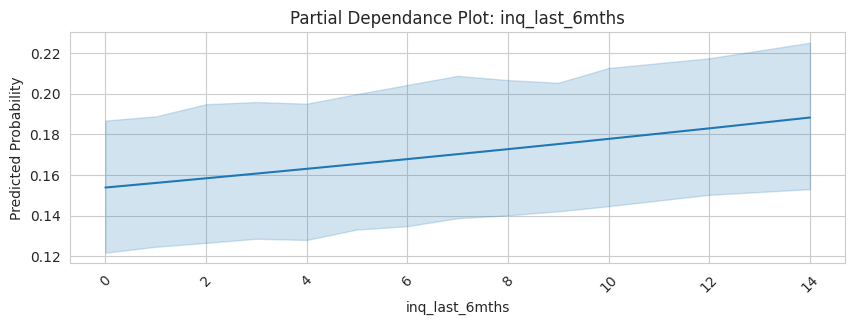

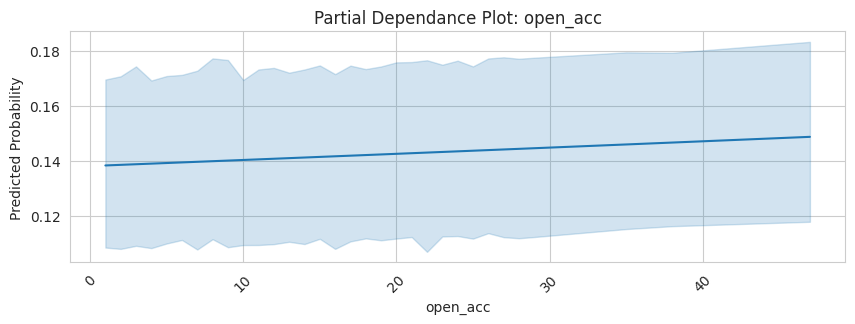

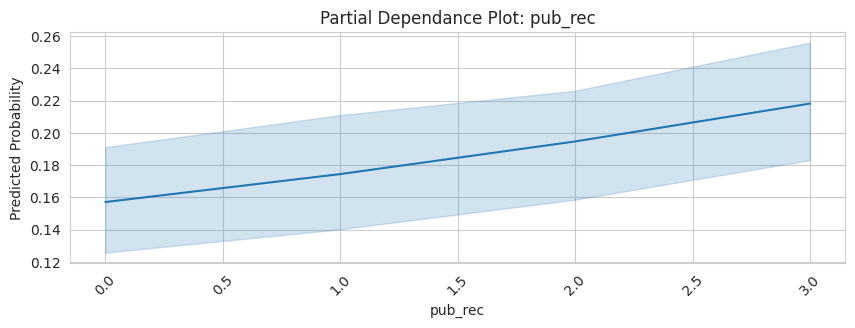

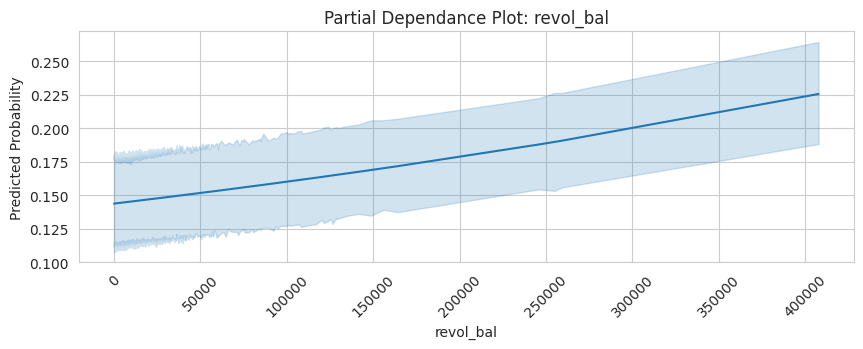

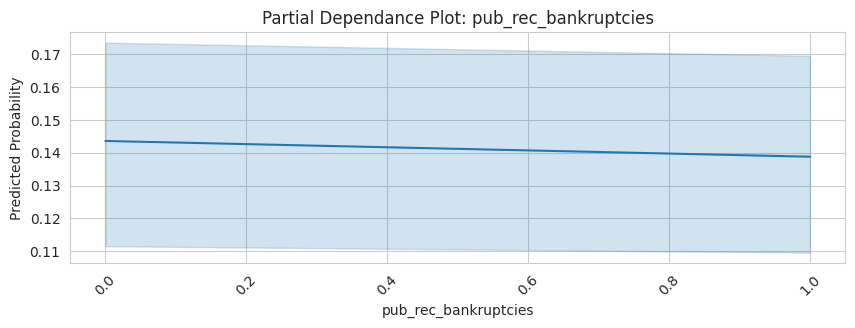

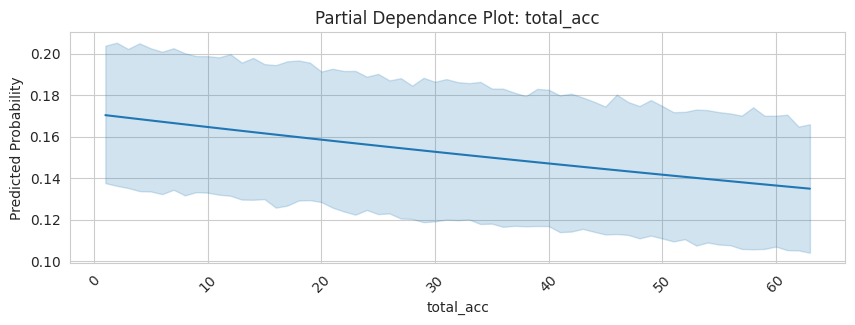

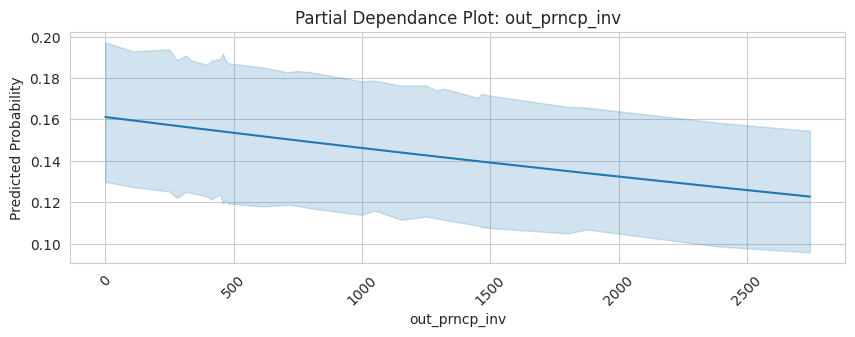

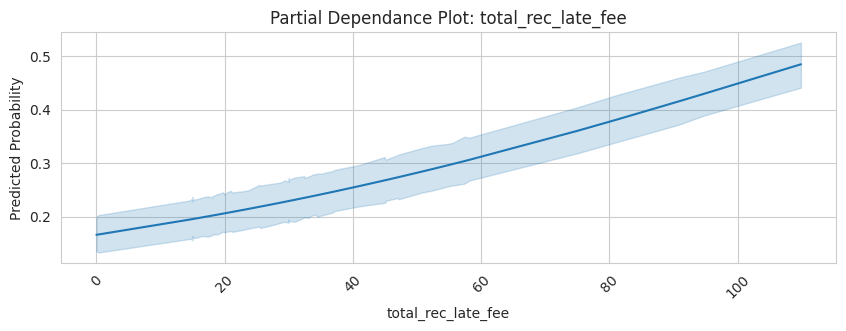

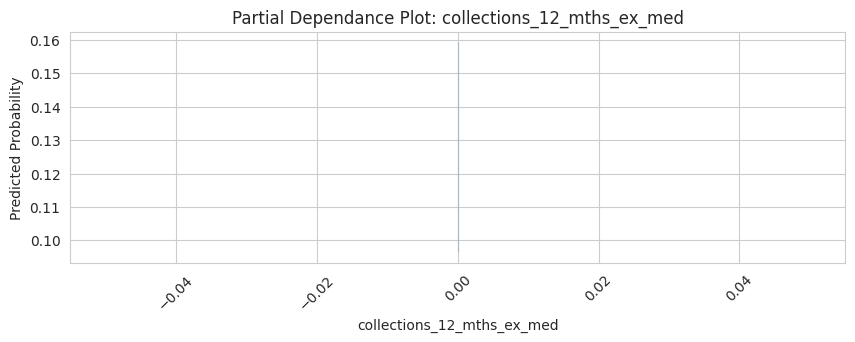

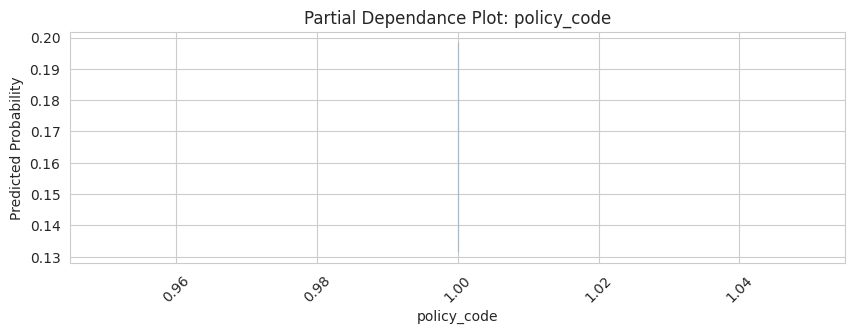

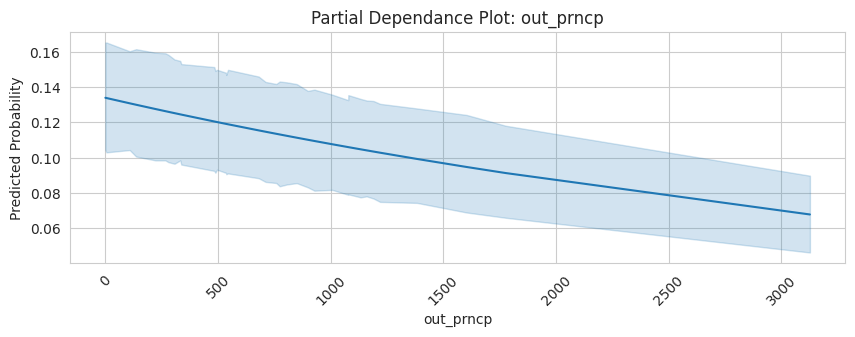

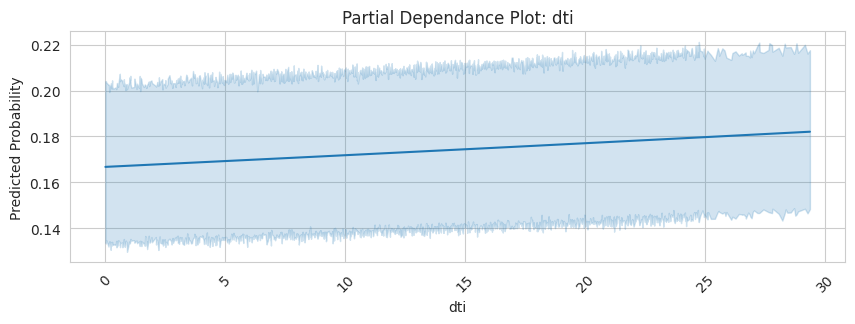

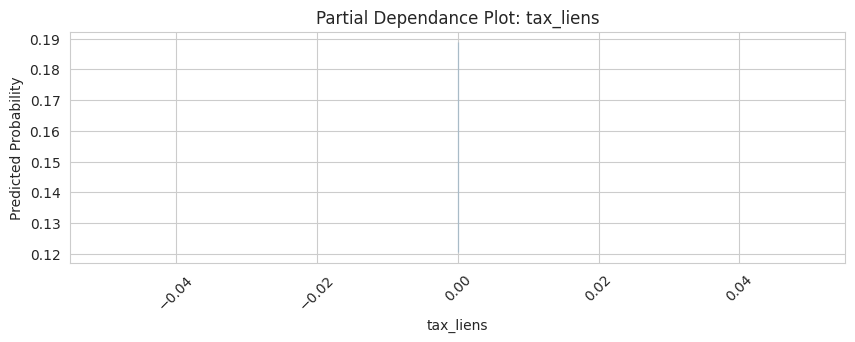

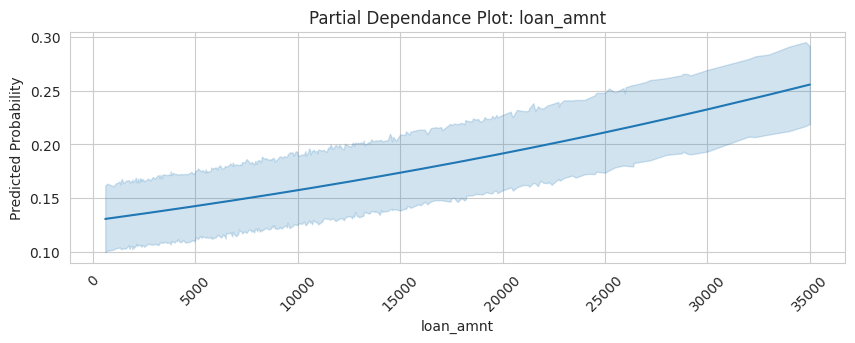

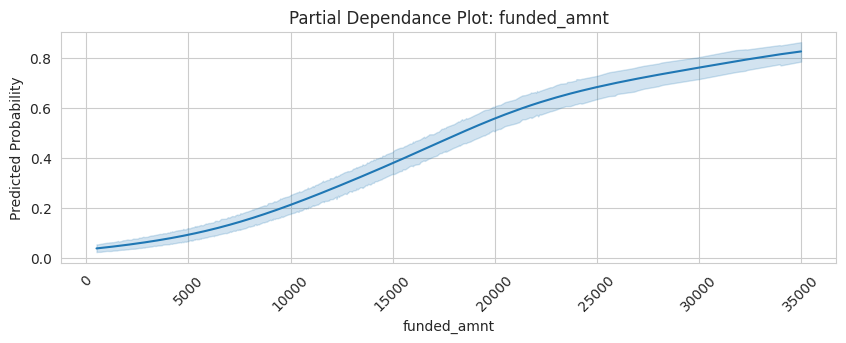

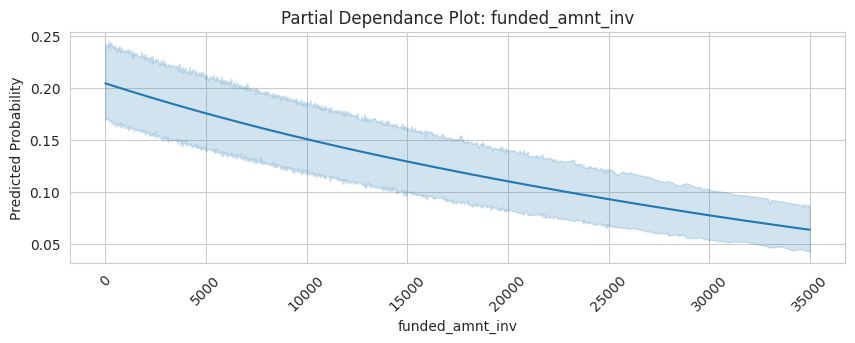

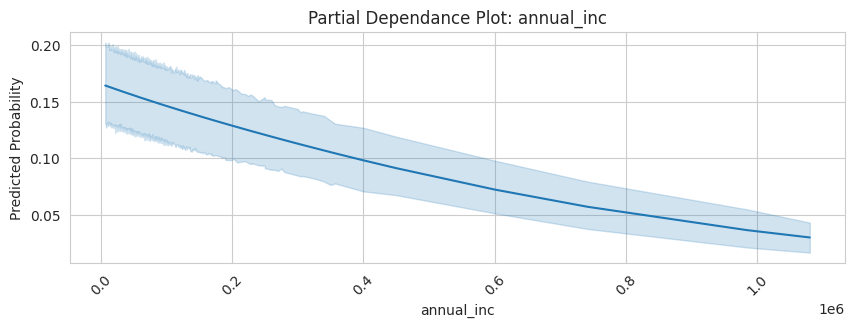

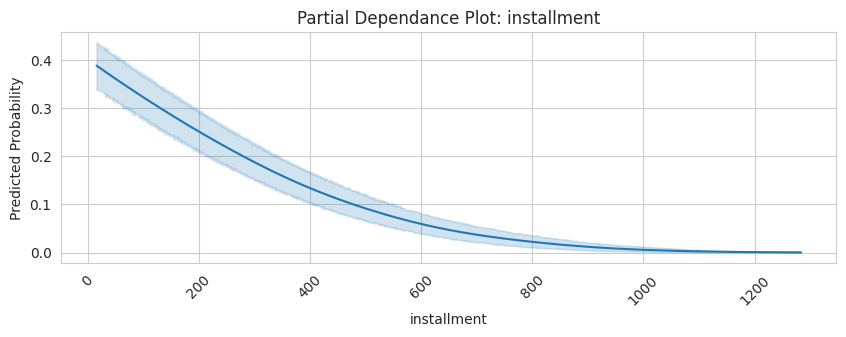

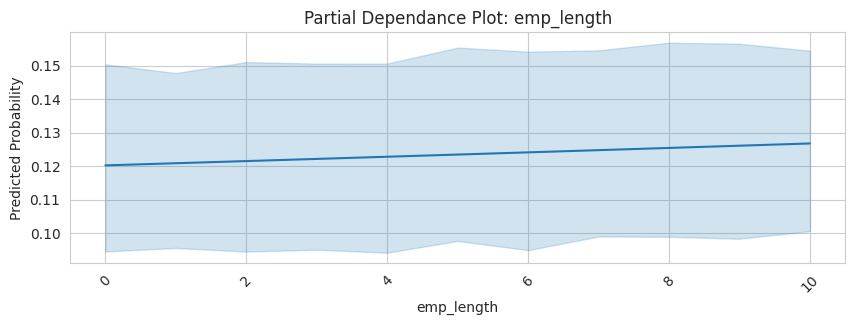

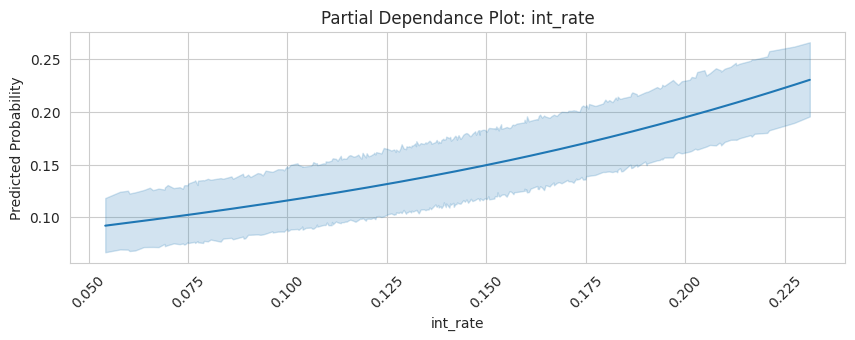

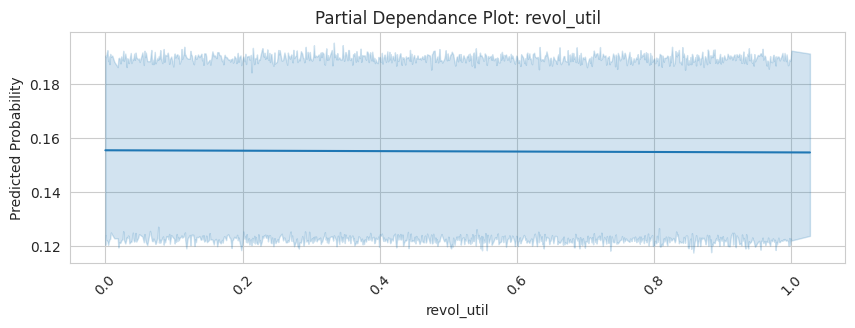

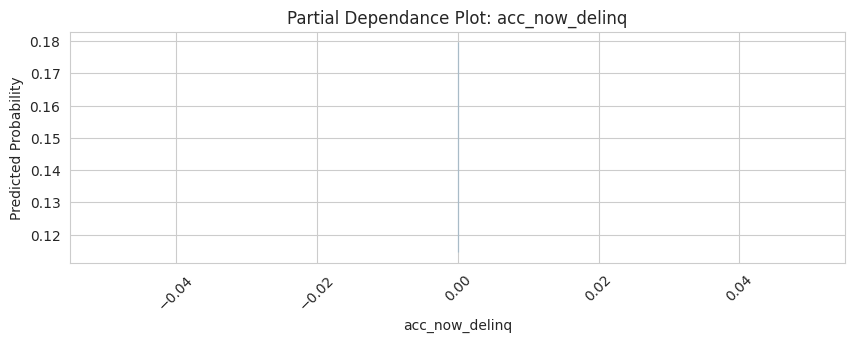

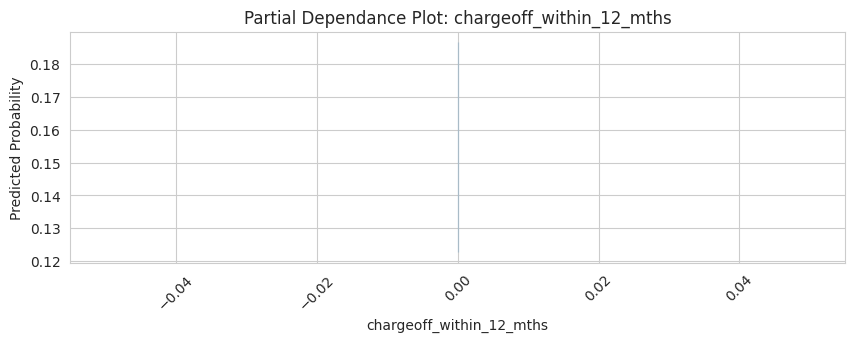

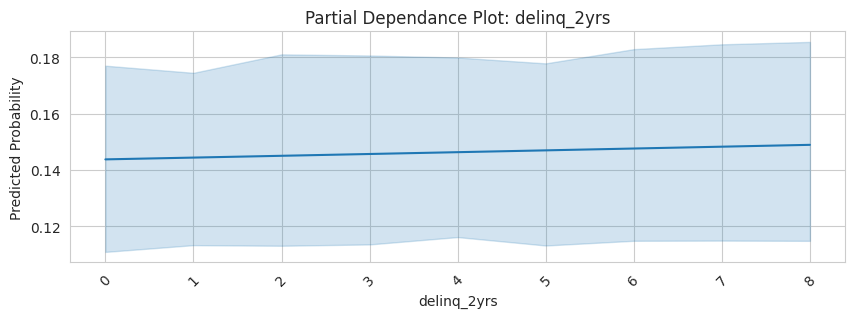

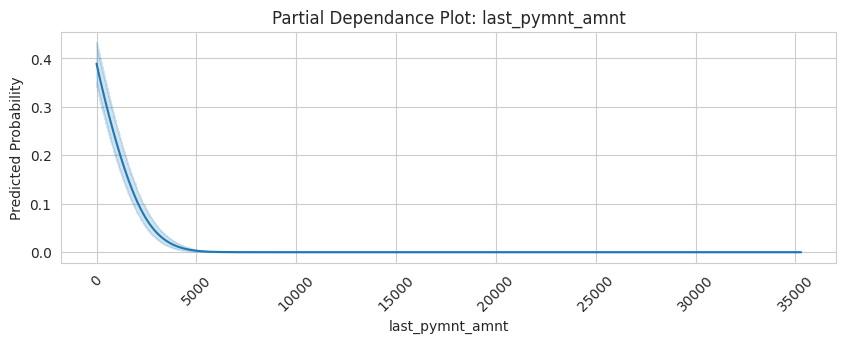

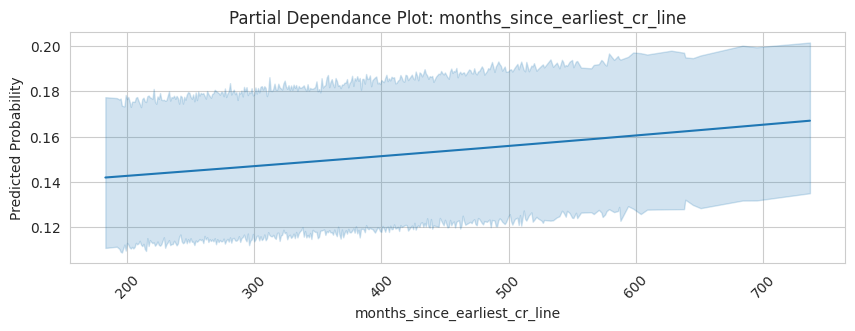

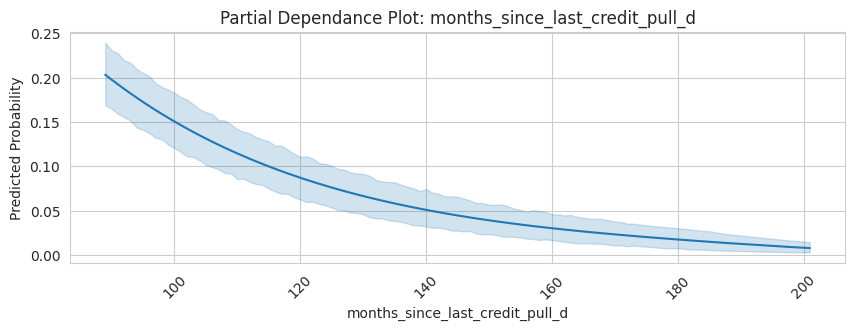

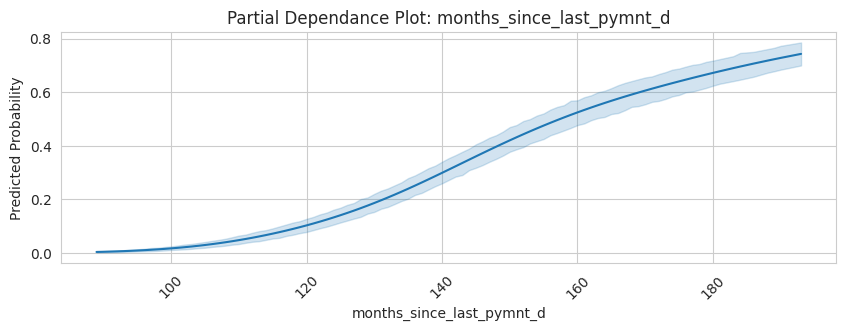

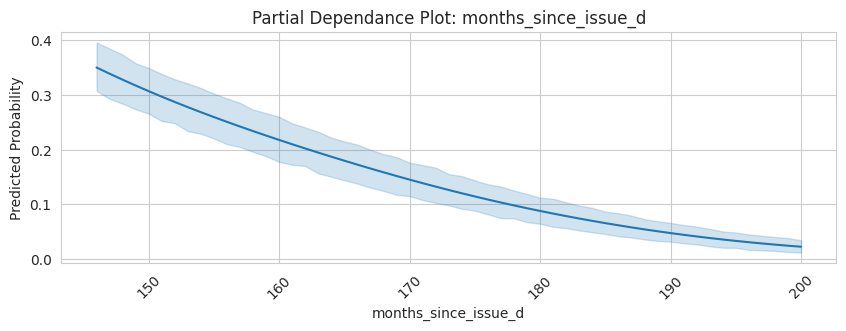

In [49]:
def pdp_plot_numeric(var, sample_n):
  # var = 'credit_amount'
  pdp_values = pd.DataFrame(X_train[var].sort_values().sample(frac=0.1).unique(),columns=[var])
  pdp_sample = X_train.sample(sample_n).drop(var, axis=1)

  pdp_cross = pdp_sample.merge(pdp_values, how='cross')
  pdp_cross['pred'] = lr_pipeline.predict_proba(pdp_cross)[:,1]
  plt.figure(figsize=(10, 3))
  sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
  plt.title(f"Partial Dependance Plot: {var}")
  plt.ylabel('Predicted Probability')
  plt.xticks(rotation=45)
  #plt.ylim(0, 1)
  plt.grid(True)
  plt.show()

# numeric_features = ['credit_amount', 'duration', 'age']
for var in numerical_cols:
  pdp_plot_numeric(var, sample_n=300)

# Next, let's train a random forest!

In [ ]:
# Define the Random Forest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=50, n_jobs = -1, random_state=223))])
# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
rf_predictions = rf_pipeline.predict(X_test)
rf_predictions_proba = rf_pipeline.predict_proba(X_test)[:,1]
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")

Random Forest Accuracy: 0.9458


In [ ]:
y_scores = rf_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Add Precision Column
precisions = []

for threshold in interp_thresholds:
  y_pred = (y_scores >= threshold).astype(int)
  precision = precision_score(y_test, y_pred)
  precisions.append(precision)

target_fpr_df['Precision'] = precisions

target_fpr_df

# Display the DataFrame
target_fpr_df

Target FPR (%)  Expected TPR  Threshold  Precision
0             1.0      0.683630   0.522271   0.930736
1             2.0      0.783937   0.441896   0.882458
2             3.0      0.837810   0.384231   0.838863
3             4.0      0.870582   0.344566   0.802166
4             5.0      0.893097   0.310750   0.762914
5             6.0      0.907869   0.283290   0.738520
6             7.0      0.916371   0.260332   0.715502
7             8.0      0.925099   0.241412   0.688553
8             9.0      0.931509   0.225118   0.659868
9            10.0      0.939497   0.210860   0.628973

In [ ]:
# Predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Print the metrics
print("Random Forest Model Evaluation:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")

Random Forest Model Evaluation:
  Accuracy: 0.9458
  AUC: 0.9757
  Precision: 0.9192
  Recall: 0.6860


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create the parameter grid
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': randint(1750, 2000),
    'classifier__min_samples_split': randint(25, 60)
}

# Instantiate the GridSearchCV object
#grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

random_search = RandomizedSearchCV(rf_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = random_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters:
  classifier__min_samples_split: 27
  classifier__n_estimators: 1996


In [ ]:
cv_results_df_rf = pd.DataFrame(random_search.cv_results_)
cv_results_df_rf

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     339.458861      2.873678        14.317091        1.216881   
1     348.848335      2.145693         9.903197        1.450221   
2     354.427739      3.020612         5.970317        2.015947   
3     360.226456      0.384533         2.734041        0.957906   
4     246.217167      4.892608        13.545475        2.602374   
5     257.372571      2.380499         6.644230        1.283171   
6     258.016692      2.259471         6.359733        0.655218   
7     248.441308      4.248963         8.848484        2.299834   
8     141.080521      0.801227         5.591211        0.117548   
9     153.601263      0.665749         2.358948        0.345827   

  param_classifier__min_samples_split param_classifier__n_estimators  \
0                                  46                           1795   
1                                  59                           1843   
2                                  52                           1855   
3                                  40                           1867   
4                                  39                           1905   
5                                  32                           1882   
6                                  35                           1882   
7                                  47                           1843   
8                                  36                           1750   
9                                  27                           1996   

                                              params  split0_test_score  \
0  {'classifier__min_samples_split': 46, 'classif...           0.966980   
1  {'classifier__min_samples_split': 59, 'classif...           0.966084   
2  {'classifier__min_samples_split': 52, 'classif...           0.966604   
3  {'classifier__min_samples_split': 40, 'classif...           0.967653   
4  {'classifier__min_samples_split': 39, 'classif...           0.967537   
5  {'classifier__min_samples_split': 32, 'classif...           0.967893   
6  {'classifier__min_samples_split': 35, 'classif...           0.968001   
7  {'classifier__min_samples_split': 47, 'classif...           0.967138   
8  {'classifier__min_samples_split': 36, 'classif...           0.968006   
9  {'classifier__min_samples_split': 27, 'classif...           0.968554   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.971588           0.976144         0.971570        0.003741   
1           0.970867           0.975256         0.970736        0.003746   
2           0.971136           0.975610         0.971117        0.003677   
3           0.972214           0.976654         0.972174        0.003675   
4           0.972341           0.976711         0.972196        0.003747   
5           0.972650           0.977101         0.972548        0.003760   
6           0.972576           0.976828         0.972468        0.003605   
7           0.972029           0.976065         0.971744        0.003650   
8           0.972376           0.977093         0.972491        0.003711   
9           0.973401           0.977734         0.973229        0.003750   

   rank_test_score  
0                8  
1               10  
2                9  
3                6  
4                5  
5                2  
6                4  
7                7  
8                3  
9                1

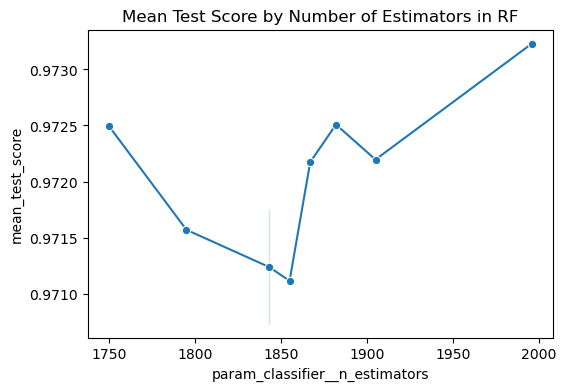

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot(
    data=cv_results_df_rf,
    x='param_classifier__n_estimators',
    y='mean_test_score',
    marker='o'
)
plt.title('Mean Test Score by Number of Estimators in RF')
plt.show()

In [ ]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
rf_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=1993,
                                                                    min_samples_split=26,
                                                                    n_jobs=-1,
                                                                    random_state=42))])
# Train the pipeline
rf_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'pub_rec_bankruptcies',
                                                   'total_acc', 'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'collections_12_mths_ex_med',
                                                   'policy_code', 'out...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'addr_state',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'sub_grade',
                                                   'application_type'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_split=26, n_estimators=1993,
                                        n_jobs=-1, random_state=42))])

In [ ]:
# compare rf_pipeline to rf_pipeline_hpo performance
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]
y_pred_rf_hpo = rf_pipeline_hpo.predict(X_test)
y_pred_proba_rf_hpo = rf_pipeline_hpo.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Random Forest Model Evaluation:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

print("\n -------- \n")
print("Random Forest Model Evaluation with HPO:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_rf_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_rf_hpo):.4f}")

Random Forest Model Evaluation:
  Accuracy: 0.9458
  AUC: 0.9757
  Precision: 0.9192
  Recall: 0.6860
  F1 Score: 0.7857

 -------- 

Random Forest Model Evaluation with HPO:
  Accuracy: 0.9434
  AUC: 0.9774
  Precision: 0.9200
  Recall: 0.6667
  F1 Score: 0.7731


Text(0.5, 1.0, 'Confusion Matrix for Tuned Random Forest Test Data')

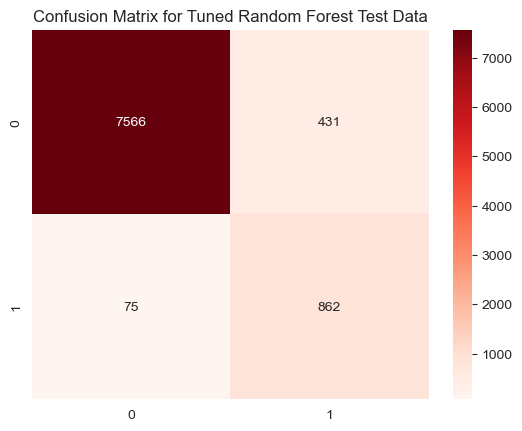

In [ ]:
conf_matrix = confusion_matrix(y_pred_rf_hpo, y_test)
sns.heatmap(conf_matrix, fmt='.5g', annot=True, cmap = "Reds")
plt.title("Confusion Matrix for Tuned Random Forest Test Data")

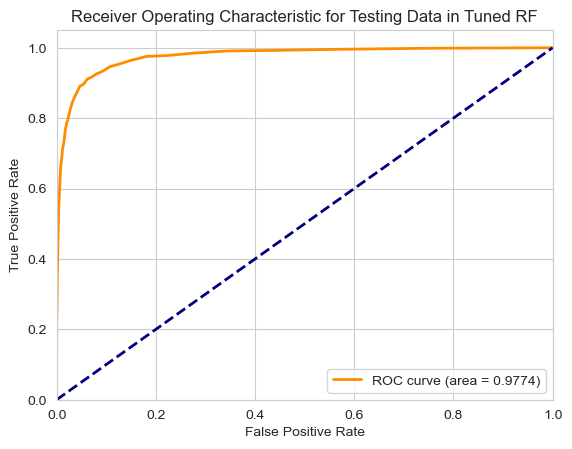

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba_rf_hpo)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Testing Data in Tuned RF')
plt.legend(loc='lower right')
plt.show()

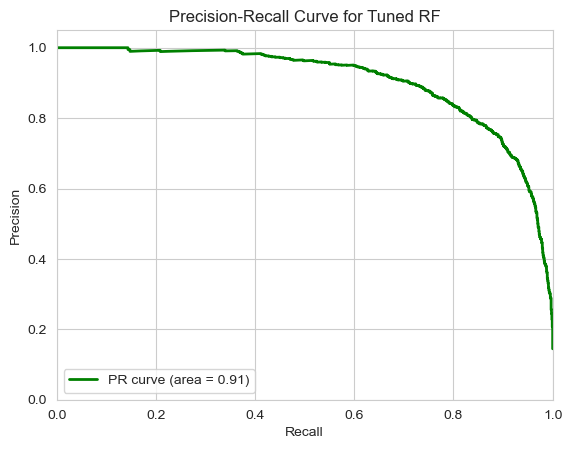

In [ ]:
# Precision-Recall Curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, average_precision_score

y_score = rf_pipeline_hpo.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

plt.figure()
plt.plot(recall, precision, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned RF')
plt.legend(loc="lower left")
plt.show()

In [ ]:
y_scores = rf_pipeline_hpo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Add Precision Column
precisions = []

for threshold in interp_thresholds:
  y_pred = (y_scores >= threshold).astype(int)
  precision = precision_score(y_test, y_pred)
  precisions.append(precision)

target_fpr_df['Precision'] = precisions

target_fpr_df

# Display the DataFrame
target_fpr_df

Target FPR (%)  Expected TPR  Threshold  Precision
0             1.0      0.669760   0.498493   0.919321
1             2.0      0.757927   0.429609   0.865724
2             3.0      0.813612   0.379294   0.821233
3             4.0      0.853828   0.338721   0.784648
4             5.0      0.890178   0.300361   0.752288
5             6.0      0.904099   0.274173   0.718942
6             7.0      0.918020   0.251295   0.690116
7             8.0      0.933488   0.230168   0.663916
8             9.0      0.941222   0.215994   0.639181
9            10.0      0.948183   0.199853   0.616080

In [ ]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

rf_importances = rf_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df.head(10)

Feature  Importance
28  months_since_last_credit_pull_d    0.257350
26                  last_pymnt_amnt    0.183829
29        months_since_last_pymnt_d    0.116320
21                         int_rate    0.037413
30             months_since_issue_d    0.035986
9                total_rec_late_fee    0.033134
18                       annual_inc    0.022884
17                  funded_amnt_inv    0.018550
19                      installment    0.016958
22                       revol_util    0.015782

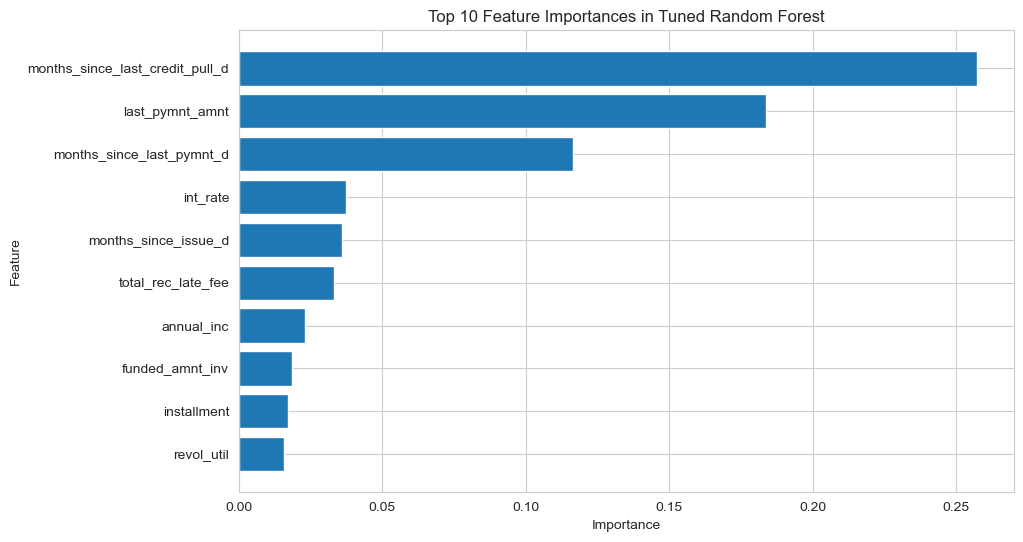

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Tuned Random Forest')
plt.barh(rf_feature_importance_df['Feature'][:10], rf_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

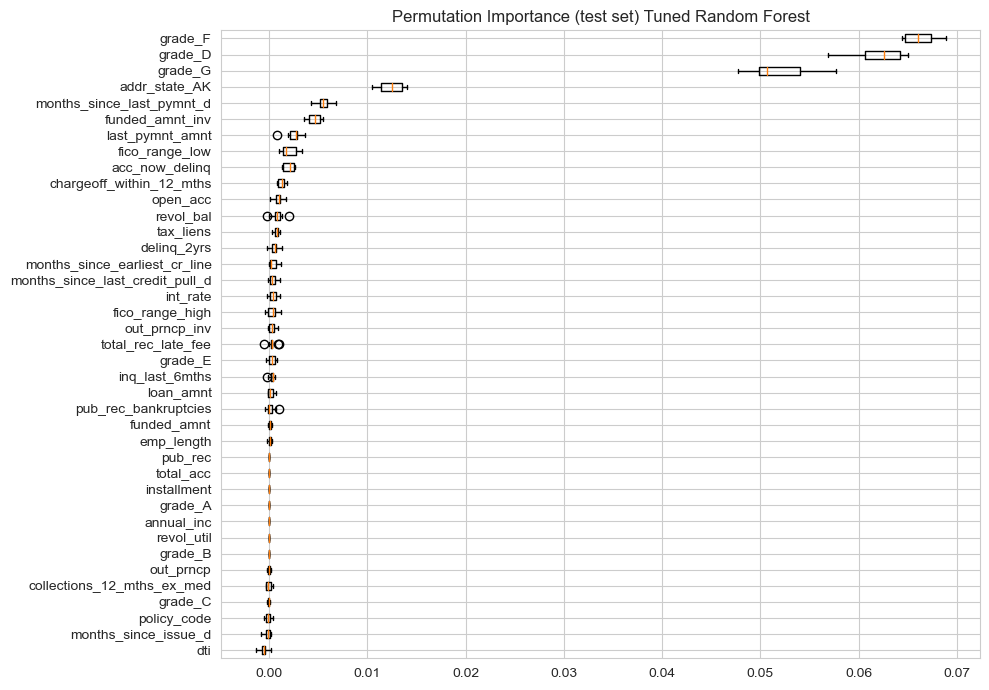

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(rf_pipeline_hpo, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Function to get feature names from column transformer
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []

    # Loop through each transformer in the column transformer
    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(pipe, 'get_feature_names_out'):
            # If the transformer has a get_feature_names_out method, use it
            if hasattr(pipe, 'categories_'):
                feature_names = pipe.get_feature_names_out(features)
            else:
                feature_names = pipe.get_feature_names_out()
        else:
            # Otherwise, use the provided feature names
            feature_names = features
        output_features.extend(feature_names)
    return output_features

# Extract feature names from the preprocessor
feature_names = get_feature_names(preprocessor)

# Now using feature_names with sorted_idx for labeling in the plot
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 7))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importance (test set) Tuned Random Forest")
plt.tight_layout()
plt.show()

# Initiate a GBM

In [ ]:
# Initialize the pipeline with the preprocessor and a Gradient Boosting classifier
gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(
                                                                        learning_rate=0.1, n_estimators=100,
                                                                    ))])
# Train the pipeline
gbm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'pub_rec_bankruptcies',
                                                   'total_acc', 'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'collections_12_mths_ex_med',
                                                   'policy_code', 'out...
                                                   'months_since_last_credit_pull_d',
                                                   'months_since_last_pymnt_d', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'addr_state',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'sub_grade',
                                                   'application_type'])])),
                ('classifier', GradientBoostingClassifier())])

In [ ]:
# Predictions
y_pred_gbm = gbm_pipeline.predict(X_test)
y_pred_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_gbm)
auc_rf = roc_auc_score(y_test, y_pred_proba_gbm)
precision_rf = precision_score(y_test, y_pred_gbm)
recall_rf = recall_score(y_test, y_pred_gbm)

# Print the metrics
print("GB Model Evaluation:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")

GB Model Evaluation:
  Accuracy: 0.9672
  AUC: 0.9873
  Precision: 0.9371
  Recall: 0.8291


In [ ]:
from scipy.stats import uniform

# Create the parameter grid
param_grid = {
    'classifier__n_estimators': randint(400, 1000),
    'classifier__learning_rate': uniform(0.25, 0.5)
}

# Instantiate the GridSearchCV object
random_search = RandomizedSearchCV(gbm_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = random_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters:
  classifier__learning_rate: 0.2532196391712776
  classifier__n_estimators: 868


In [ ]:
cv_results_df_gb = pd.DataFrame(random_search.cv_results_)
cv_results_df_gb

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     160.001822      1.916413         0.449772        0.032169   
1     183.708799      5.438616         0.470627        0.033284   
2     152.737824      1.048951         0.303800        0.029506   
3     133.681142      0.790181         0.230476        0.007836   
4     162.677659      0.893885         0.316876        0.040317   
5     105.526026      0.363648         0.298289        0.010142   
6     168.517031      3.425942         0.344111        0.035863   
7     168.005247      0.551678         0.243462        0.003309   
8     126.968509      0.127967         0.237144        0.009207   
9     123.412689      2.004985         0.109826        0.012350   

  param_classifier__learning_rate param_classifier__n_estimators  \
0                         0.25322                            868   
1                        0.303027                            970   
2                        0.722106                            898   
3                        0.539204                            716   
4                        0.451424                            706   
5                        0.673888                            445   
6                        0.521961                            693   
7                        0.595113                            694   
8                        0.547583                            589   
9                        0.365533                            772   

                                              params  split0_test_score  \
0  {'classifier__learning_rate': 0.25321963917127...           0.987761   
1  {'classifier__learning_rate': 0.30302740608695...           0.987521   
2  {'classifier__learning_rate': 0.72210580106876...           0.980547   
3  {'classifier__learning_rate': 0.53920414970041...           0.986862   
4  {'classifier__learning_rate': 0.45142409137060...           0.987632   
5  {'classifier__learning_rate': 0.67388753933367...           0.984834   
6  {'classifier__learning_rate': 0.52196111061821...           0.987157   
7  {'classifier__learning_rate': 0.59511305479045...           0.980909   
8  {'classifier__learning_rate': 0.54758281147158...           0.982478   
9  {'classifier__learning_rate': 0.36553306468946...           0.986092   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.990670           0.991301         0.989911        0.001542   
1           0.990572           0.983765         0.987286        0.002784   
2           0.979254           0.984851         0.981551        0.002392   
3           0.989350           0.989148         0.988453        0.001128   
4           0.989678           0.986205         0.987838        0.001425   
5           0.982086           0.979304         0.982074        0.002258   
6           0.988304           0.983366         0.986276        0.002110   
7           0.988831           0.989011         0.986251        0.003778   
8           0.986473           0.989712         0.986221        0.002959   
9           0.990105           0.983286         0.986494        0.002798   

   rank_test_score  
0                1  
1                4  
2               10  
3                2  
4                3  
5                9  
6                6  
7                7  
8                8  
9                5

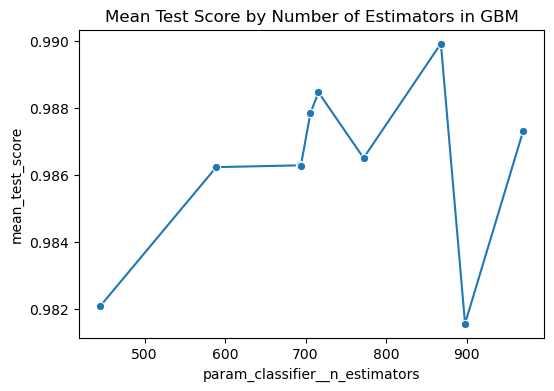

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot(
    data=cv_results_df_gb,
    x='param_classifier__n_estimators',
    y='mean_test_score',
    marker='o'
)
plt.title('Mean Test Score by Number of Estimators in GBM')
plt.show()

In [ ]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
gbm_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(n_estimators=737,
                                                                    learning_rate=0.42086494328711815,
                                                                    ))])
# Train the pipeline
gbm_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'pub_rec_bankruptcies',
                                                   'total_acc', 'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'collections_12_mths_ex_med',
                                                   'policy_code', 'out...
                                                   'months_since_last_pymnt_d', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'addr_state',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'sub_grade',
                                                   'application_type'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.42086494328711815,
                                            n_estimators=737))])

In [ ]:
y_pred_gbm  = gbm_pipeline.predict(X_test)
y_pred_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]

y_pred_gbm_hpo  = gbm_pipeline_hpo.predict(X_test)
y_pred_proba_gbm_hpo = gbm_pipeline_hpo.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("GBM Baseline:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm):.3f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm):.3f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm):.3f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm):.3f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_gbm):.3f}")


print("\n -------- ")
print("GBM Optimized:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm_hpo):.3f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm_hpo):.3f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm_hpo):.3f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm_hpo):.3f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_gbm_hpo):.3f}")

GBM Baseline:
  Accuracy: 0.967
  AUC: 0.987
  Precision: 0.937
  Recall: 0.829
  F1 Score: 0.880

 -------- 
GBM Optimized:
  Accuracy: 0.977
  AUC: 0.991
  Precision: 0.942
  Recall: 0.897
  F1 Score: 0.919


In [ ]:
y_scores = gbm_pipeline_hpo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Add Precision Column
precisions = []

for threshold in interp_thresholds:
  y_pred = (y_scores >= threshold).astype(int)
  precision = precision_score(y_test, y_pred)
  precisions.append(precision)

target_fpr_df['Precision'] = precisions

target_fpr_df

Target FPR (%)  Expected TPR  Threshold  Precision
0             1.0      0.899459   0.464418   0.938660
1             2.0      0.941222   0.132943   0.888970
2             3.0      0.963650   0.055937   0.844746
3             4.0      0.972931   0.028761   0.804862
4             5.0      0.977572   0.018029   0.769793
5             6.0      0.979118   0.011469   0.733913
6             7.0      0.982212   0.008334   0.705948
7             8.0      0.982212   0.006428   0.683531
8             9.0      0.982212   0.004521   0.651951
9            10.0      0.982985   0.003101   0.626108

In [ ]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

gbm_importances = gbm_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
gbm_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gbm_importances})
gbm_feature_importance_df = gbm_feature_importance_df.sort_values(by='Importance', ascending=False)
gbm_feature_importance_df.head(10)

Feature  Importance
28  months_since_last_credit_pull_d    0.334255
26                  last_pymnt_amnt    0.291148
29        months_since_last_pymnt_d    0.211794
21                         int_rate    0.033503
30             months_since_issue_d    0.029547
9                total_rec_late_fee    0.023663
16                      funded_amnt    0.010530
19                      installment    0.008725
17                  funded_amnt_inv    0.006333
18                       annual_inc    0.004143

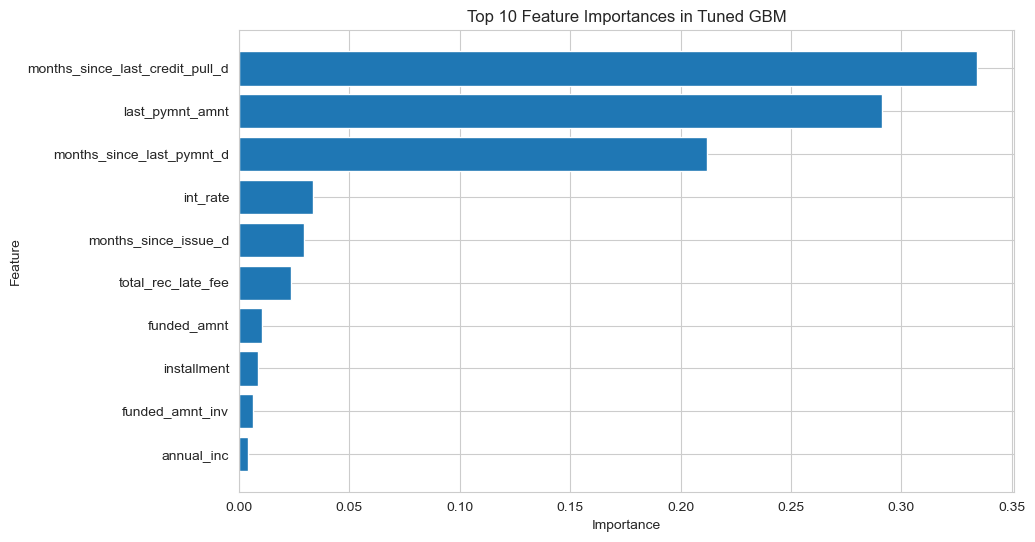

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Tuned GBM')
plt.barh(gbm_feature_importance_df['Feature'][:10], gbm_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Tuned GBM Test Data')

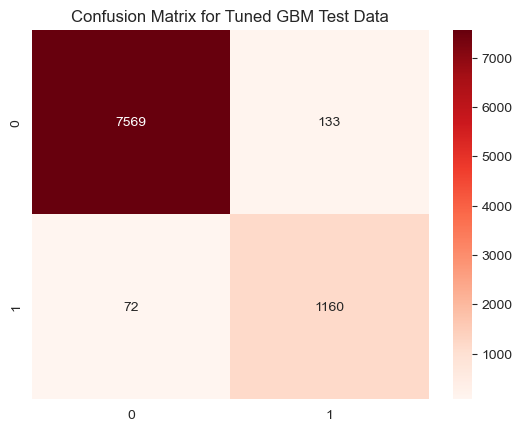

In [ ]:
conf_matrix = confusion_matrix(y_pred_gbm_hpo, y_test)
sns.heatmap(conf_matrix, fmt='.5g', annot=True, cmap = "Reds")
plt.title("Confusion Matrix for Tuned GBM Test Data")

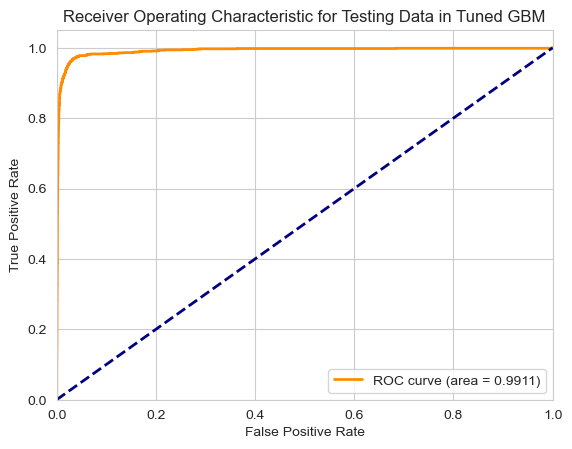

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba_gbm_hpo)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Testing Data in Tuned GBM')
plt.legend(loc='lower right')
plt.show()

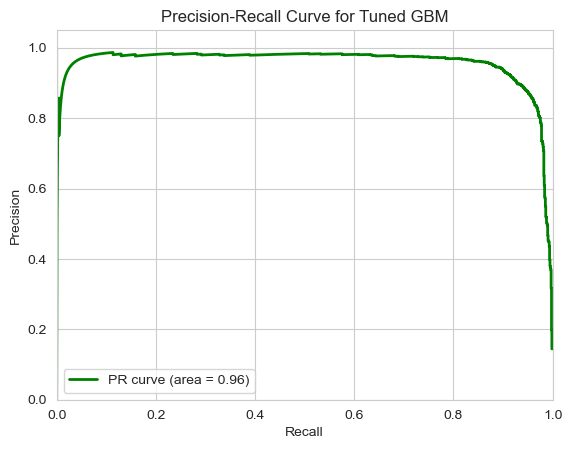

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, average_precision_score

y_score = gbm_pipeline_hpo.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

plt.figure()
plt.plot(recall, precision, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned GBM')
plt.legend(loc="lower left")
plt.show()

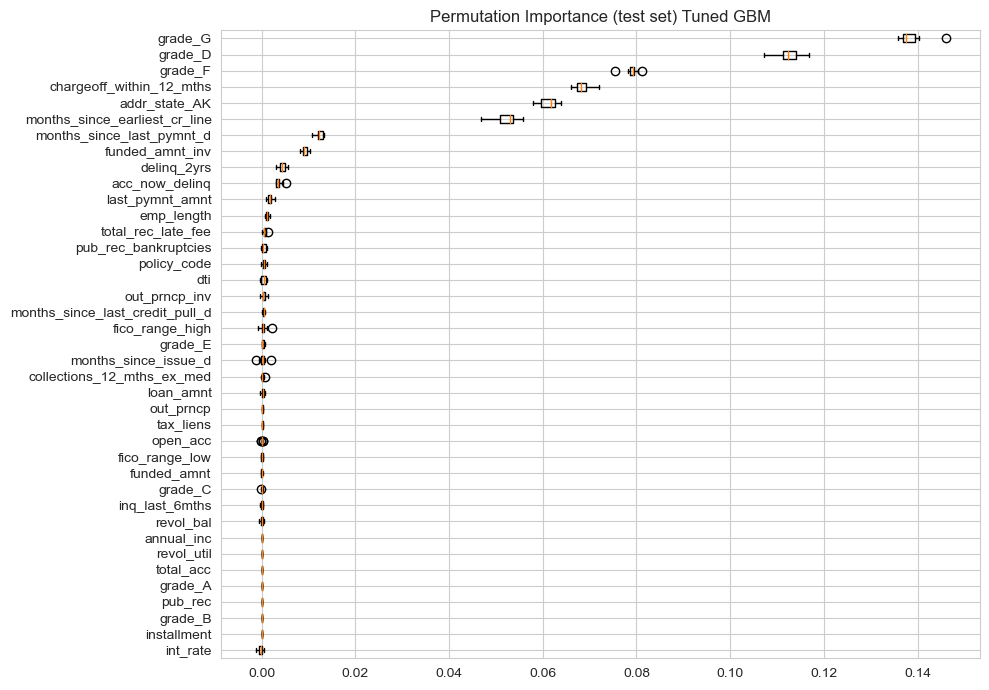

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(gbm_pipeline_hpo, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Function to get feature names from column transformer
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []

    # Loop through each transformer in the column transformer
    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(pipe, 'get_feature_names_out'):
            # If the transformer has a get_feature_names_out method, use it
            if hasattr(pipe, 'categories_'):
                feature_names = pipe.get_feature_names_out(features)
            else:
                feature_names = pipe.get_feature_names_out()
        else:
            # Otherwise, use the provided feature names
            feature_names = features
        output_features.extend(feature_names)
    return output_features

# Extract feature names from the preprocessor
feature_names = get_feature_names(preprocessor)

# Now using feature_names with sorted_idx for labeling in the plot
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 7))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importance (test set) Tuned GBM")
plt.tight_layout()
plt.show()

## Let's try an XGBoost Model

In [ ]:
from xgboost import XGBClassifier
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(
                                                           learning_rate=0.1,
                                                           n_estimators=100,
                                                           use_label_encoder=False,
                                                           eval_metric='logloss'
                                                        ))])

# Train the pipeline
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'pub_rec_bankruptcies',
                                                   'total_acc', 'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'collections_12_mths_ex_med',
                                                   'policy_code', 'out...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# Predictions
y_pred_xgboost = xgb_pipeline.predict(X_test)
y_pred_proba_xgboost = xgb_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_xgboost)
auc_rf = roc_auc_score(y_test, y_pred_proba_xgboost)
precision_rf = precision_score(y_test, y_pred_xgboost)
recall_rf = recall_score(y_test, y_pred_xgboost)

# Print the metrics
print("XGBoost Model Evaluation:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")

XGBoost Model Evaluation:
  Accuracy: 0.9760
  AUC: 0.9919
  Precision: 0.9492
  Recall: 0.8817


In [ ]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {
    'classifier__n_estimators': randint(400, 1000),
    'classifier__learning_rate': uniform(0.25, 0.5)
}

# Instantiate the GridSearchCV object
random_search = RandomizedSearchCV(xgb_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = random_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters:
  classifier__learning_rate: 0.42881124317643965
  classifier__n_estimators: 491


In [ ]:
cv_results_df_xg = pd.DataFrame(random_search.cv_results_)
cv_results_df_xg

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.264796      0.263186         0.979737        0.023108   
1       5.801690      0.812949         0.696907        0.047580   
2       5.157554      0.625318         0.552121        0.009144   
3       4.505970      0.227485         0.617677        0.056745   
4       6.064657      0.496315         0.703307        0.113527   
5       4.551921      0.104280         0.461441        0.016627   
6       6.484930      0.596825         0.781529        0.043089   
7       6.224612      0.156940         0.546314        0.075636   
8       7.967210      0.093320         0.579417        0.039042   
9       6.684102      0.155041         0.523062        0.040316   

  param_classifier__learning_rate param_classifier__n_estimators  \
0                        0.715731                            908   
1                        0.524209                            506   
2                        0.584866                            415   
3                        0.728541                            462   
4                        0.428811                            491   
5                        0.692623                            447   
6                        0.633169                            662   
7                        0.740839                            609   
8                        0.375959                            992   
9                        0.410573                            822   

                                              params  split0_test_score  \
0  {'classifier__learning_rate': 0.71573073271123...           0.986249   
1  {'classifier__learning_rate': 0.52420897304890...           0.986329   
2  {'classifier__learning_rate': 0.58486579232437...           0.986328   
3  {'classifier__learning_rate': 0.72854126195720...           0.986578   
4  {'classifier__learning_rate': 0.42881124317643...           0.988063   
5  {'classifier__learning_rate': 0.69262326519115...           0.985725   
6  {'classifier__learning_rate': 0.63316916694588...           0.986358   
7  {'classifier__learning_rate': 0.74083897002210...           0.986849   
8  {'classifier__learning_rate': 0.37595899359805...           0.987801   
9  {'classifier__learning_rate': 0.41057267914902...           0.987135   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.988313           0.989572         0.988044        0.001370   
1           0.989268           0.989721         0.988439        0.001504   
2           0.989392           0.990442         0.988721        0.001745   
3           0.988866           0.989380         0.988274        0.001218   
4           0.990198           0.990949         0.989737        0.001222   
5           0.988351           0.989893         0.987990        0.001721   
6           0.987808           0.990515         0.988227        0.001723   
7           0.987500           0.989877         0.988075        0.001302   
8           0.990121           0.990932         0.989618        0.001326   
9           0.989728           0.990503         0.989122        0.001440   

   rank_test_score  
0                9  
1                5  
2                4  
3                6  
4                1  
5               10  
6                7  
7                8  
8                2  
9                3

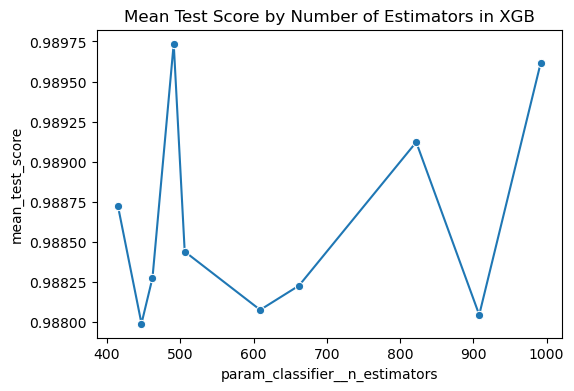

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot(
    data=cv_results_df_xg,
    x='param_classifier__n_estimators',
    y='mean_test_score',
    #hue='param_classifier__learning_rate',
    marker='o'
)
plt.title('Mean Test Score by Number of Estimators in XGB')
plt.show()

In [ ]:
xgb_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(
                                                           learning_rate=0.42881124317643965,
                                                           n_estimators=491,
                                                           use_label_encoder=False,
                                                           eval_metric='logloss'
                                                        ))])

# Train the pipeline
xgb_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'pub_rec_bankruptcies',
                                                   'total_acc', 'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'collections_12_mths_ex_med',
                                                   'policy_code', 'out...
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.42881124317643965, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=491,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [ ]:
y_pred_xgb = xgb_pipeline.predict(X_test)
y_pred_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

y_pred_xgb_hpo = xgb_pipeline_hpo.predict(X_test)
y_pred_proba_xgb_hpo = xgb_pipeline_hpo.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("XGB Baseline:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.5f}")
print(f"  Precision: {precision_score(y_test, y_pred_xgb):.3f}")
print(f"  Recall: {recall_score(y_test, y_pred_xgb):.3f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_xgb):.3f}")


print("\n -------- ")
print("XGB Optimized:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_xgb_hpo):.3f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_xgb_hpo):.5f}")
print(f"  Precision: {precision_score(y_test, y_pred_xgb_hpo):.3f}")
print(f"  Recall: {recall_score(y_test, y_pred_xgb_hpo):.3f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_xgb_hpo):.3f}")

XGB Baseline:
  Accuracy: 0.976
  AUC: 0.99193
  Precision: 0.949
  Recall: 0.882
  F1 Score: 0.914

 -------- 
XGB Optimized:
  Accuracy: 0.979
  AUC: 0.99389
  Precision: 0.948
  Recall: 0.903
  F1 Score: 0.925


In [ ]:
y_scores = xgb_pipeline_hpo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Add Precision Column
precisions = []

for threshold in interp_thresholds:
  y_pred = (y_scores >= threshold).astype(int)
  precision = precision_score(y_test, y_pred)
  precisions.append(precision)

target_fpr_df['Precision'] = precisions

target_fpr_df

Target FPR (%)  Expected TPR  Threshold  Precision
0             1.0      0.914927   0.405326   0.940382
1             2.0      0.947409   0.085116   0.891557
2             3.0      0.963650   0.031160   0.845319
3             4.0      0.970611   0.013943   0.806037
4             5.0      0.975251   0.007616   0.767032
5             6.0      0.979118   0.004647   0.734765
6             7.0      0.982212   0.003236   0.709101
7             8.0      0.984532   0.002216   0.676049
8             9.0      0.988399   0.001576   0.651044
9            10.0      0.989946   0.001142   0.626223

In [ ]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

xgb_importances = xgb_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
xgb_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importances})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)
xgb_feature_importance_df.head(10)

Feature  Importance
28   months_since_last_credit_pull_d    0.255161
29         months_since_last_pymnt_d    0.047043
26                   last_pymnt_amnt    0.046329
48                     addr_state_GA    0.044462
30              months_since_issue_d    0.029356
9                 total_rec_late_fee    0.028125
130                     sub_grade_D4    0.018624
124                     sub_grade_C3    0.017995
15                         loan_amnt    0.017952
6               pub_rec_bankruptcies    0.017426

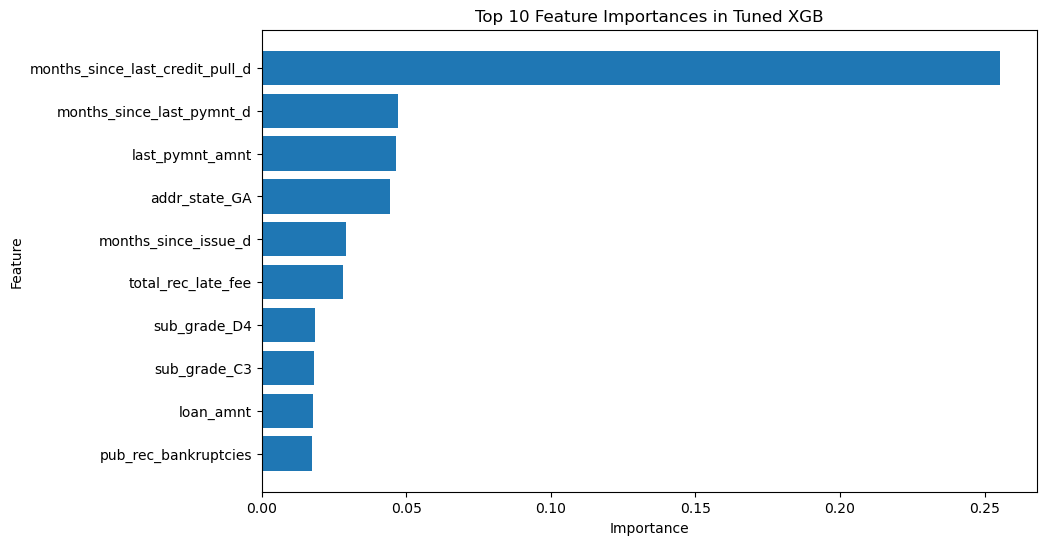

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Tuned XGB')
plt.barh(xgb_feature_importance_df['Feature'][:10], xgb_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Tuned GBM Test Data')

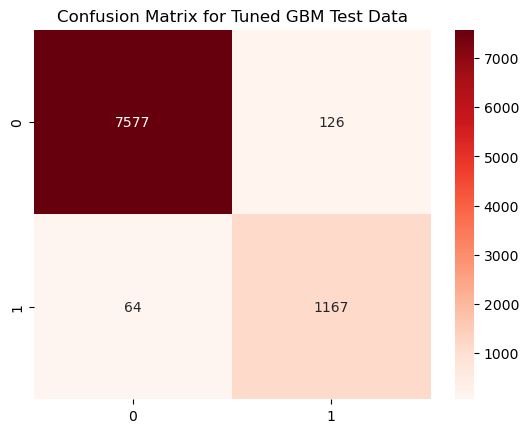

In [ ]:
conf_matrix = confusion_matrix(y_pred_xgb_hpo, y_test)
sns.heatmap(conf_matrix, fmt='.5g', annot=True, cmap = "Reds")
plt.title("Confusion Matrix for Tuned GBM Test Data")

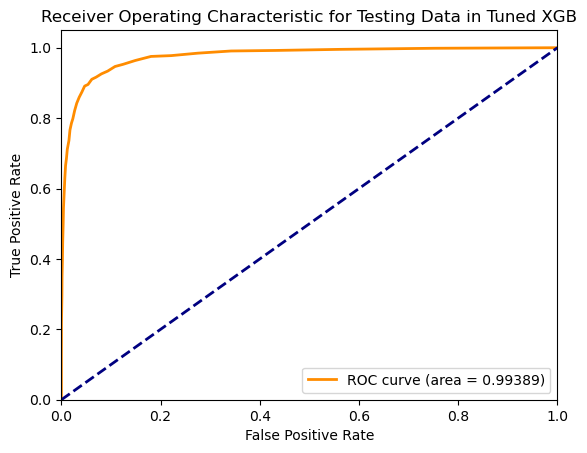

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb_hpo)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Testing Data in Tuned XGB')
plt.legend(loc='lower right')
plt.show()

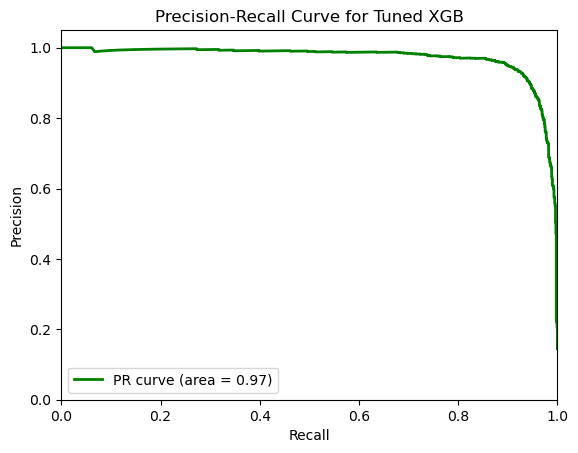

In [ ]:
# Precision-Recall Curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, average_precision_score

y_score = xgb_pipeline_hpo.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

plt.figure()
plt.plot(recall, precision, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned XGB')
plt.legend(loc="lower left")
plt.show()

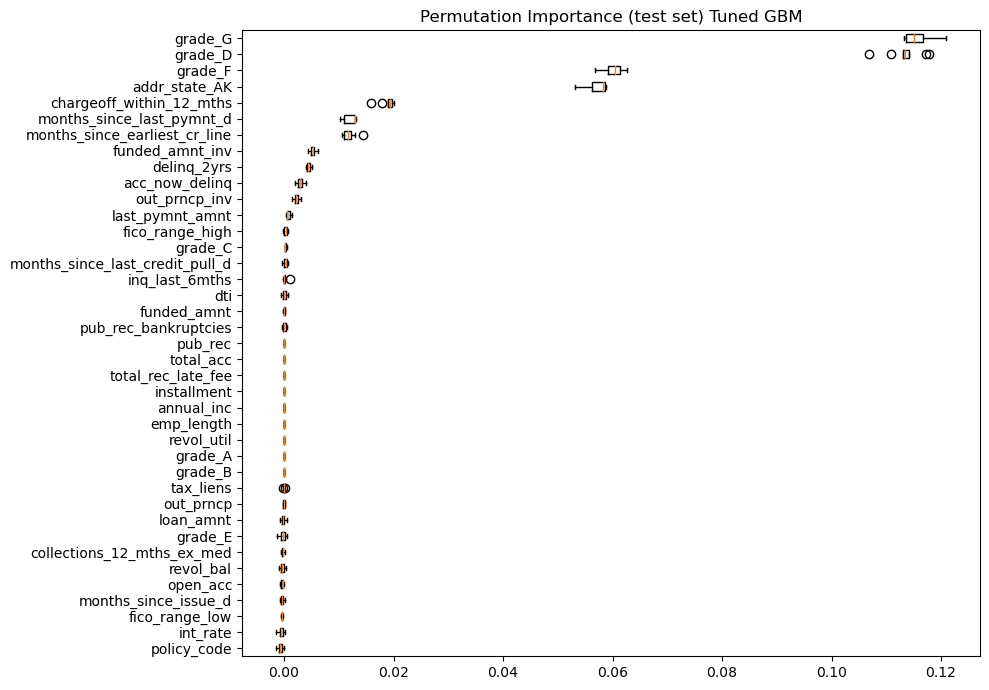

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(xgb_pipeline_hpo, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Function to get feature names from column transformer
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []

    # Loop through each transformer in the column transformer
    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(pipe, 'get_feature_names_out'):
            # If the transformer has a get_feature_names_out method, use it
            if hasattr(pipe, 'categories_'):
                feature_names = pipe.get_feature_names_out(features)
            else:
                feature_names = pipe.get_feature_names_out()
        else:
            # Otherwise, use the provided feature names
            feature_names = features
        output_features.extend(feature_names)
    return output_features

# Extract feature names from the preprocessor
feature_names = get_feature_names(preprocessor)

# Now using feature_names with sorted_idx for labeling in the plot
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 7))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importance (test set) Tuned GBM")
plt.tight_layout()
plt.show()

# Next, let's train a MLP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create the MLPRegressor pipeline
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPRegressor(hidden_layer_sizes=(20,10,), activation='relu', solver='adam', max_iter=500, random_state=42))
])


# Train the model
mlp_pipeline.fit(X_train, y_train)



# Predict and evaluate the model
y_pred = mlp_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model MSE: {mse:.2f}')
print(f'Model R2: {r2:.2f}')

Model MSE: 0.04
Model R2: 0.68


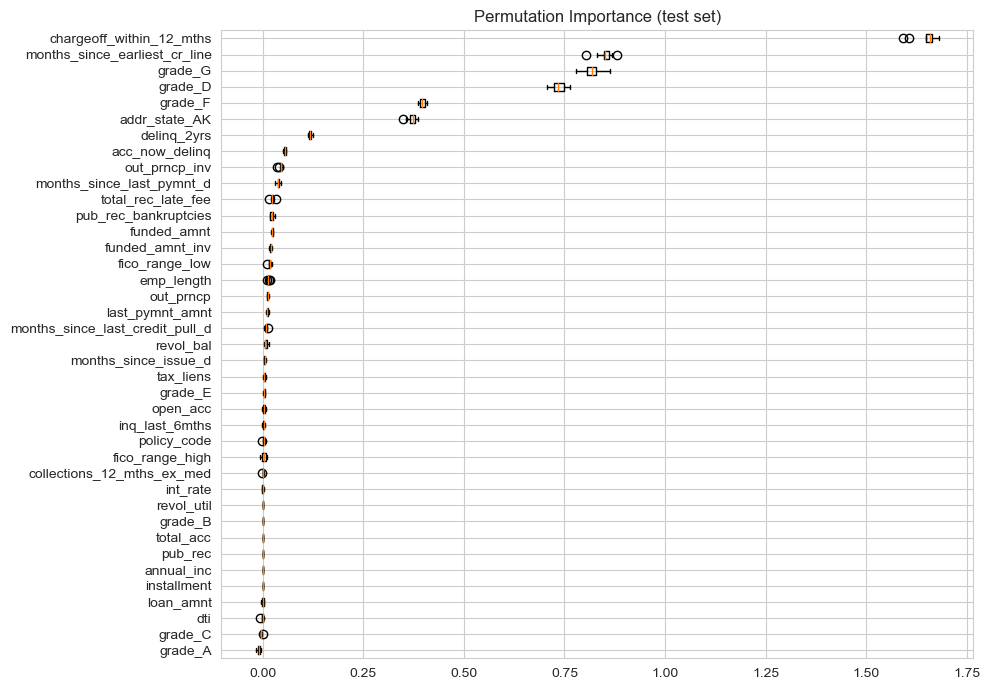

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(mlp_pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Function to get feature names from column transformer
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []

    # Loop through each transformer in the column transformer
    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(pipe, 'get_feature_names_out'):
            # If the transformer has a get_feature_names_out method, use it
            if hasattr(pipe, 'categories_'):
                feature_names = pipe.get_feature_names_out(features)
            else:
                feature_names = pipe.get_feature_names_out()
        else:
            # Otherwise, use the provided feature names
            feature_names = features
        output_features.extend(feature_names)
    return output_features

# Extract feature names from the preprocessor
feature_names = get_feature_names(preprocessor)

# Now using feature_names with sorted_idx for labeling in the plot
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 7))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.show()

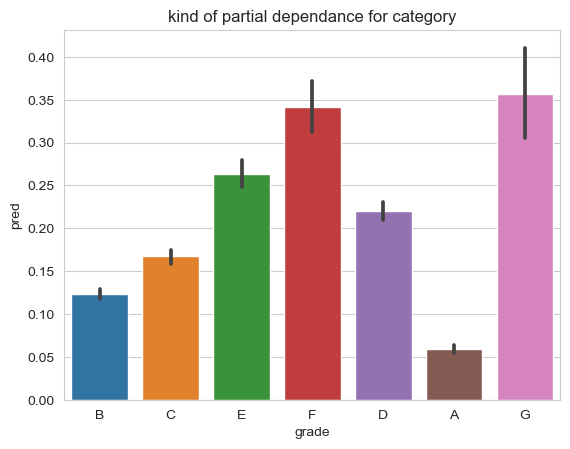

In [ ]:
X_s = df[numerical_cols + categorical_cols]
y_s = mlp_pipeline.predict(X)
Z = pd.concat([X_s, pd.Series(y_s, name='pred')], axis=1)

sns.barplot(data=Z,x=categorical_cols[0],y='pred')
plt.title("kind of partial dependance for category")
plt.show()

# Let's try a Keras Sequential Model!

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

# Assuming preprocessor is defined and X_train, y_train, X_test, y_test are already provided
X_train_nn = preprocessor.fit_transform(X_train).toarray()
X_test_nn = preprocessor.transform(X_test).toarray()

# Define a Sequential model
model = tf.keras.Sequential()

# Add a densely-connected layer with 64 units to the model:
model.add(layers.Dense(64, activation='relu'))

# Add another densely-connected layer with 16 units:
model.add(layers.Dense(32, activation='relu'))

# Add a sigmoid layer with 1 output unit:
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with named AUC metric
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[keras.metrics.AUC(name='auc')])  # Naming the AUC metric

# Define the ModelCheckpoint callback to save the best model based on validation AUC
checkpoint = ModelCheckpoint('best_model.h5',  # Path where to save the model
                             monitor='val_auc',  # Monitoring 'val_auc' (make sure this matches the named metric)
                             save_best_only=True,  # Only save a model if `val_auc` has improved
                             mode='max',  # 'max' means that a higher `val_auc` is better
                             verbose=1)  # Log when a new best model is saved

# Fit the model with the ModelCheckpoint callback
history = model.fit(X_train_nn, y_train,
                    epochs=61,
                    batch_size=32,
                    validation_data=(X_test_nn, y_test),
                    callbacks=[checkpoint])  # Include the callback here


Epoch 1/61
604/652 [==========================>...] - ETA: 0s - loss: 0.2242 - auc: 0.9272
Epoch 1: val_auc improved from -inf to 0.96604, saving model to best_model.h5
652/652 [==============================] - 1s 2ms/step - loss: 0.2207 - auc: 0.9291 - val_loss: 0.1527 - val_auc: 0.9660
Epoch 2/61
616/652 [===========================>..] - ETA: 0s - loss: 0.1480 - auc: 0.9680
Epoch 2: val_auc improved from 0.96604 to 0.97303, saving model to best_model.h5
652/652 [==============================] - 1s 1ms/step - loss: 0.1469 - auc: 0.9685 - val_loss: 0.1366 - val_auc: 0.9730
Epoch 3/61
602/652 [==========================>...] - ETA: 0s - loss: 0.1324 - auc: 0.9745
Epoch 3: val_auc improved from 0.97303 to 0.97624, saving model to best_model.h5
652/652 [==============================] - 1s 1ms/step - loss: 0.1328 - auc: 0.9740 - val_loss: 0.1314 - val_auc: 0.9762
Epoch 4/61
652/652 [==============================] - ETA: 0s - loss: 0.1231 - auc: 0.9775
Epoch 4: val_auc did not improve 

## The Max Val_AUC is 0.97690, which is not as good as the Tuned GBM

# Let's Try AutoGluon

In [ ]:
# Split the dataset into train and test
train_data, test_data,  = train_test_split(training_df, test_size=0.3, random_state=223)
print(f"X_train: {train_data.shape}")
print(f"X_test: {test_data.shape}")

X_train: (20843, 56)
X_test: (8934, 56)


In [ ]:
time_limit = 5000        # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
metric = 'roc_auc'        # specify your evaluation metric here

# Columns to exclude
ignored_columns = ['issue_d', 'term', 'zip_code', 'delinq_amnt', 'id', 'mths_since_last_record',
                   'earliest_cr_line', 'mths_since_last_delinq', 'emp_title',
                   'last_pymnt_d', 'title', 'last_credit_pull_d', 'member_id', 'next_pymnt_d', 'url', 'desc']
train_data.drop(columns=ignored_columns, inplace=True)
test_data.drop(columns=ignored_columns, inplace=True)

# Initialize the TabularPredictor object.
glu_model = TabularPredictor(label='loan_status',
                             problem_type='binary',
                             eval_metric=metric)


# Fit the model.
"""
presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
"""
glu_model = glu_model.fit(train_data,
                          time_limit=time_limit,
                          presets='medium_quality', # switch to one of the above presets.
                          )

No path specified. Models will be saved in: "AutogluonModels\ag-20240301_022215"
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 5000s
AutoGluon will save models to "AutogluonModels\ag-20240301_022215"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.11.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          12
Memory Avail:       5.46 GB / 15.68 GB (34.8%)
Disk Space Avail:   332.67 GB / 474.72 GB (70.1%)
Train Data Rows:    20843
Train Data Columns: 39
Label Column:       loan_status
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = default, class 0 = current
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (default) vs negative (current) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in

[1000]	valid_set's binary_logloss: 0.0779077


	0.992	 = Validation score   (roc_auc)
	3.1s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 4995.89s of the 4995.88s of remaining time.
	0.992	 = Validation score   (roc_auc)
	1.85s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 4993.93s of the 4993.93s of remaining time.
	0.9864	 = Validation score   (roc_auc)
	4.28s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: RandomForestEntr ... Training model for up to 4989.32s of the 4989.31s of remaining time.
	0.9873	 = Validation score   (roc_auc)
	4.55s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 4984.42s of the 4984.41s of remaining time.
		
Fitting model: ExtraTreesGini ... Training model for up to 4983.96s of the 4983.96s of remaining time.
	0.9747	 = Validation score   (roc_auc)
	1.95s	 = Training   runtime
	0.19s	 = Validation runtime
Fit

In [ ]:
glu_model.evaluate(test_data)

{'roc_auc': 0.9928234471644354,
 'accuracy': 0.9757107678531453,
 'balanced_accuracy': 0.9350410275983969,
 'mcc': 0.8996258588119989,
 'f1': 0.9127462806594291,
 'precision': 0.9505862646566164,
 'recall': 0.8778035576179428}

In [ ]:
glu_model.leaderboard(test_data, extra_metrics=['accuracy', 'balanced_accuracy', 'log_loss'])

model  score_test  accuracy  balanced_accuracy  log_loss  \
0               XGBoost    0.993946  0.977166           0.941032 -0.064182   
1              LightGBM    0.993478  0.977390           0.940841 -0.067462   
2   WeightedEnsemble_L2    0.992823  0.975711           0.935041 -0.076720   
3         LightGBMLarge    0.992006  0.974815           0.935803 -0.074403   
4            LightGBMXT    0.991207  0.971233           0.923107 -0.080429   
5      RandomForestEntr    0.985676  0.961160           0.892481 -0.128457   
6       NeuralNetFastAI    0.984812  0.963958           0.912428 -0.104801   
7      RandomForestGini    0.984205  0.960712           0.891898 -0.134621   
8        NeuralNetTorch    0.981564  0.955003           0.926148 -0.138422   
9        ExtraTreesEntr    0.970828  0.933736           0.787459 -0.195291   
10       ExtraTreesGini    0.967977  0.930714           0.772842 -0.204231   
11       KNeighborsDist    0.659161  0.824827           0.542277 -1.669670   
12       KNeighborsUnif    0.655313  0.831430           0.537143 -1.664547   

    score_val eval_metric  pred_time_test  pred_time_val    fit_time  \
0    0.992545     roc_auc        0.094125       0.031249    2.956087   
1    0.991998     roc_auc        0.094189       0.037534    1.851196   
2    0.994213     roc_auc        1.307882       0.416369  135.028939   
3    0.990771     roc_auc        0.078542       0.015627    3.433004   
4    0.991966     roc_auc        0.145450       0.047519    3.102996   
5    0.987310     roc_auc        0.334224       0.153292    4.548443   
6    0.986847     roc_auc        0.282623       0.078165   58.522679   
7    0.986355     roc_auc        0.313885       0.134025    4.278594   
8    0.983833     roc_auc        0.156652       0.033325   62.597227   
9    0.977780     roc_auc        0.456302       0.172950    1.959003   
10   0.974660     roc_auc        0.502334       0.193563    1.952857   
11   0.657255     roc_auc        0.102547       0.049411    0.034034   
12   0.652569     roc_auc        0.071937       0.034631    0.037836   

    pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  \
0                  0.094125                0.031249           2.956087   
1                  0.094189                0.037534           1.851196   
2                  0.000000                0.000000           0.606745   
3                  0.078542                0.015627           3.433004   
4                  0.145450                0.047519           3.102996   
5                  0.334224                0.153292           4.548443   
6                  0.282623                0.078165          58.522679   
7                  0.313885                0.134025           4.278594   
8                  0.156652                0.033325          62.597227   
9                  0.456302                0.172950           1.959003   
10                 0.502334                0.193563           1.952857   
11                 0.102547                0.049411           0.034034   
12                 0.071937                0.034631           0.037836   

    stack_level  can_infer  fit_order  
0             1       True         10  
1             1       True          4  
2             2       True         13  
3             1       True         12  
4             1       True          3  
5             1       True          6  
6             1       True          9  
7             1       True          5  
8             1       True         11  
9             1       True          8  
10            1       True          7  
11            1       True          2  
12            1       True          1

In [ ]:
all_models = glu_model.model_names()
model_to_use = all_models[-1]
specific_model = glu_model._trainer.load_model(model_to_use)

# Objects defined below are dicts of various information (not printed here as they are quite large):
model_info = specific_model.get_info()
predictor_information = glu_model.info()

In [ ]:
print("AutoGluon infers problem type is: ", glu_model.problem_type)
print("AutoGluon identified the following types of features:")
print(glu_model.feature_metadata)

AutoGluon infers problem type is:  binary
AutoGluon identified the following types of features:
('category', [])  :  7 | ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', ...]
('float', [])     : 27 | ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', ...]
('int', ['bool']) :  3 | ['collections_12_mths_ex_med', 'policy_code', 'tax_liens']


In [ ]:
# To transform the data into AutoGluon’s internal representation, we can do the following:
test_data_transform = glu_model.transform_features(test_data)
test_data_transform.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
5580    32400.0      32400.0     31256.670968    0.1299       737.04   
8974     3250.0       3250.0      3250.000000    0.1099       106.39   
7720    10625.0      10625.0     10625.000000    0.1479       367.23   
1554     2000.0       2000.0      2000.000000    0.1427        68.62   
7886    13075.0      13075.0     13075.000000    0.2211       361.94   

      emp_length  annual_inc    dti  delinq_2yrs  fico_range_low  ...  \
5580         5.0    150000.0   4.55          0.0           745.0  ...   
8974         4.0     39000.0   2.31          0.0           685.0  ...   
7720        10.0     34000.0  24.42          0.0           680.0  ...   
1554         1.0     27600.0   6.74          0.0           705.0  ...   
7886         0.0    300000.0   6.22          0.0           675.0  ...   

      months_since_last_credit_pull_d  months_since_last_pymnt_d  \
5580                            120.0                      121.0   
8974                            131.0                      143.0   
7720                            113.0                      113.0   
1554                            104.0                      109.0   
7886                            101.0                      101.0   

      months_since_issue_d  grade  sub_grade  home_ownership  \
5580                 148.0      3         11               1   
8974                 151.0      2          8               1   
7720                 150.0      3         14               5   
1554                 146.0      3         12               1   
7886                 150.0      7         31               5   

      verification_status  pymnt_plan  purpose  addr_state  
5580                    2           1        5           5  
8974                    1           1        1          35  
7720                    1           1        2           5  
1554                    2           1        3          11  
7886                    2           1        3           5  

[5 rows x 37 columns]

In [ ]:
glu_model.feature_importance(test_data)

These features in provided data are not utilized by the predictor and will be ignored: ['application_type', 'chargeoff_within_12_mths']
Computing feature importance via permutation shuffling for 37 features using 5000 rows with 5 shuffle sets...
	222.82s	= Expected runtime (44.56s per shuffle set)
	94.65s	= Actual runtime (Completed 5 of 5 shuffle sets)


importance        stddev       p_value  n  \
last_pymnt_amnt                  1.638208e-01  6.036109e-03  2.207736e-07  5   
months_since_last_pymnt_d        9.641487e-02  4.995343e-03  8.616156e-07  5   
months_since_last_credit_pull_d  5.723276e-02  2.835817e-03  7.209327e-07  5   
months_since_issue_d             3.125615e-02  3.093483e-03  1.136526e-05  5   
funded_amnt                      6.486620e-03  4.246789e-04  2.192159e-06  5   
installment                      5.665201e-03  3.046480e-04  9.996333e-07  5   
total_rec_late_fee               2.194445e-03  3.722893e-04  9.570167e-05  5   
int_rate                         2.161498e-03  7.160858e-04  1.256024e-03  5   
funded_amnt_inv                  1.763522e-03  1.969502e-04  1.836099e-05  5   
loan_amnt                        1.549149e-03  2.168178e-04  4.486727e-05  5   
fico_range_low                   5.444654e-04  1.647493e-04  8.940300e-04  5   
annual_inc                       4.670257e-04  1.847207e-04  2.411669e-03  5   
months_since_earliest_cr_line    1.685113e-04  3.714038e-05  2.657249e-04  5   
out_prncp                        1.623670e-04  9.346468e-05  8.886635e-03  5   
fico_range_high                  1.597083e-04  7.287332e-05  4.020432e-03  5   
revol_util                       1.528830e-04  1.529194e-04  4.453094e-02  5   
purpose                          1.508219e-04  2.648211e-04  1.359072e-01  5   
dti                              1.413817e-04  1.246647e-04  3.212955e-02  5   
emp_length                       1.150264e-04  1.967445e-04  1.305941e-01  5   
total_acc                        9.815564e-05  1.092742e-04  5.749455e-02  5   
grade                            6.770979e-05  1.320026e-04  1.576671e-01  5   
inq_last_6mths                   5.532105e-05  3.057449e-05  7.764020e-03  5   
home_ownership                   5.511890e-05  4.664142e-05  2.871526e-02  5   
delinq_2yrs                      4.253606e-05  5.525181e-05  8.013840e-02  5   
sub_grade                        3.350337e-05  4.000153e-04  4.302776e-01  5   
tax_liens                        2.902684e-05  1.223142e-05  3.030256e-03  5   
out_prncp_inv                    1.943190e-05  2.628098e-05  8.680394e-02  5   
addr_state                       1.612619e-05  2.582896e-04  4.478585e-01  5   
collections_12_mths_ex_med       1.817823e-06  2.635598e-06  9.893701e-02  5   
pymnt_plan                       0.000000e+00  0.000000e+00  5.000000e-01  5   
policy_code                      0.000000e+00  0.000000e+00  5.000000e-01  5   
acc_now_delinq                  -6.774073e-08  9.271361e-07  5.609281e-01  5   
pub_rec_bankruptcies            -8.091633e-06  5.828656e-05  6.141290e-01  5   
pub_rec                         -1.276992e-05  2.421835e-05  8.481381e-01  5   
revol_bal                       -1.485091e-05  1.089251e-04  6.121640e-01  5   
verification_status             -5.824572e-05  1.254082e-04  8.211639e-01  5   
open_acc                        -6.367007e-05  9.076194e-05  9.040924e-01  5   

                                 p99_high   p99_low  
last_pymnt_amnt                  0.176249  0.151392  
months_since_last_pymnt_d        0.106700  0.086129  
months_since_last_credit_pull_d  0.063072  0.051394  
months_since_issue_d             0.037626  0.024887  
funded_amnt                      0.007361  0.005612  
installment                      0.006292  0.005038  
total_rec_late_fee               0.002961  0.001428  
int_rate                         0.003636  0.000687  
funded_amnt_inv                  0.002169  0.001358  
loan_amnt                        0.001996  0.001103  
fico_range_low                   0.000884  0.000205  
annual_inc                       0.000847  0.000087  
months_since_earliest_cr_line    0.000245  0.000092  
out_prncp                        0.000355 -0.000030  
fico_range_high                  0.000310  0.000010  
revol_util                       0.000468 -0.000162  
purpose                          0.000696 -0.000394  
dti                   

In [ ]:
# best model
glu_model.model_best

'WeightedEnsemble_L2'

In [ ]:
glu_model.leaderboard(extra_info=True)

model  score_val eval_metric  pred_time_val    fit_time  \
0   WeightedEnsemble_L2   0.994213     roc_auc       0.416369  135.028939   
1               XGBoost   0.992545     roc_auc       0.031249    2.956087   
2              LightGBM   0.991998     roc_auc       0.037534    1.851196   
3            LightGBMXT   0.991966     roc_auc       0.047519    3.102996   
4         LightGBMLarge   0.990771     roc_auc       0.015627    3.433004   
5      RandomForestEntr   0.987310     roc_auc       0.153292    4.548443   
6       NeuralNetFastAI   0.986847     roc_auc       0.078165   58.522679   
7      RandomForestGini   0.986355     roc_auc       0.134025    4.278594   
8        NeuralNetTorch   0.983833     roc_auc       0.033325   62.597227   
9        ExtraTreesEntr   0.977780     roc_auc       0.172950    1.959003   
10       ExtraTreesGini   0.974660     roc_auc       0.193563    1.952857   
11       KNeighborsDist   0.657255     roc_auc       0.049411    0.034034   
12       KNeighborsUnif   0.652569     roc_auc       0.034631    0.037836   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000000           0.606745            2       True   
1                 0.031249           2.956087            1       True   
2                 0.037534           1.851196            1       True   
3                 0.047519           3.102996            1       True   
4                 0.015627           3.433004            1       True   
5                 0.153292           4.548443            1       True   
6                 0.078165          58.522679            1       True   
7                 0.134025           4.278594            1       True   
8                 0.033325          62.597227            1       True   
9                 0.172950           1.959003            1       True   
10                0.193563           1.952857            1       True   
11                0.049411           0.034034            1       True   
12                0.034631           0.037836            1       True   

    fit_order  ...  \
0          13  ...   
1          10  ...   
2           4  ...   
3           3  ...   
4          12  ...   
5           6  ...   
6           9  ...   
7           5  ...   
8          11  ...   
9           8  ...   
10          7  ...   
11          2  ...   
12          1  ...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    hyperparameters  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                        {'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}   
1                                                                                                                                                                                                                                                                                                                                                                                                                 {'n_estimators': 10000, 'learning_rate': 0.1, 'n_jobs': -1, 'proc.max_category_levels': 100, 'objective